# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Tb Ulfah Nur Sya'baniah
- **Email:** a013xbf477@devacademy.id
- **ID Dicoding:** ulfasyabania

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Apakah terdapat hubungan antara PM2.5 dengan parameter kualitas udara lainnya seperti PM10, SO2, NO2, CO, dan O3?
- Pertanyaan 2: Bagaimana distribusi PM2.5 pada berbagai stasiun pemantauan?
- Pertanyaan 3: Bagaimana tren kualitas udara (PM2.5) di setiap stasiun pemantauan dari tahun ke tahun?
- Pertanyaan 4: Apakah ada perbedaan signifikan dalam kualitas udara antara stasiun pemantauan yang berbeda?
- Pertanyaan 5: Bagaimana pengaruh kondisi cuaca (suhu, tekanan, titik embun, curah hujan, arah angin, kecepatan angin) terhadap kualitas udara (PM2.5)?
- Pertanyaan 6: Bagaimana pengaruh intervensi pemerintah atau kebijakan lingkungan terhadap kualitas udara dari waktu ke waktu?

## Import Semua Packages/Library yang Digunakan

In [41]:
# Mengimpor library yang diperlukan
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

# Pengaturan untuk tampilan visualisasi
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

In [40]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 88.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.2 MB/s eta 0:00:00


## Data Wrangling

**Air Quality Dataset**

https://drive.google.com/file/d/1RhU3gJlkteaAQfyn9XOVAz7a5o1-etgr/view?usp=drive_link




### Gathering Data

In [39]:
# Gathering Data - Memuat semua data pada awal analisa
import pandas as pd

urls = {
    "Aotizhongxin": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Aotizhongxin_20130301-20170228.csv",
    "Changping": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Changping_20130301-20170228.csv",
    "Dingling": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Dingling_20130301-20170228.csv",
    "Dongsi": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Dongsi_20130301-20170228.csv",
    "Guanyuan": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Guanyuan_20130301-20170228.csv",
    "Gucheng": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Gucheng_20130301-20170228.csv",
    "Huairou": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Huairou_20130301-20170228.csv",
    "Nongzhanguan": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Nongzhanguan_20130301-20170228.csv",
    "Shunyi": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Shunyi_20130301-20170228.csv",
    "Tiantan": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Tiantan_20130301-20170228.csv",
    "Wanliu": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Wanliu_20130301-20170228.csv",
    "Wanshouxigong": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Wanshouxigong_20130301-20170228.csv"
}

# Membaca data untuk setiap stasiun dan menyimpannya dalam dictionary
dataframes = {}
for station, url in urls.items():
    dataframes[station] = pd.read_csv(url)

print(dataframes)


{'Aotizhongxin':           No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
0          1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0   
1          2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0   
2          3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0   
3          4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0   
4          5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
35059  35060  2017      2   28    19   12.0  29.0   5.0  35.0  400.0  95.0   
35060  35061  2017      2   28    20   13.0  37.0   7.0  45.0  500.0  81.0   
35061  35062  2017      2   28    21   16.0  37.0  10.0  66.0  700.0  58.0   
35062  35063  2017      2   28    22   21.0  44.0  12.0  87.0  700.0  35.0   
35063  35064  2017      2   28    23   19.0  31.0  10.0  79.0  600.0  42.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM    

**Insight:**
- Pada tahap ini saya telah mengumpulkan data kualitas udara di berbagai lokasi di Beijing, yaitu Aotizhongxin, Changping, Dingling, Dongsi, Guanyuan, Gucheng, Huairou, Nongzhanguan, Shunyi, Tiantan, Wanliu, dan Wanshouxigong.

Data yang dikumpulkan mencakup periode dari 1 Maret 2013 hingga 28 Februari 2017, dengan resolusi per jam.

- Data yang saya peroleh memiliki parameter-parameter berikut:

PM2.5: Partikel halus dengan diameter kurang dari 2.5 mikrometer

PM10: PM10: Partikel yang lebih besar dengan diameter kurang dari 10 mikrometer

SO2: Sulfur dioksida

NO2: Nitrogen dioksida

CO: Karbon monoksida

O3: Ozon

TEMP: Suhu udara (°C)

PRES: Tekanan udara (hPa)

DEWP: Titik embun (°C)

RAIN: Curah hujan (mm)

wd: Arah angin

WSPM: Kecepatan angin (m/s)

### Assessing Data

In [ ]:
# Mengidentifikasi missing value
missing_values = {
    "Aotizhongxin": df_aotizhongxin.isnull().sum(),
    "Changping": df_changping.isnull().sum(),
    "Dingling": df_dingling.isnull().sum(),
    "Dongsi": df_dongsi.isnull().sum(),
    "Guanyuan": df_guanyuan.isnull().sum(),
    "Gucheng": df_gucheng.isnull().sum(),
    "Huairou": df_huairou.isnull().sum(),
    "Nongzhanguan": df_nongzhanguan.isnull().sum(),
    "Shunyi": df_shunyi.isnull().sum(),
    "Tiantan": df_tiantan.isnull().sum(),
    "Wanliu": df_wanliu.isnull().sum(),
    "Wanshouxigong": df_wanshouxigong.isnull().sum()
}

# Menampilkan hasil
for station, missing in missing_values.items():
    print(f"Missing values in {station}:")
    print(missing)
    print("\n")

Missing values in Aotizhongxin:
No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64


Missing values in Changping:
No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64


Missing values in Dingling:
No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64


Mi

In [ ]:
# Mengidentifikasi duplicate data
duplicate_data = {
    "Aotizhongxin": df_aotizhongxin.duplicated().sum(),
    "Changping": df_changping.duplicated().sum(),
    "Dingling": df_dingling.duplicated().sum(),
    "Dongsi": df_dongsi.duplicated().sum(),
    "Guanyuan": df_guanyuan.duplicated().sum(),
    "Gucheng": df_gucheng.duplicated().sum(),
    "Huairou": df_huairou.duplicated().sum(),
    "Nongzhanguan": df_nongzhanguan.duplicated().sum(),
    "Shunyi": df_shunyi.duplicated().sum(),
    "Tiantan": df_tiantan.duplicated().sum(),
    "Wanliu": df_wanliu.duplicated().sum(),
    "Wanshouxigong": df_wanshouxigong.duplicated().sum()
}

# Menampilkan hasil
for station, duplicate in duplicate_data.items():
    print(f"Duplicate data in {station}: {duplicate}")
    print("\n")

Duplicate data in Aotizhongxin: 0


Duplicate data in Changping: 0


Duplicate data in Dingling: 0


Duplicate data in Dongsi: 0


Duplicate data in Guanyuan: 0


Duplicate data in Gucheng: 0


Duplicate data in Huairou: 0


Duplicate data in Nongzhanguan: 0


Duplicate data in Shunyi: 0


Duplicate data in Tiantan: 0


Duplicate data in Wanliu: 0


Duplicate data in Wanshouxigong: 0




In [ ]:
def identify_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Contoh identifikasi outliers pada kolom PM2.5
for station, df in zip(missing_values.keys(), [df_aotizhongxin, df_changping, df_dingling, df_dongsi, df_guanyuan, df_gucheng, df_huairou, df_nongzhanguan, df_shunyi, df_tiantan, df_wanliu, df_wanshouxigong]):
    outliers_pm25 = identify_outliers(df, "PM2.5")
    print(f"Outliers in PM2.5 for {station}:")
    print(outliers_pm25)
    print("\n")

Outliers in PM2.5 for Aotizhongxin:
          No  year  month  day  hour  PM2.5   PM10    SO2    NO2      CO  \
120      121  2013      3    6     0  284.0  315.0  133.0  174.0  4000.0   
121      122  2013      3    6     1  272.0  300.0  131.0  166.0  4000.0   
140      141  2013      3    6    20  254.0  396.0  107.0  154.0  4200.0   
141      142  2013      3    6    21  266.0  380.0  117.0  159.0  3799.0   
142      143  2013      3    6    22  254.0  335.0  111.0  148.0  4099.0   
...      ...   ...    ...  ...   ...    ...    ...    ...    ...     ...   
34755  34756  2017      2   16     3  277.0  277.0   55.0  150.0  4100.0   
34756  34757  2017      2   16     4  284.0  284.0   49.0  146.0  4000.0   
34757  34758  2017      2   16     5  275.0  275.0   46.0  129.0  3700.0   
34758  34759  2017      2   16     6  270.0  270.0   47.0  136.0  3700.0   
34759  34760  2017      2   16     7  270.0  270.0   54.0  125.0  3000.0   

         O3  TEMP    PRES  DEWP  RAIN   wd  WSPM   

In [ ]:
# Contoh validasi nilai suhu (TEMP) yang tidak masuk akal (misalnya, di luar rentang -50 hingga 50 derajat Celcius)
def validate_temperature(df):
    invalid_temp = df[(df["TEMP"] < -50) | (df["TEMP"] > 50)]
    return invalid_temp

# Contoh validasi pada semua dataset
for station, df in zip(missing_values.keys(), [df_aotizhongxin, df_changping, df_dingling, df_dongsi, df_guanyuan, df_gucheng, df_huairou, df_nongzhanguan, df_shunyi, df_tiantan, df_wanliu, df_wanshouxigong]):
    invalid_temp = validate_temperature(df)
    print(f"Invalid temperatures in {station}:")
    print(invalid_temp)
    print("\n")

Invalid temperatures in Aotizhongxin:
Empty DataFrame
Columns: [No, year, month, day, hour, PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM, station]
Index: []


Invalid temperatures in Changping:
Empty DataFrame
Columns: [No, year, month, day, hour, PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM, station]
Index: []


Invalid temperatures in Dingling:
Empty DataFrame
Columns: [No, year, month, day, hour, PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM, station]
Index: []


Invalid temperatures in Dongsi:
Empty DataFrame
Columns: [No, year, month, day, hour, PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM, station]
Index: []


Invalid temperatures in Guanyuan:
Empty DataFrame
Columns: [No, year, month, day, hour, PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM, station]
Index: []


Invalid temperatures in Gucheng:
Empty DataFrame
Columns: [No, year, month, day, hour, PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRE

**Insight:**
- Pada tahap ini, saya mengidentifikasi beberapa masalah umum yang sering dijumpai dalam sebuah dataset:
Missing values, misalnya, Aotizhongxin memiliki 925 missing values untuk parameter PM2.5, dan Changping memiliki 774 missing values untuk parameter yang sama.

- Duplicate Data, setelah dilakukan pengecekan, tidak ditemukan data duplikat di semua stasiun pemantauan.

- Outliers, saya mengidentifikasi adanya outliers pada beberapa parameter, seperti PM2.5. Contohnya, Aotizhongxin memiliki nilai PM2.5 yang jauh di atas batas normal, seperti 284 µg/m³ pada tanggal 6 Maret 2013.

- Invalid values, Inaccurate values, dan Inconsistent values tidak ditemukan.

### Cleaning Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for visualizations
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Define URLs for each station's data
urls = {
    "Aotizhongxin": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Aotizhongxin_20130301-20170228.csv",
    "Changping": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Changping_20130301-20170228.csv",
    "Dingling": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Dingling_20130301-20170228.csv",
    "Dongsi": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Dongsi_20130301-20170228.csv",
    "Guanyuan": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Guanyuan_20130301-20170228.csv",
    "Gucheng": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Gucheng_20130301-20170228.csv",
    "Huairou": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Huairou_20130301-20170228.csv",
    "Nongzhanguan": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Nongzhanguan_20130301-20170228.csv",
    "Shunyi": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Shunyi_20130301-20170228.csv",
    "Tiantan": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Tiantan_20130301-20170228.csv",
    "Wanliu": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Wanliu_20130301-20170228.csv",
    "Wanshouxigong": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Wanshouxigong_20130301-20170228.csv"
}

# Read data for each station and store in a dictionary
dataframes = {}
for station, url in urls.items():
    dataframes[station] = pd.read_csv(url)

In [ ]:
# Dropping rows with missing values
for station in dataframes:
    dataframes[station].dropna(inplace=True)


In [ ]:
# Drop outliers based on IQR
def drop_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for station in dataframes:
    dataframes[station] = drop_outliers(dataframes[station], "PM2.5")


In [ ]:
# Menghapus duplicate data
for station in dataframes:
    dataframes[station].drop_duplicates(inplace=True)


<ipython-input-17-072d5d182ee1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframes[station].drop_duplicates(inplace=True)


**Insight:**
- Pada tahap ini saya melakukan cleaning data untuk memastikan kualitas data yang digunakan dalam analisis lebih lanjut.
- Missing values saya menggunakan teknik dropping.
- Outliers saya menggunakan teknik drop outliers, menghapus data yang dianggap sebagai outliers berdasarkan Interquartile Range (IQR).
- Duplicate date saya menggunakan metode drop_duplicates(), pengecekan menunjukkan tidak ditemukan data duplikat di semua stasiun pemantauan, data yang digunakan cukup konsisten dan tidak ada pengulangan entri.

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
import pandas as pd

urls = {
    "Aotizhongxin": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Aotizhongxin_20130301-20170228.csv",
    "Changping": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Changping_20130301-20170228.csv",
    "Dingling": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Dingling_20130301-20170228.csv",
    "Dongsi": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Dongsi_20130301-20170228.csv",
    "Guanyuan": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Guanyuan_20130301-20170228.csv",
    "Gucheng": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Gucheng_20130301-20170228.csv",
    "Huairou": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Huairou_20130301-20170228.csv",
    "Nongzhanguan": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Nongzhanguan_20130301-20170228.csv",
    "Shunyi": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Shunyi_20130301-20170228.csv",
    "Tiantan": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Tiantan_20130301-20170228.csv",
    "Wanliu": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Wanliu_20130301-20170228.csv",
    "Wanshouxigong": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Wanshouxigong_20130301-20170228.csv"
}

# Membaca data untuk setiap stasiun dan menyimpannya dalam dictionary
dataframes = {}
for station, url in urls.items():
    dataframes[station] = pd.read_csv(url)


In [ ]:
# Menampilkan beberapa baris pertama dari dataset untuk setiap stasiun
for station, df in dataframes.items():
    print(f"{station}:\n", df.head(), "\n")


Aotizhongxin:
    No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin   

Changping:
    No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    3.0   6.0  13.0   7.0  300.0  85.0  -2.3   
1   2  2013      3    1     1    3.0   3.0   6.0   6.0  300.

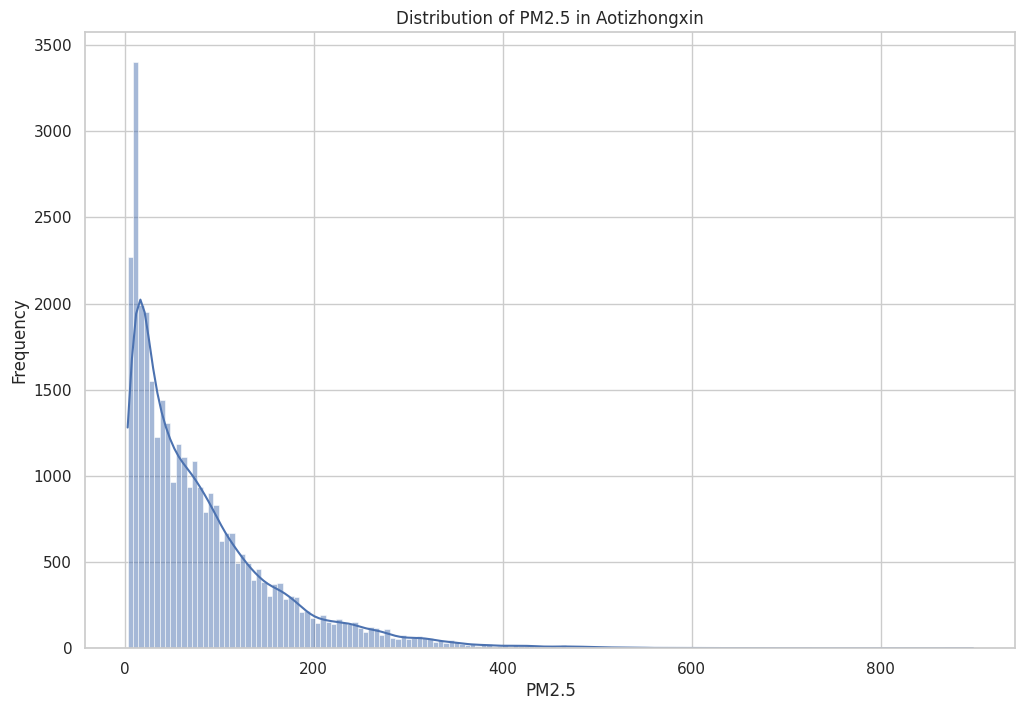

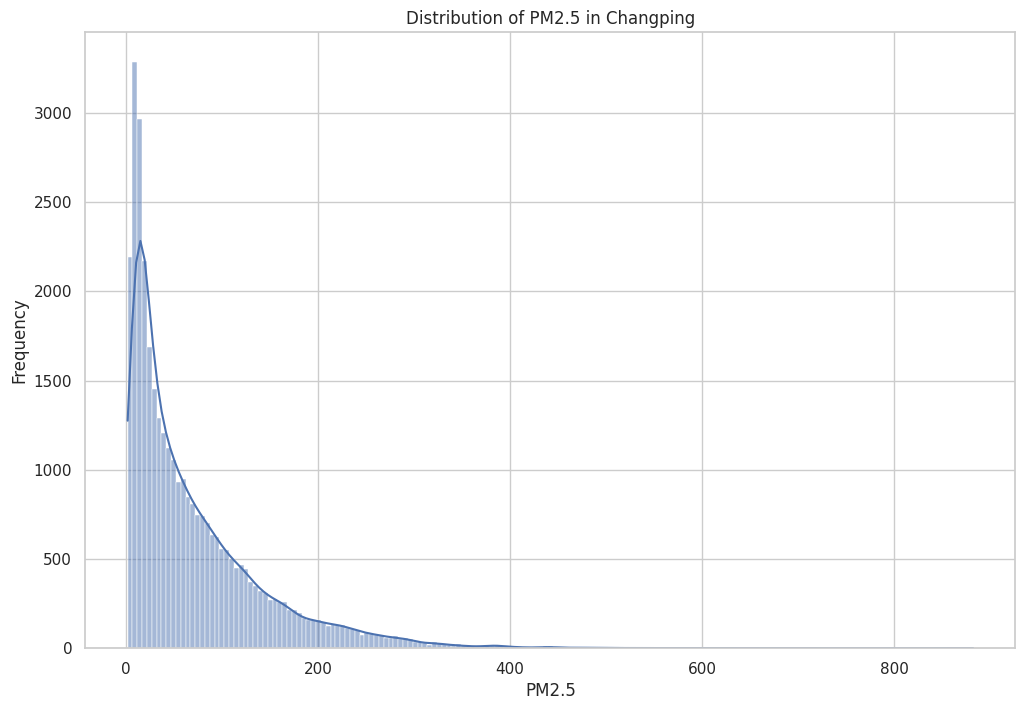

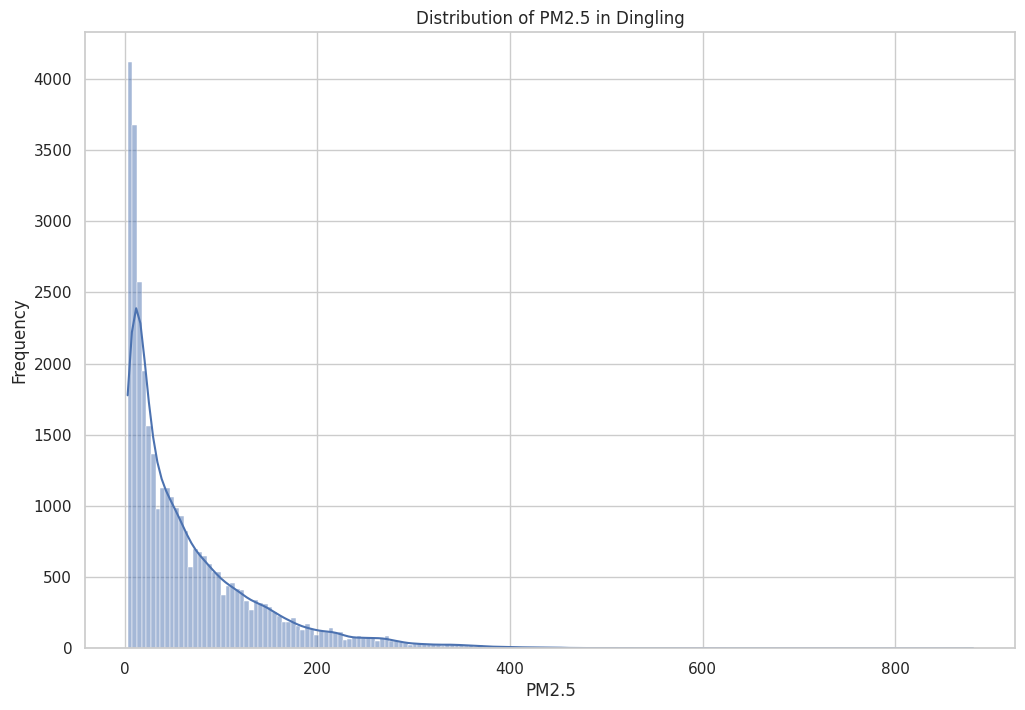

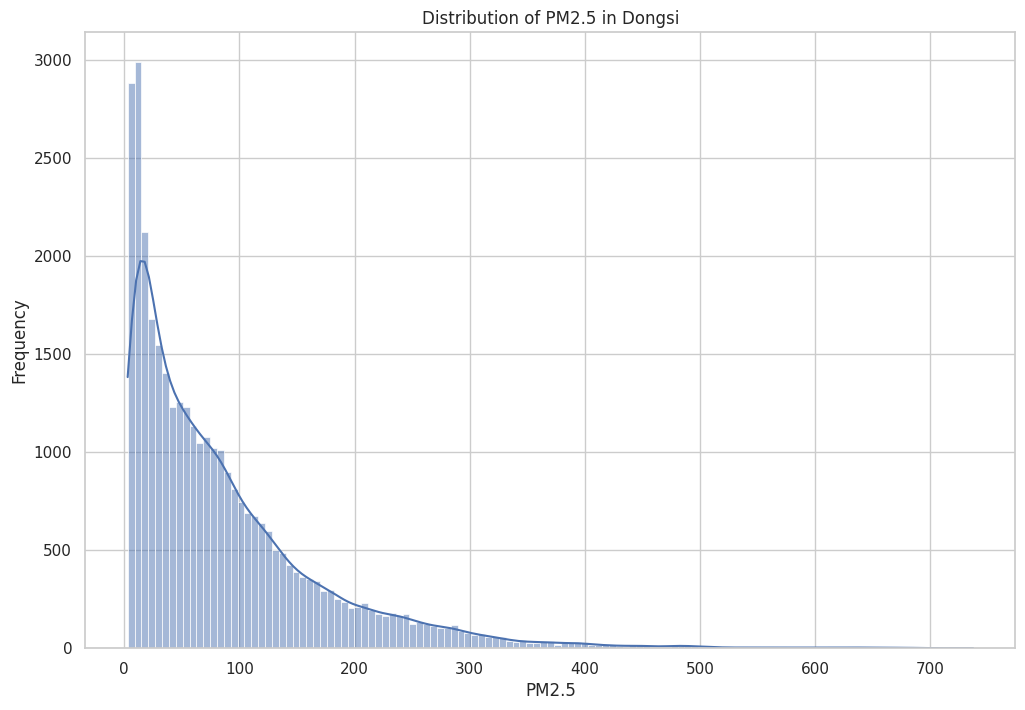

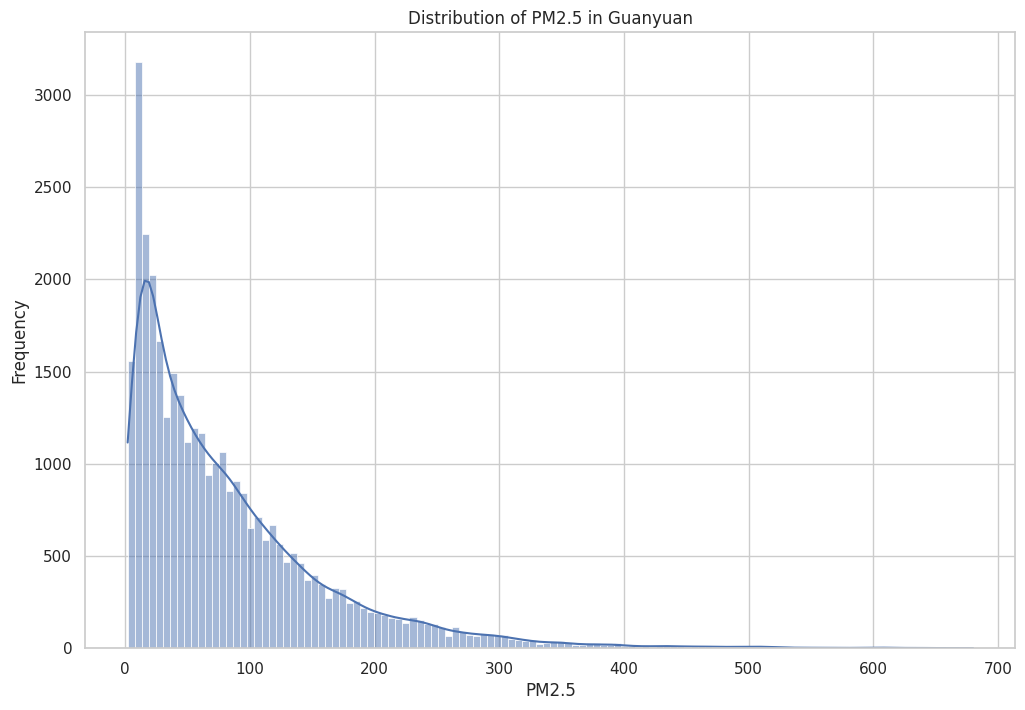

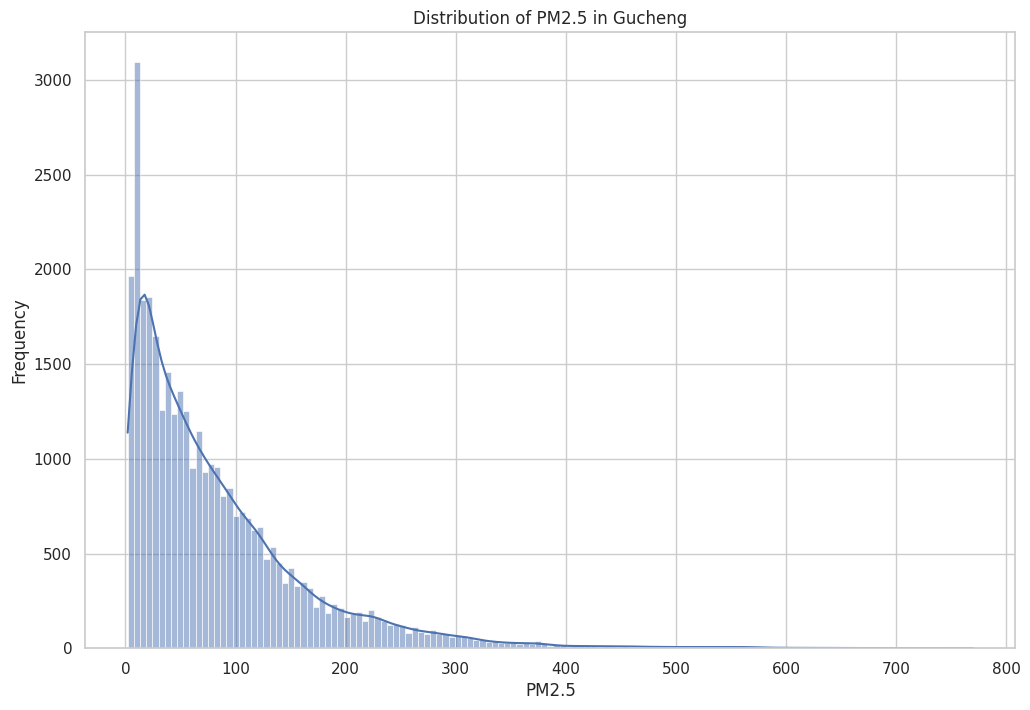

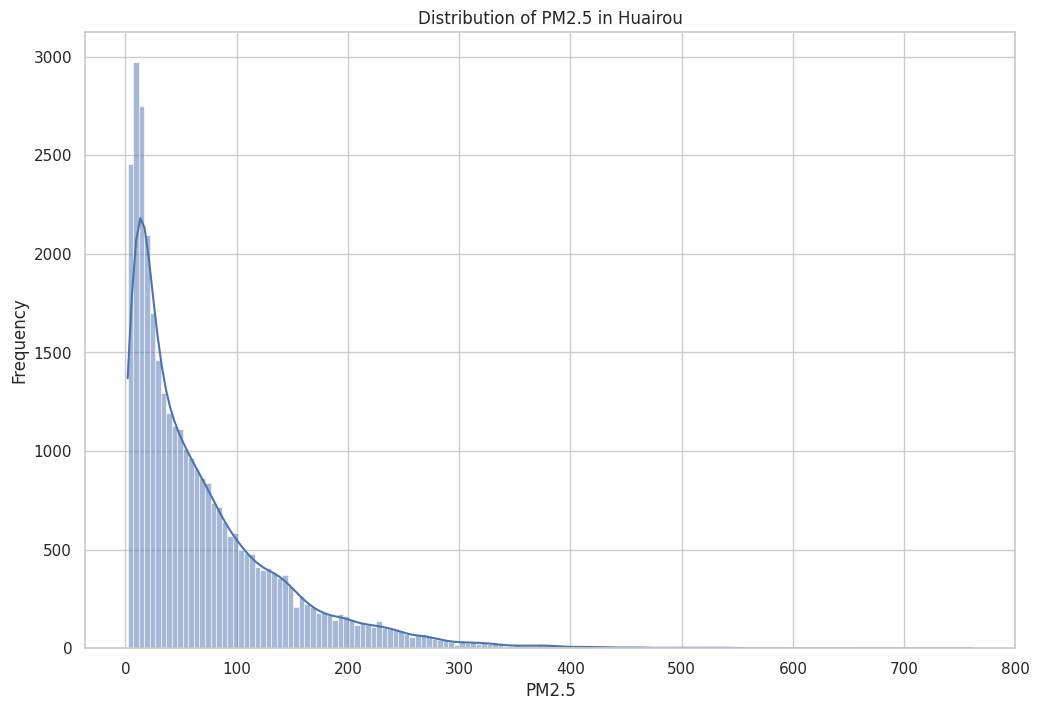

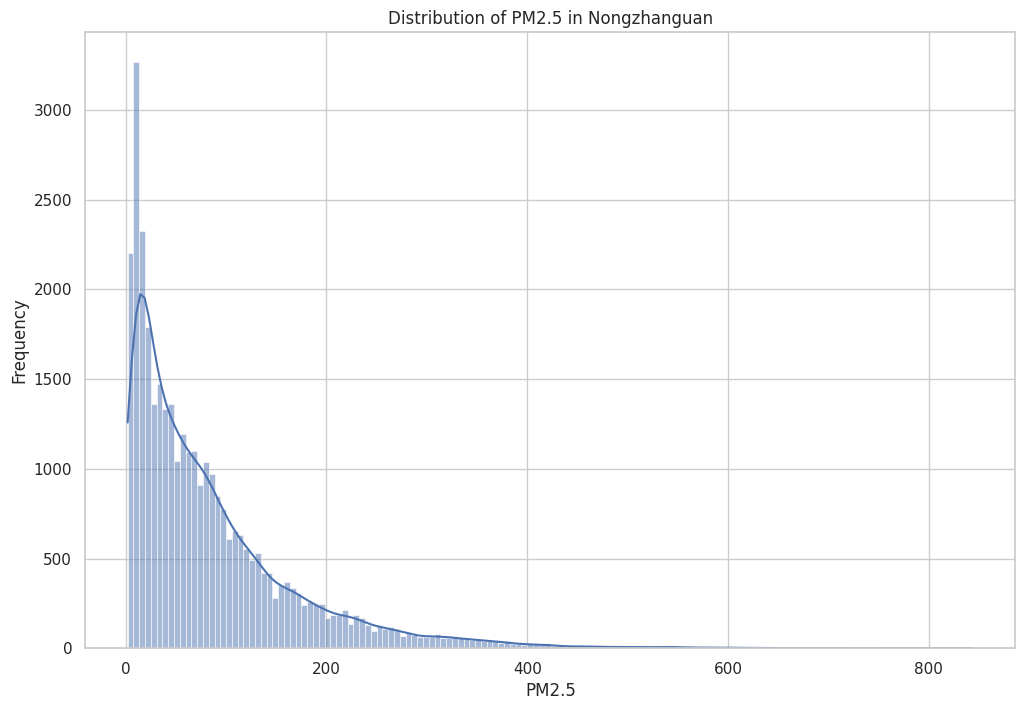

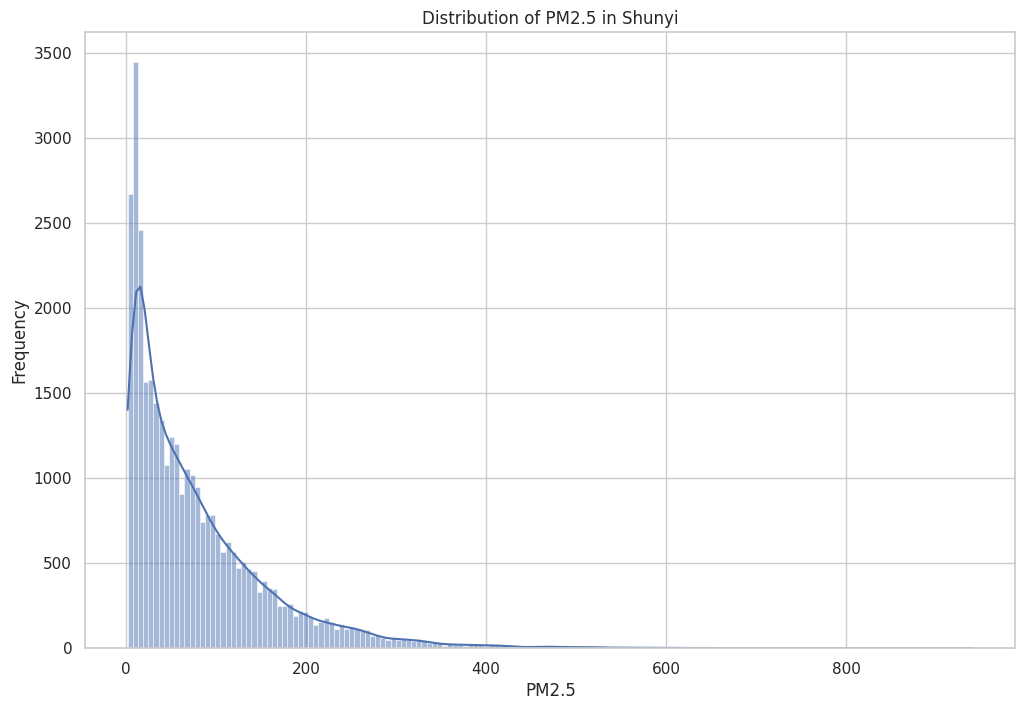

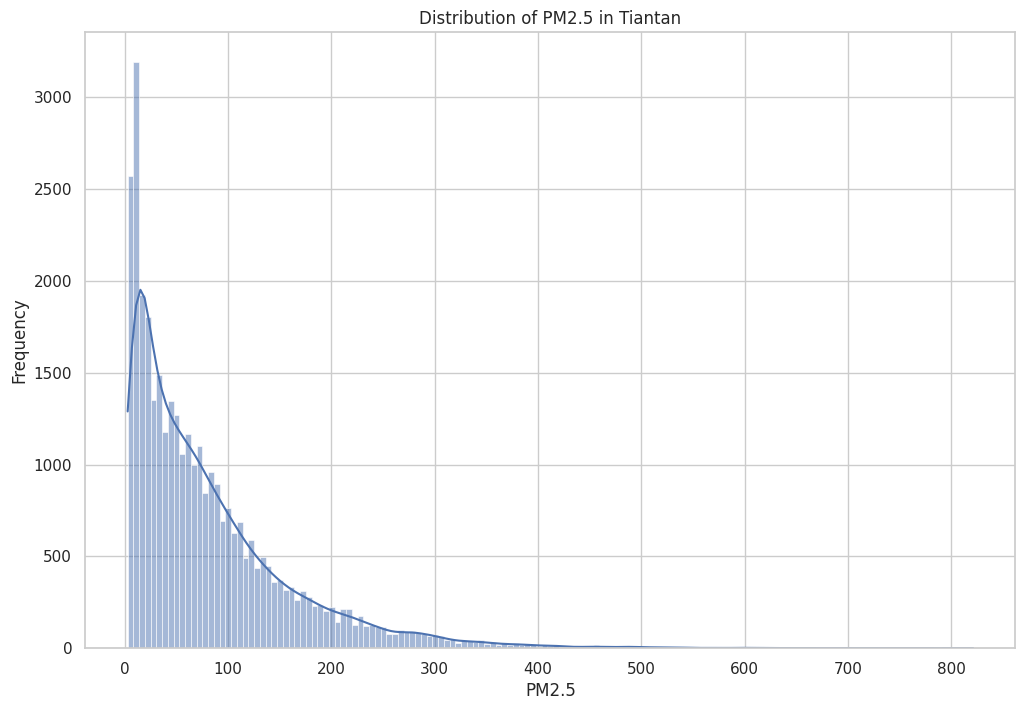

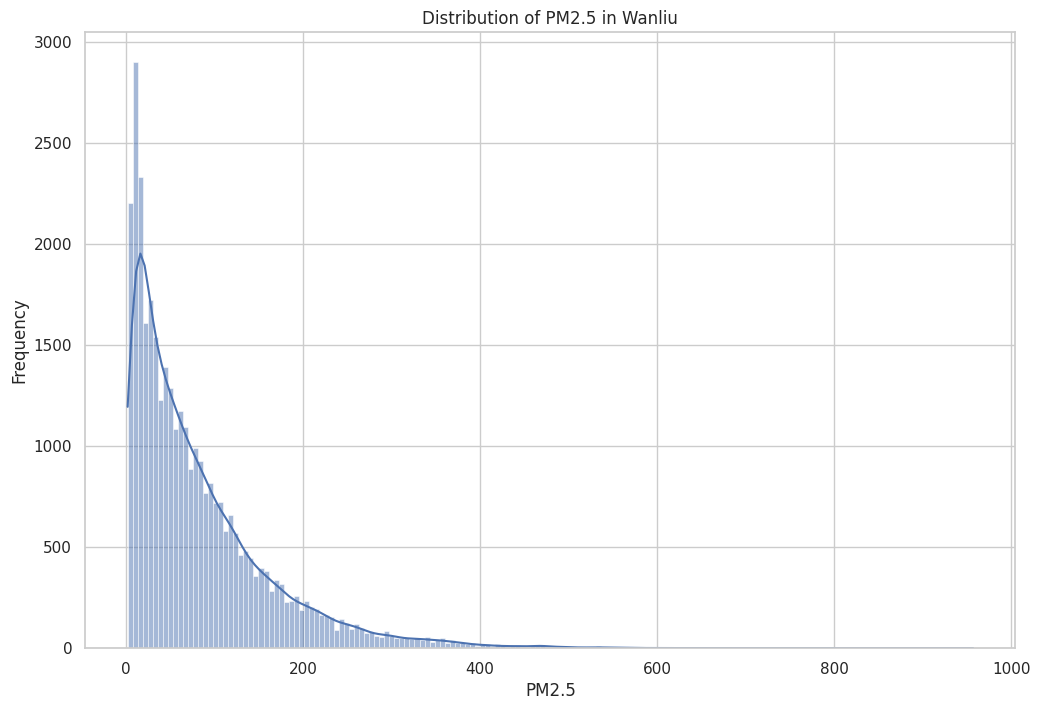

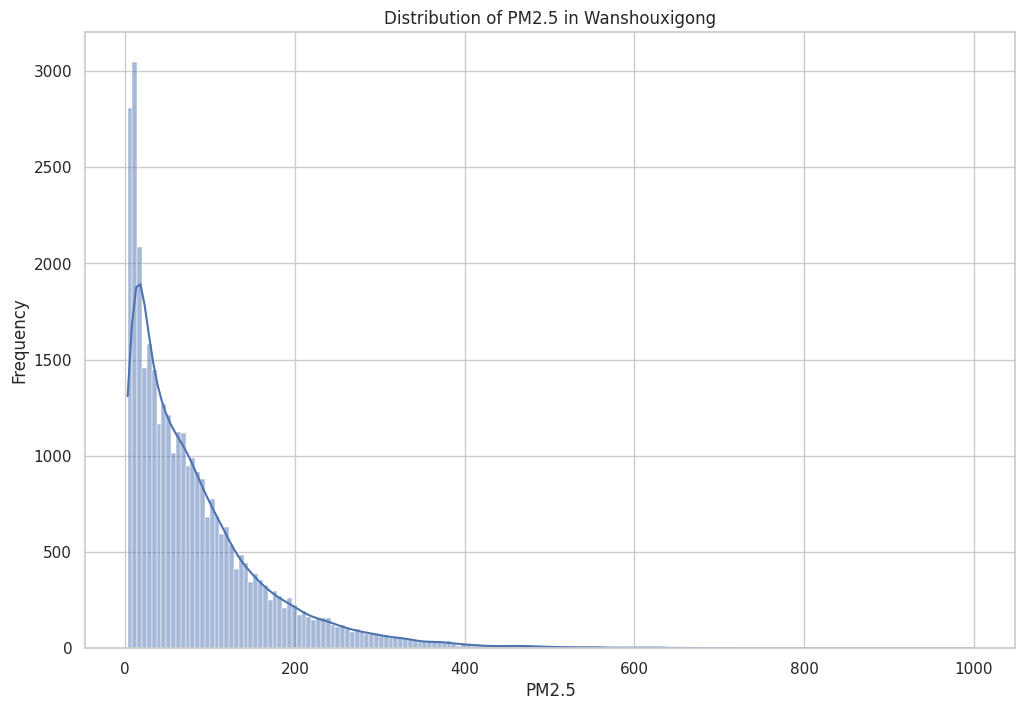

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Distribusi PM2.5
for station, df in dataframes.items():
    plt.figure()
    sns.histplot(df["PM2.5"].dropna(), kde=True)
    plt.title(f"Distribution of PM2.5 in {station}")
    plt.xlabel("PM2.5")
    plt.ylabel("Frequency")
    plt.show()


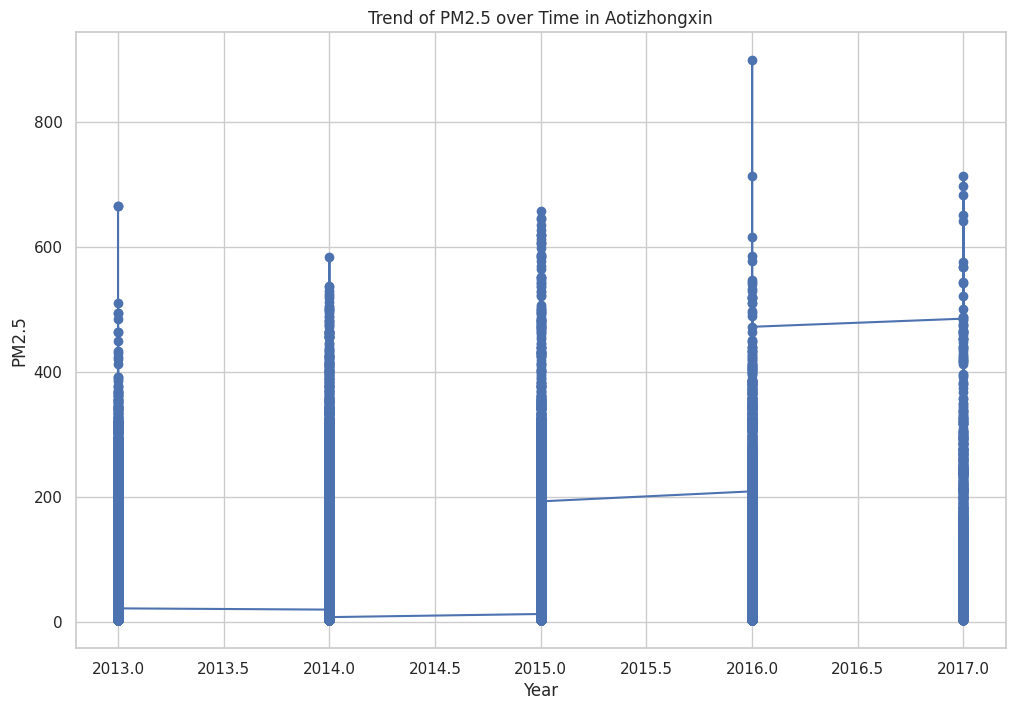

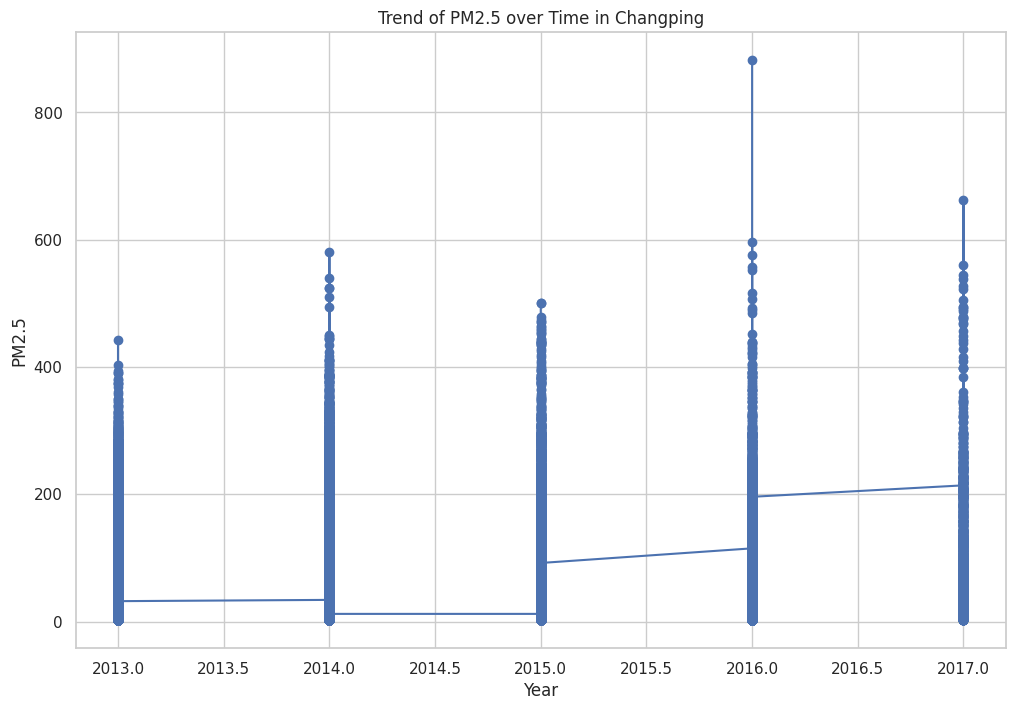

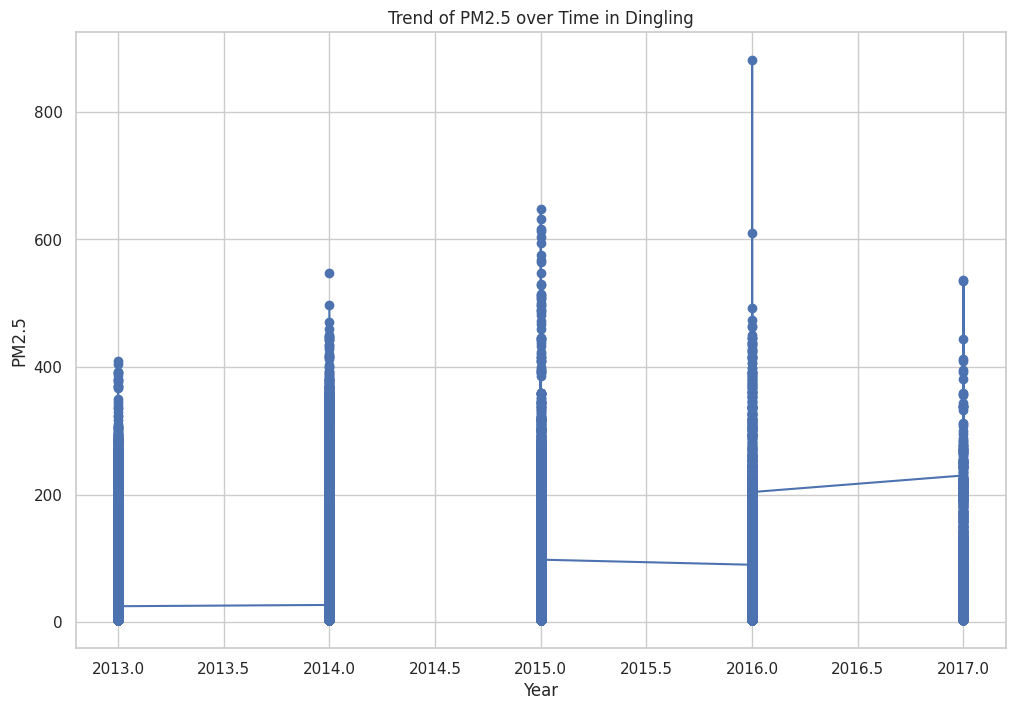

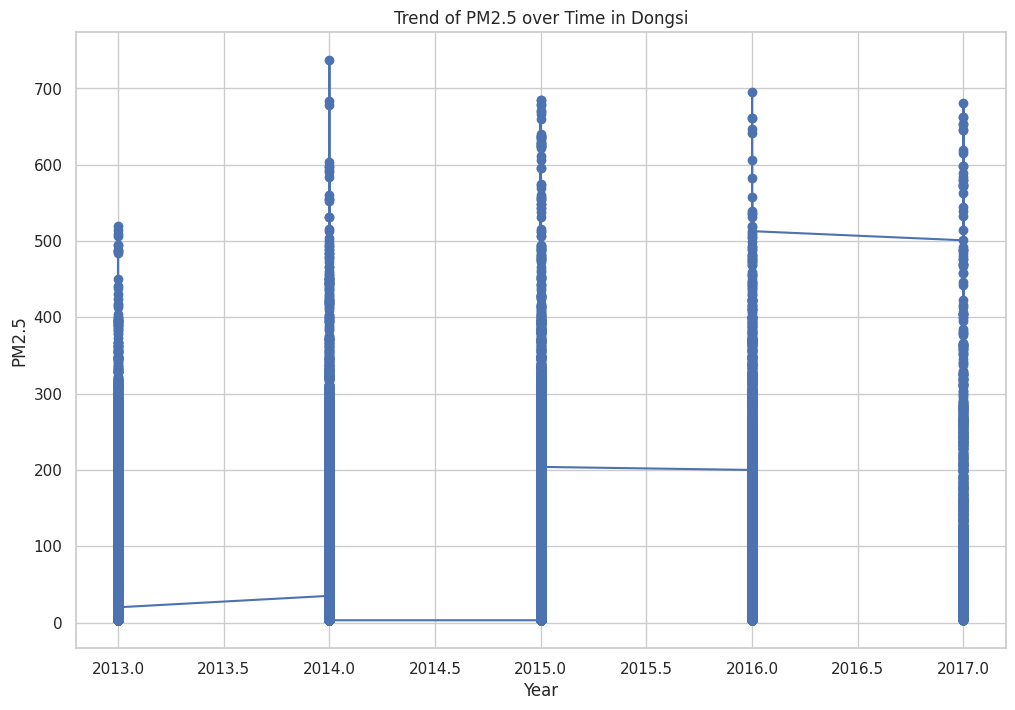

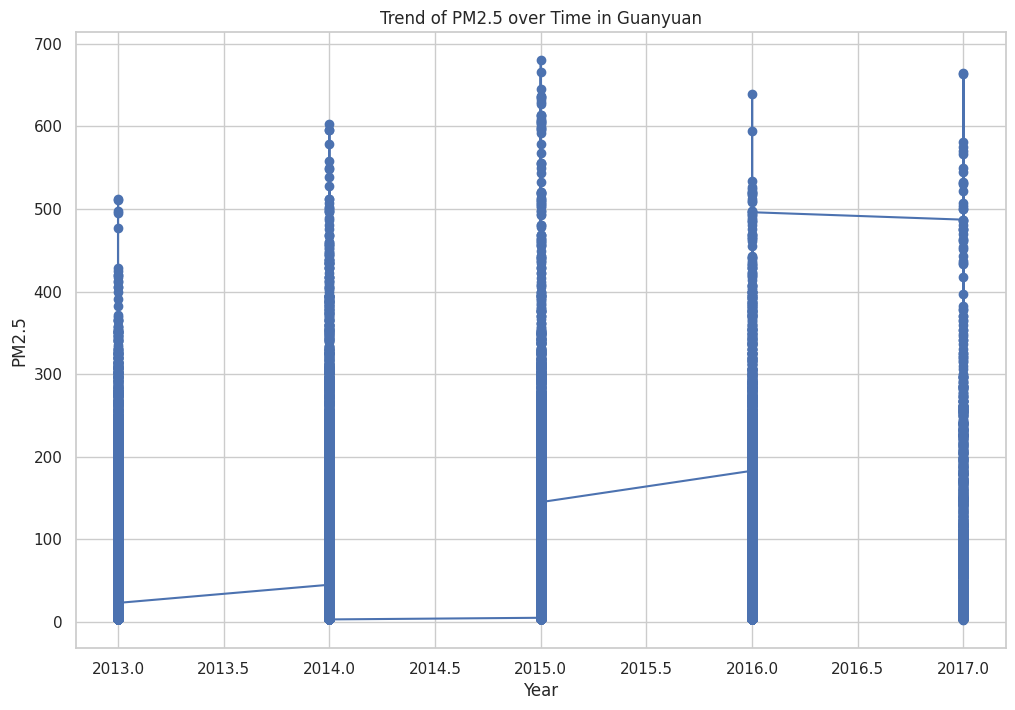

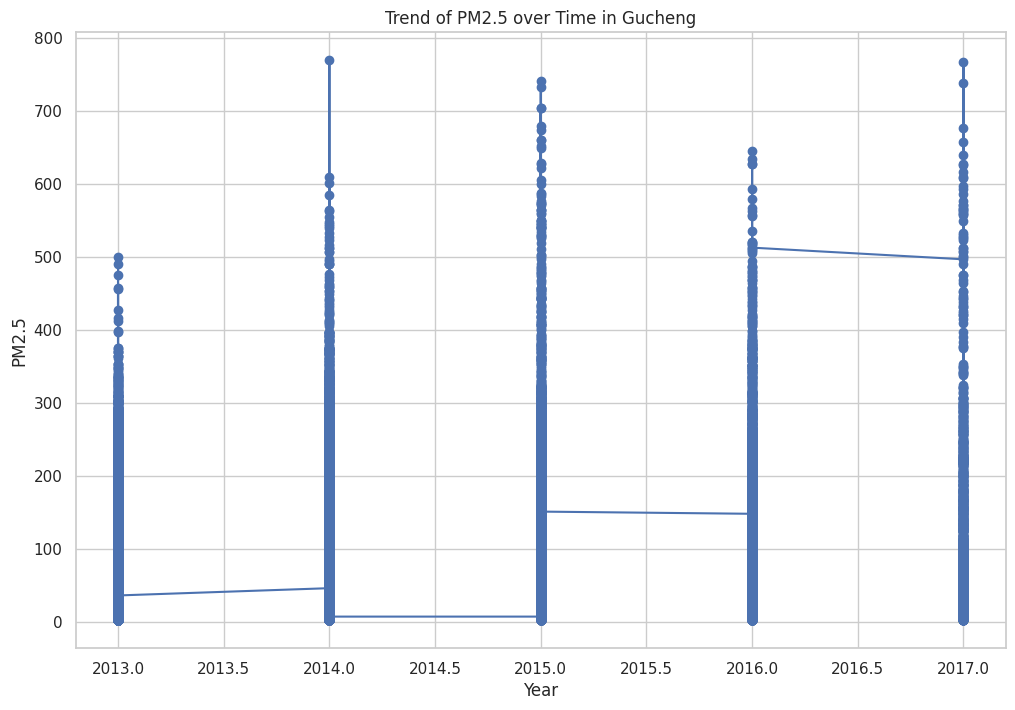

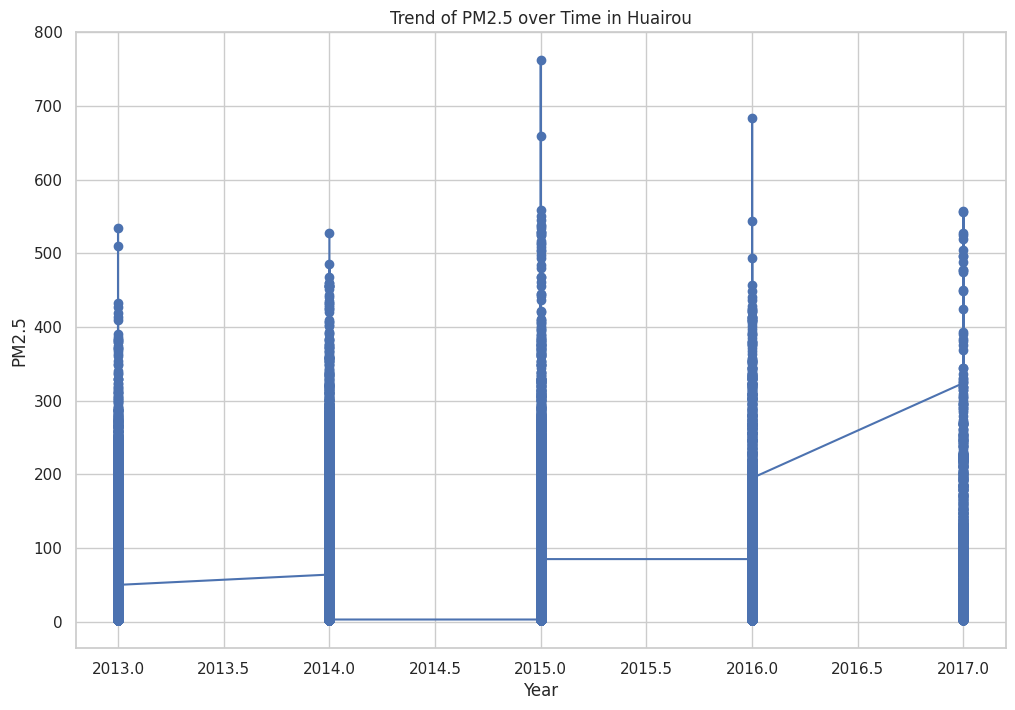

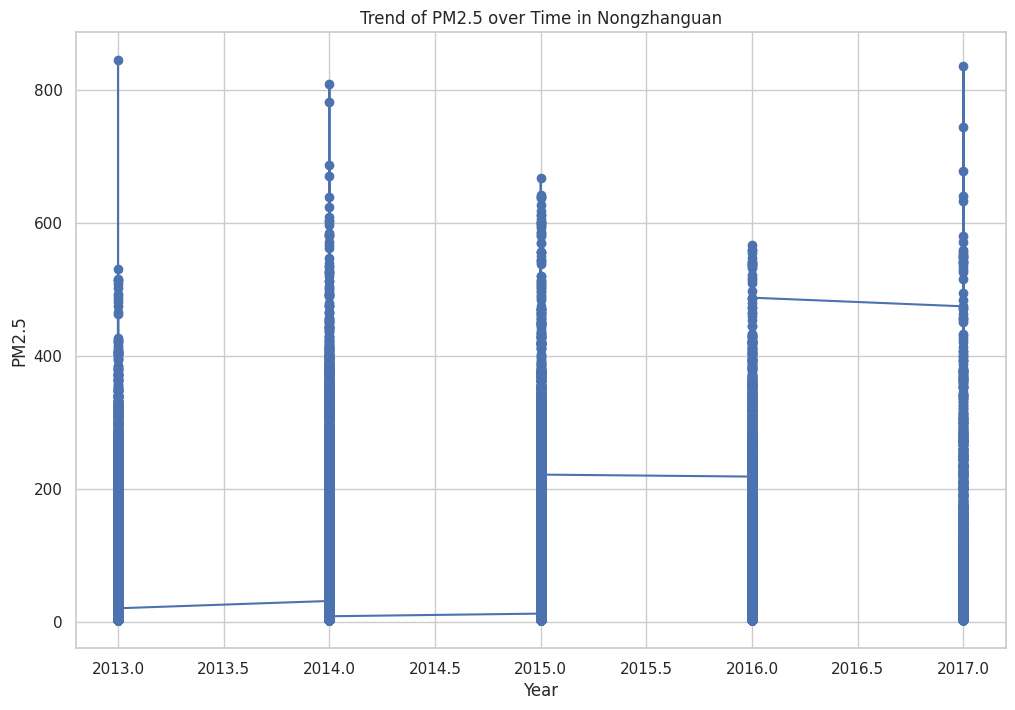

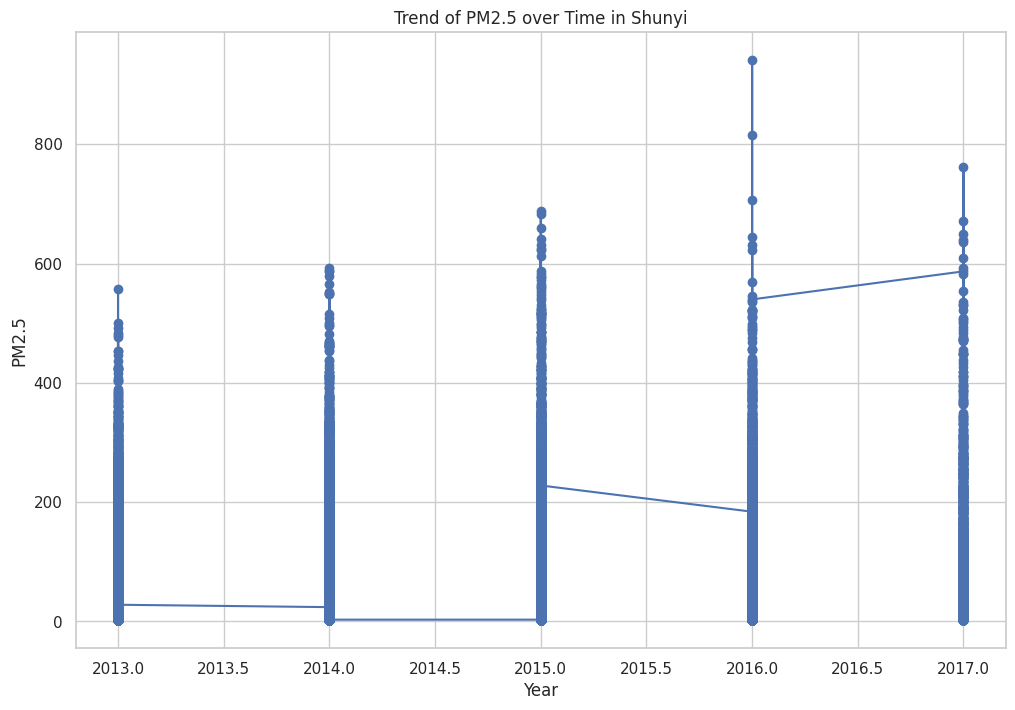

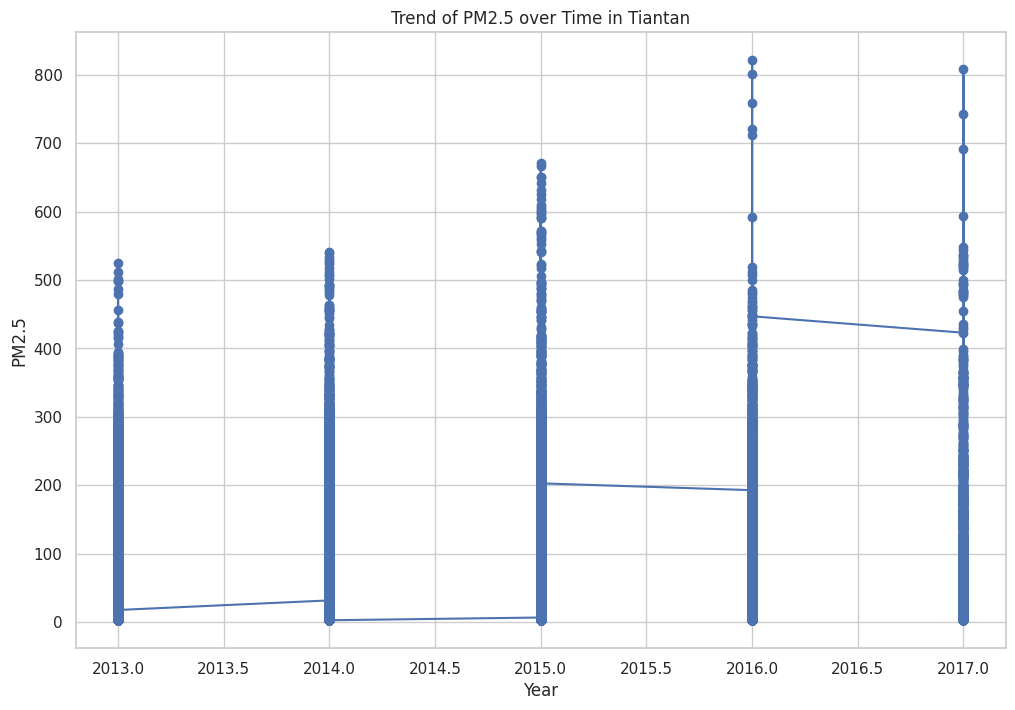

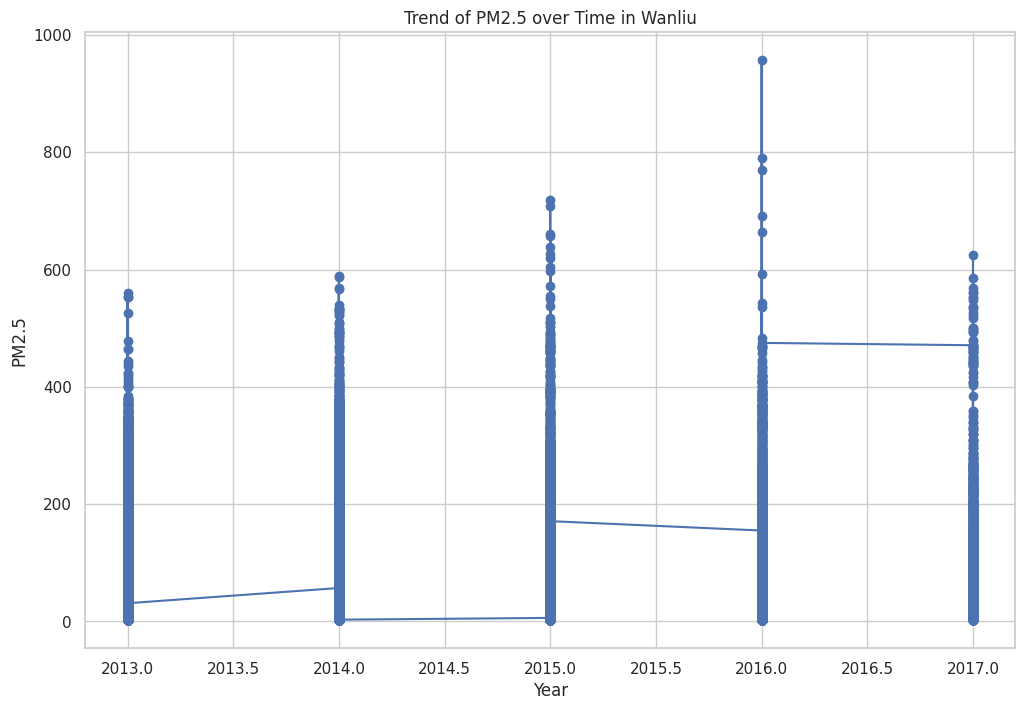

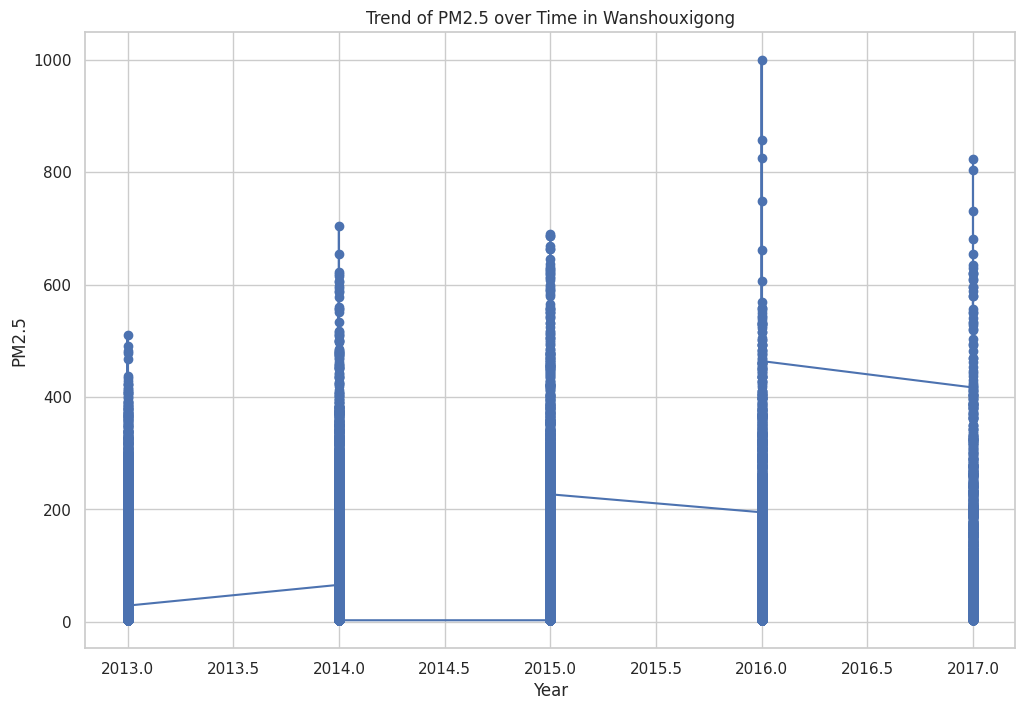

In [ ]:
# Tren PM2.5 dari waktu ke waktu
for station, df in dataframes.items():
    plt.figure()
    plt.plot(df["year"], df["PM2.5"], marker='o')
    plt.title(f"Trend of PM2.5 over Time in {station}")
    plt.xlabel("Year")
    plt.ylabel("PM2.5")
    plt.grid(True)
    plt.show()


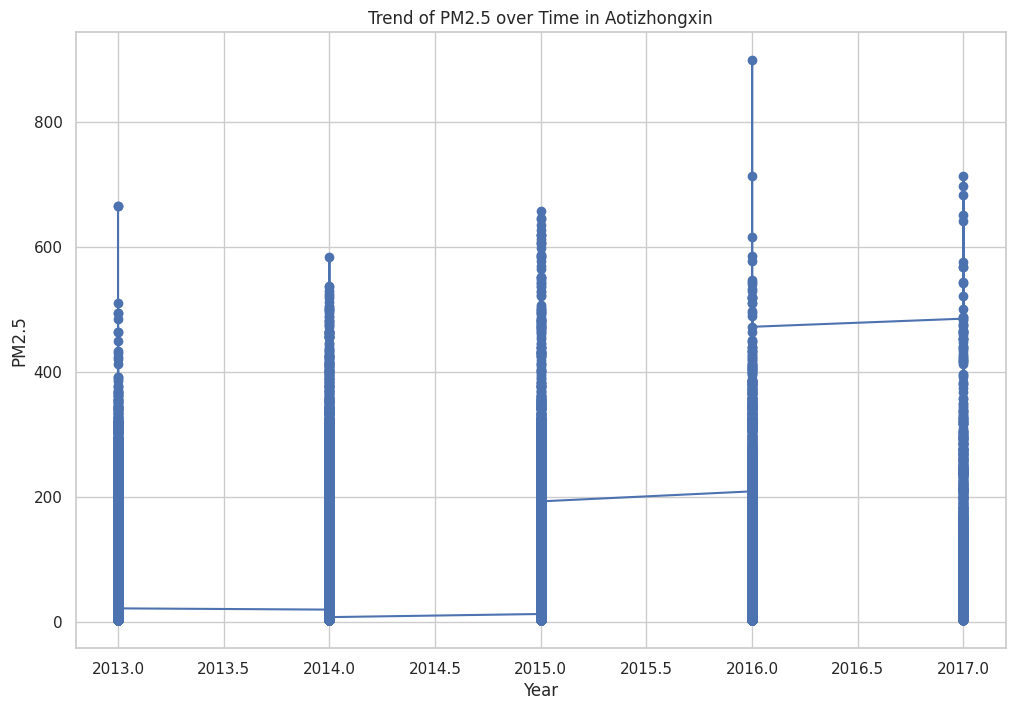

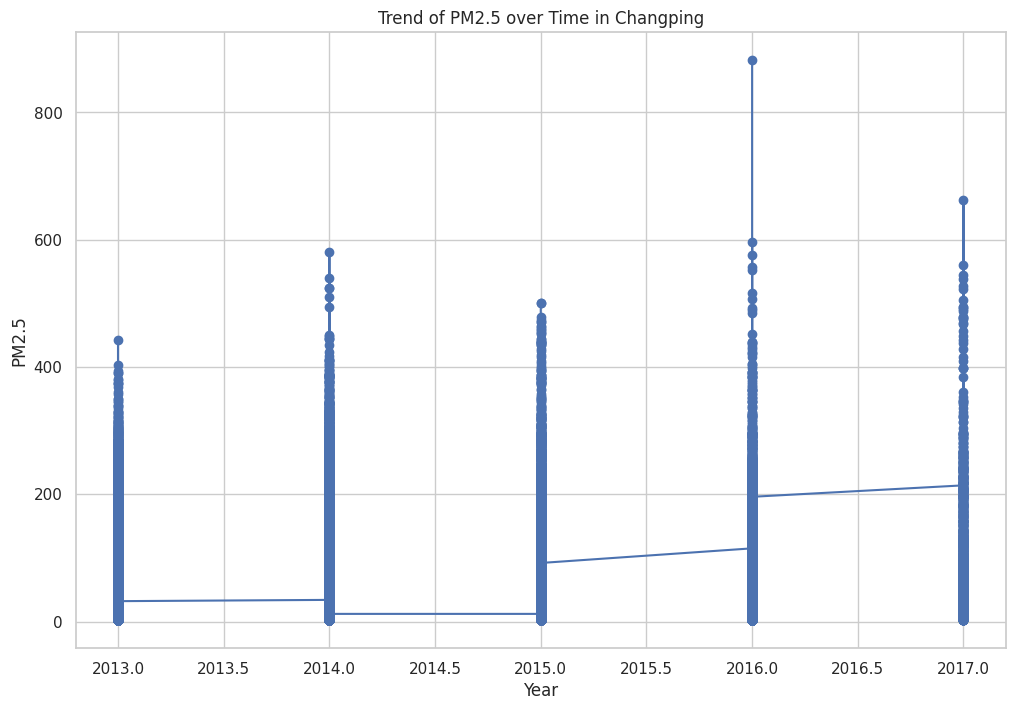

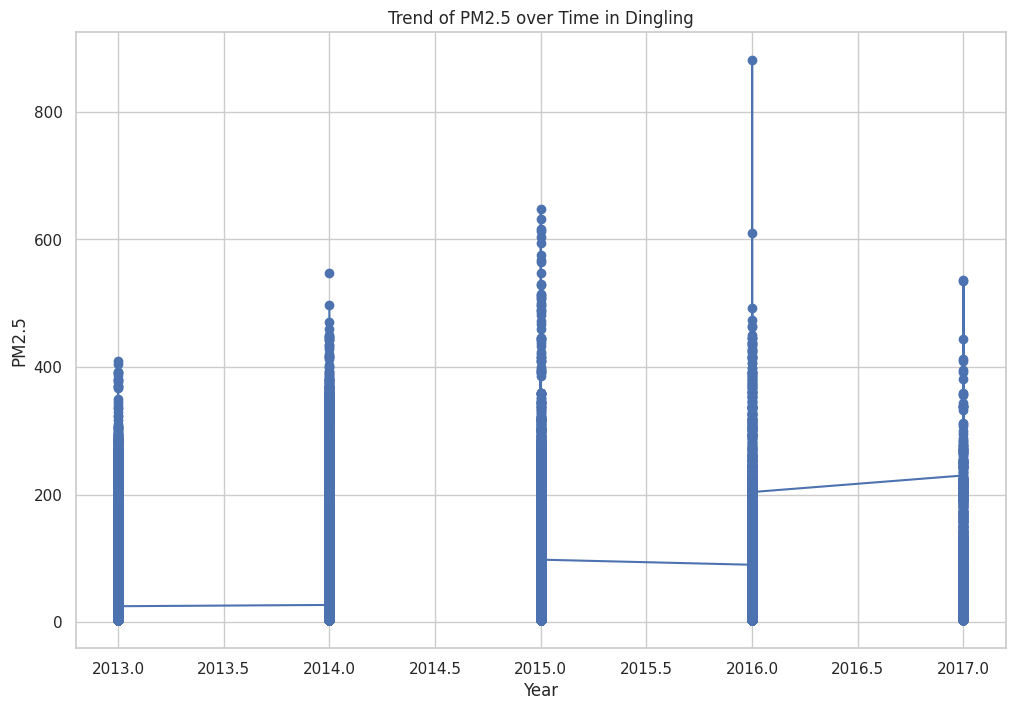

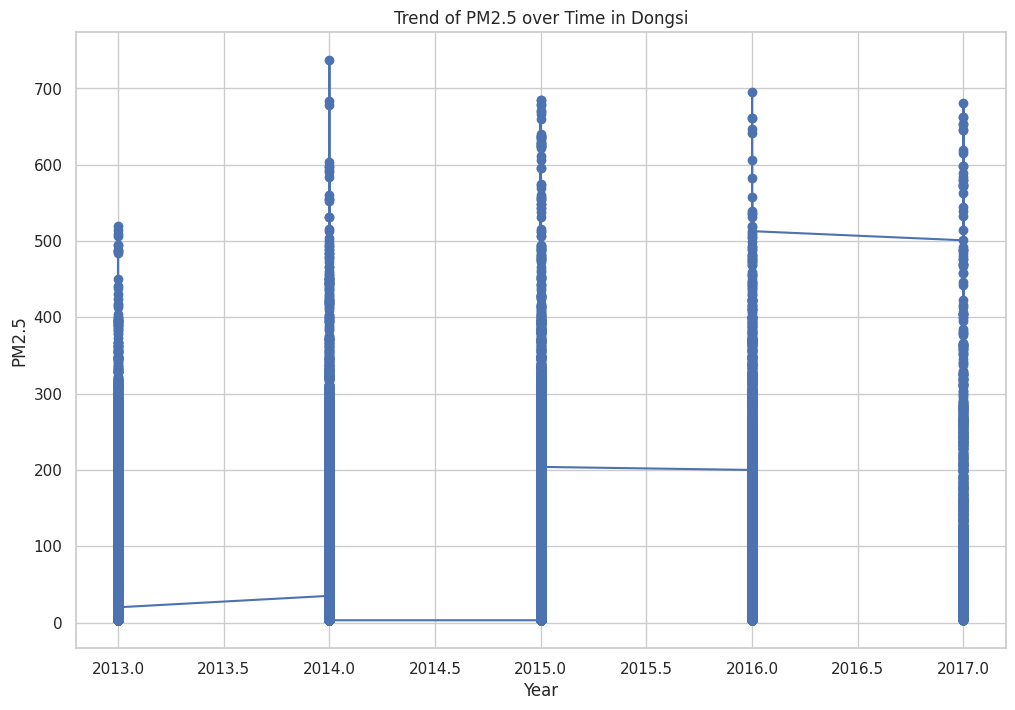

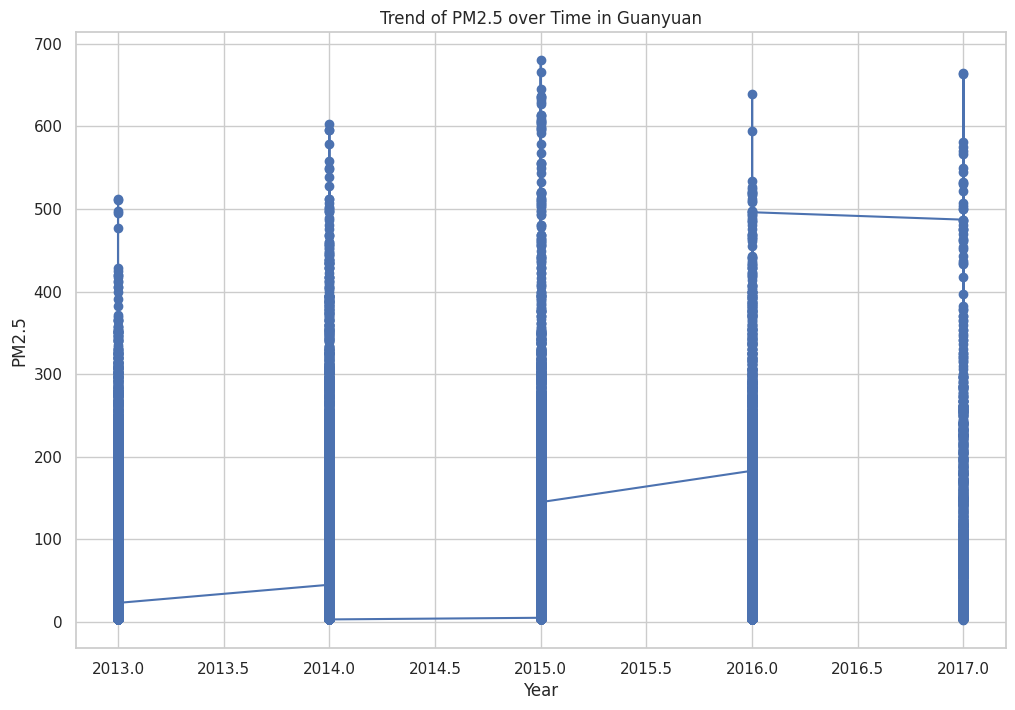

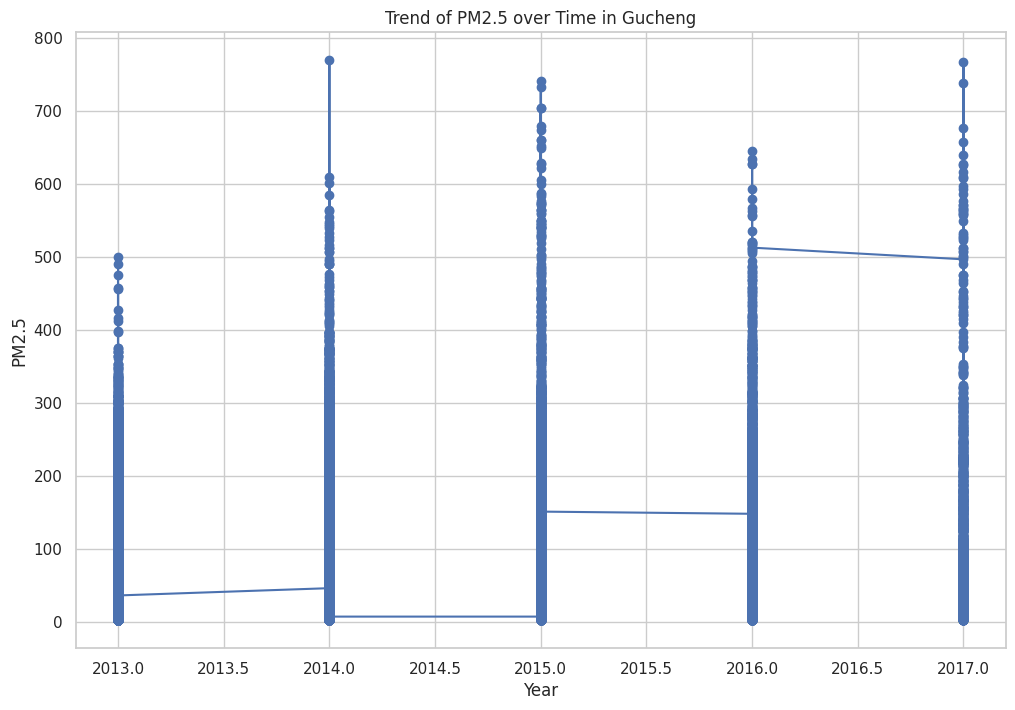

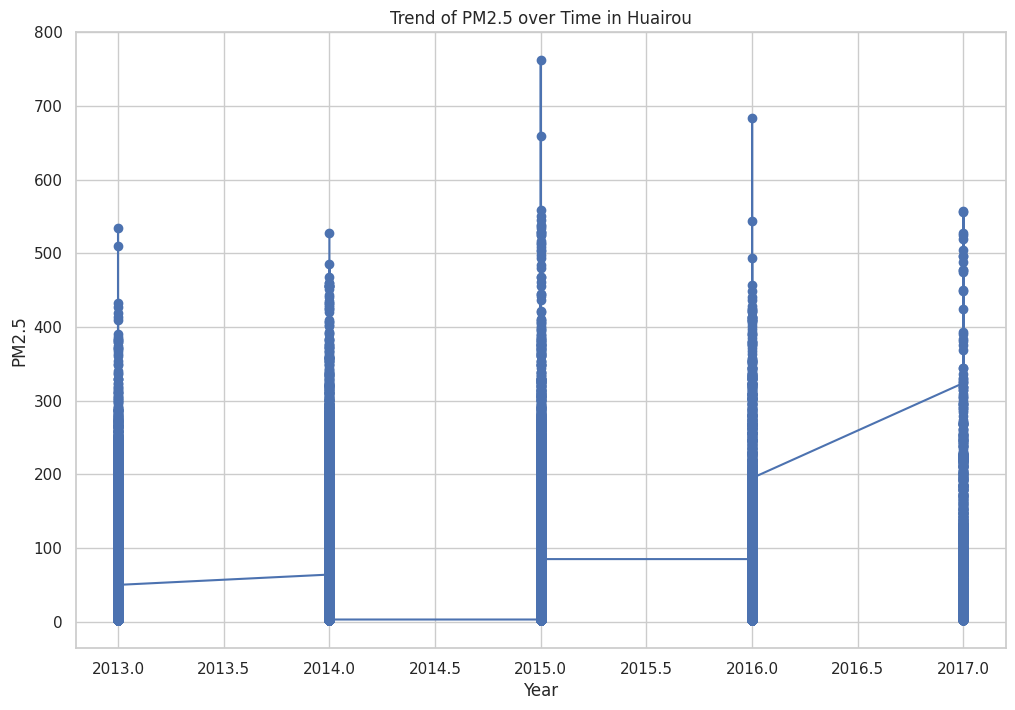

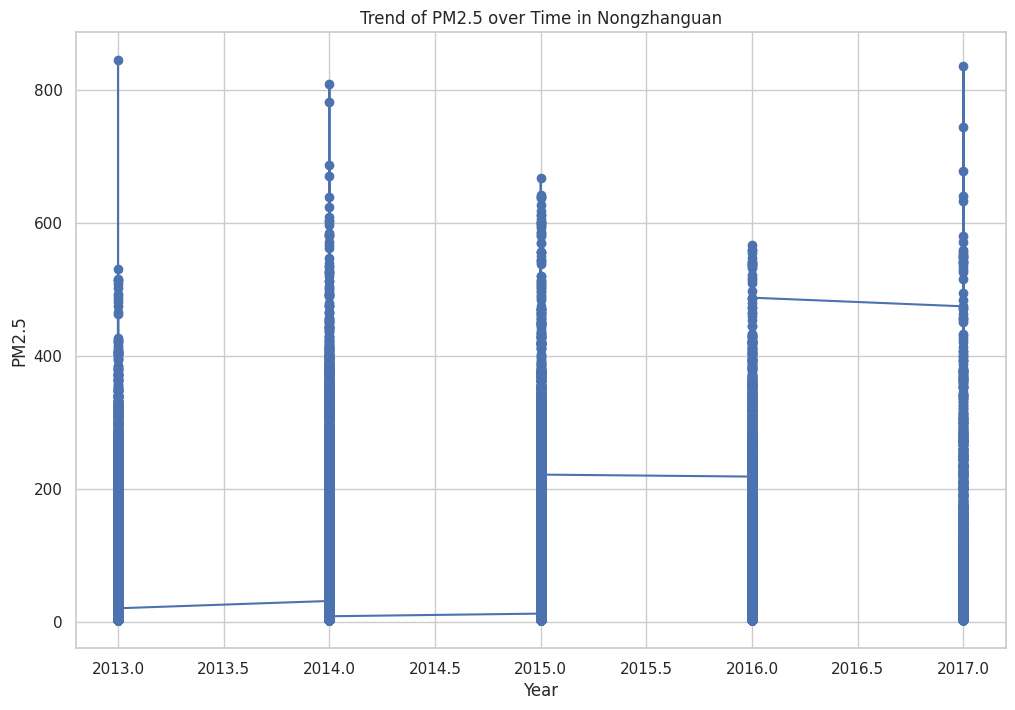

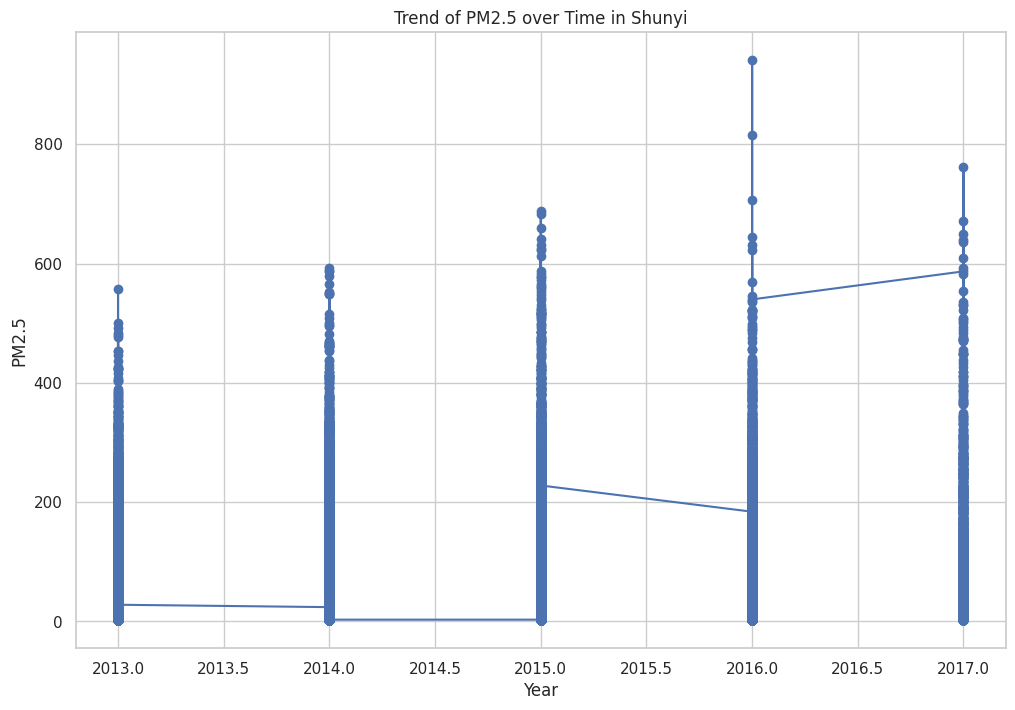

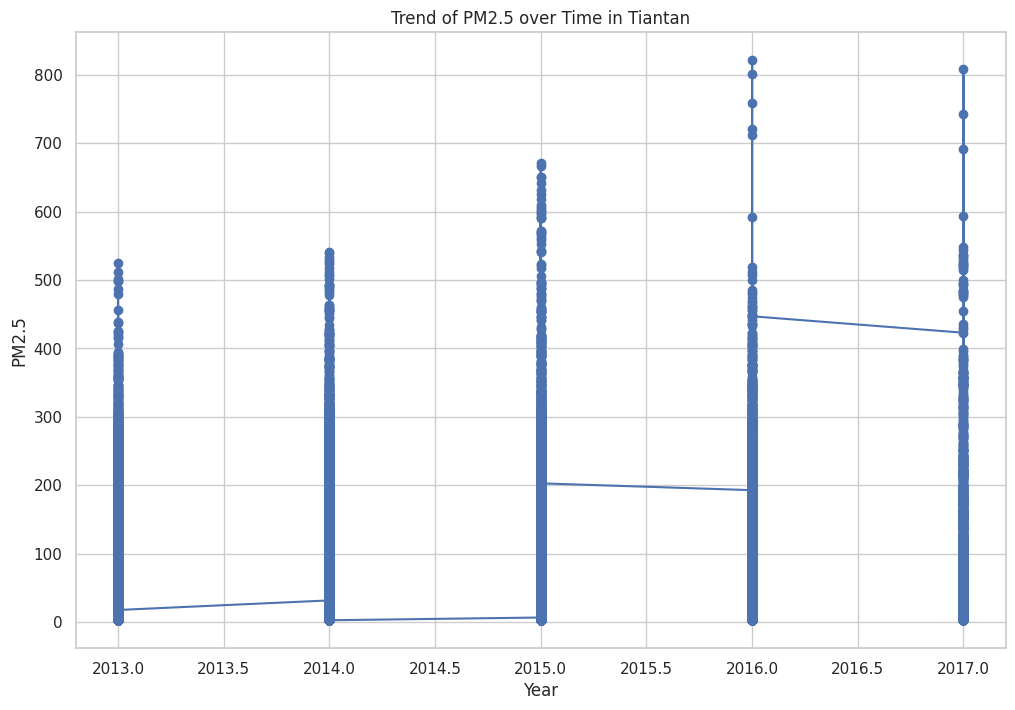

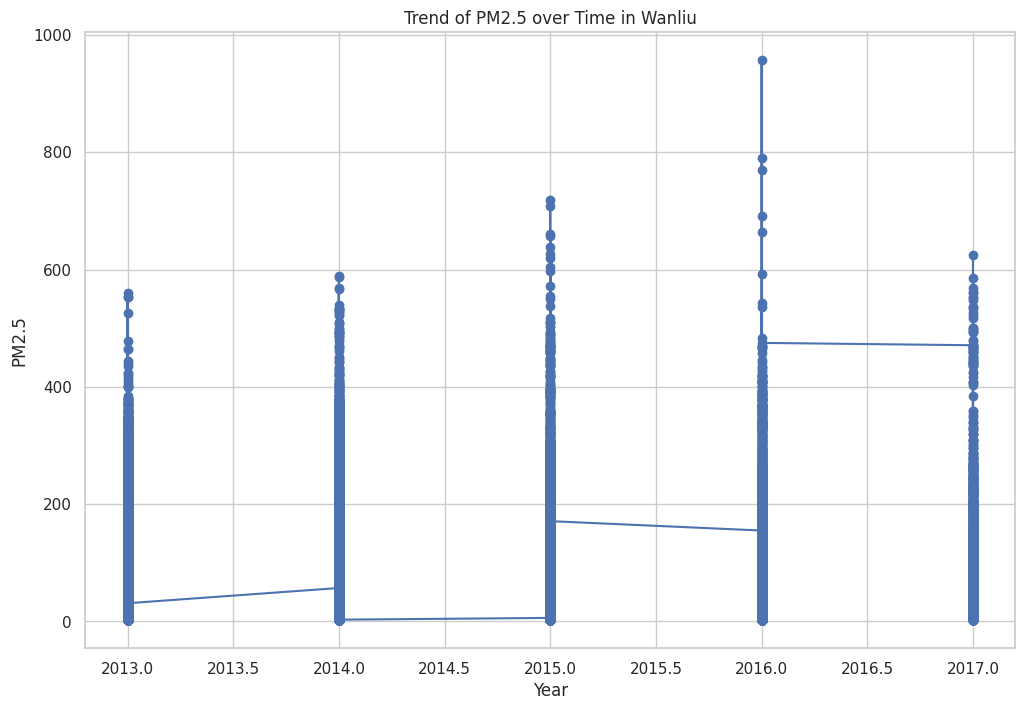

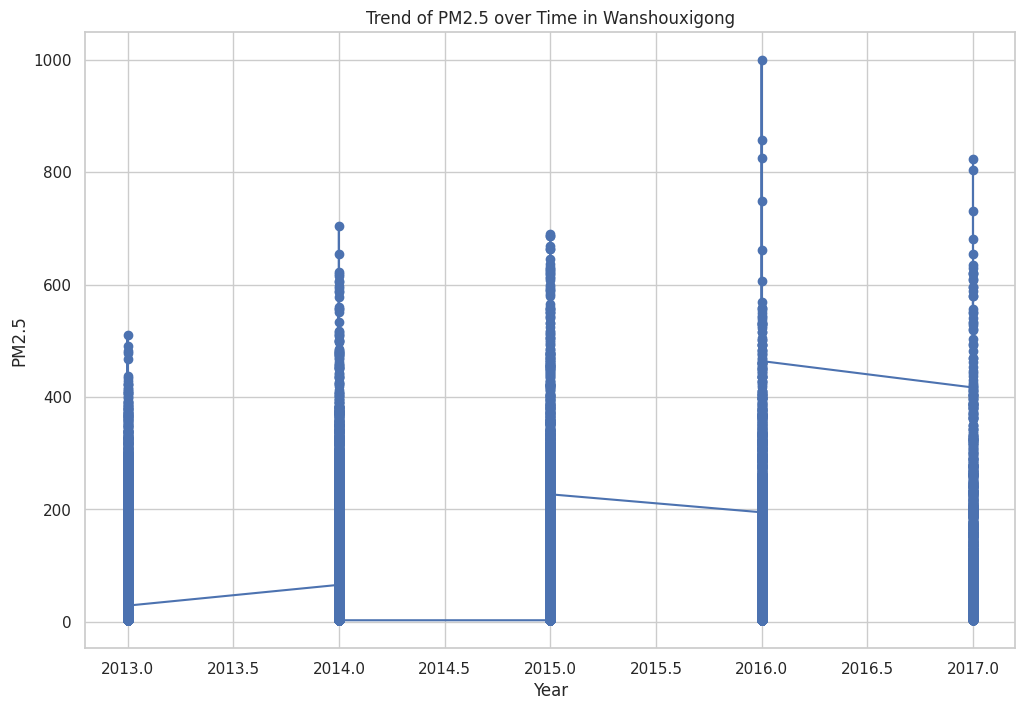

In [ ]:
# Tren PM2.5 dari waktu ke waktu
for station, df in dataframes.items():
    plt.figure()
    plt.plot(df["year"], df["PM2.5"], marker='o')
    plt.title(f"Trend of PM2.5 over Time in {station}")
    plt.xlabel("Year")
    plt.ylabel("PM2.5")
    plt.grid(True)
    plt.show()


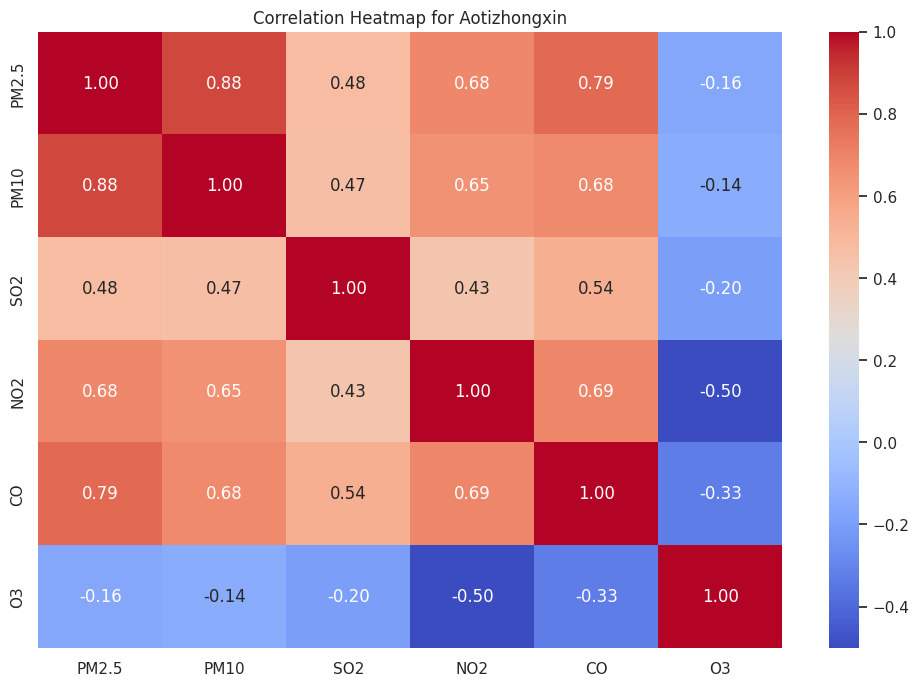

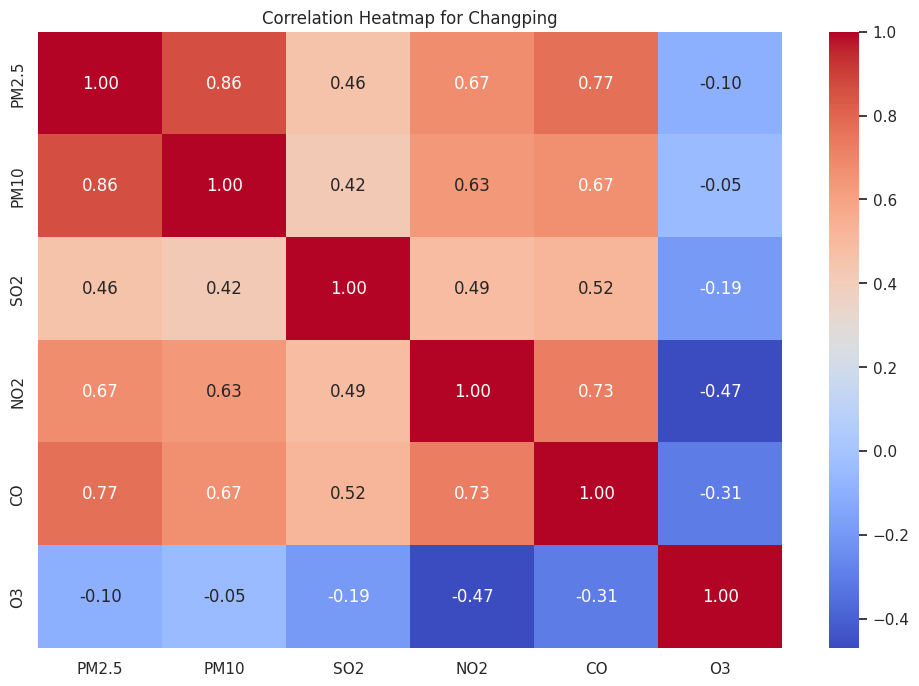

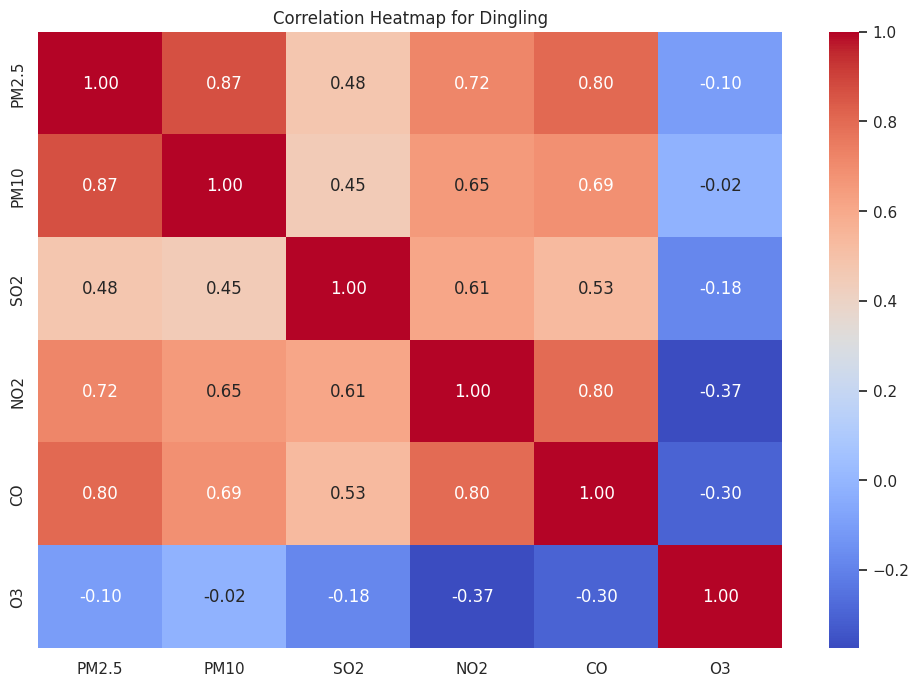

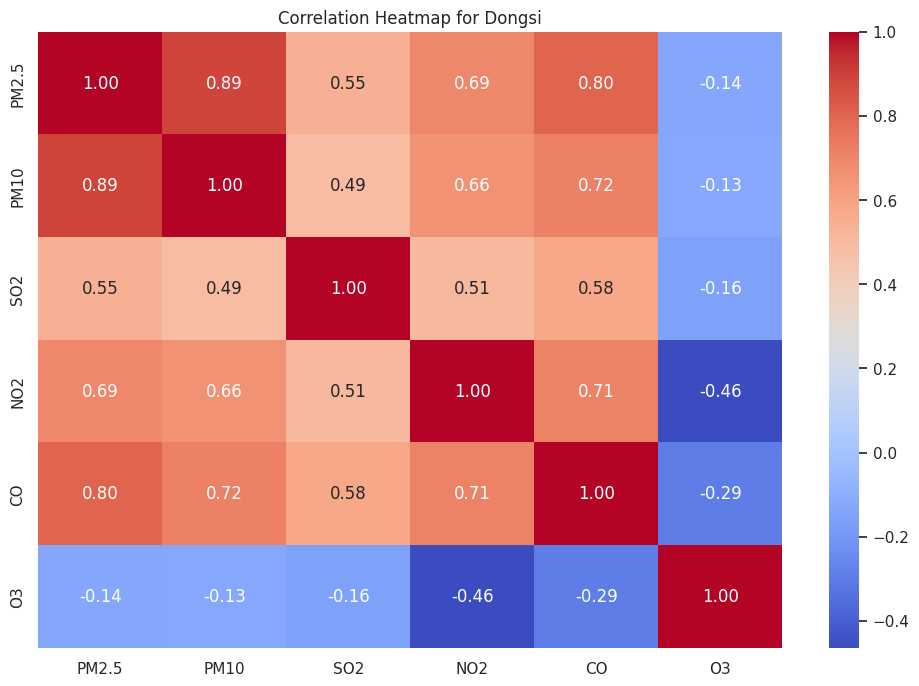

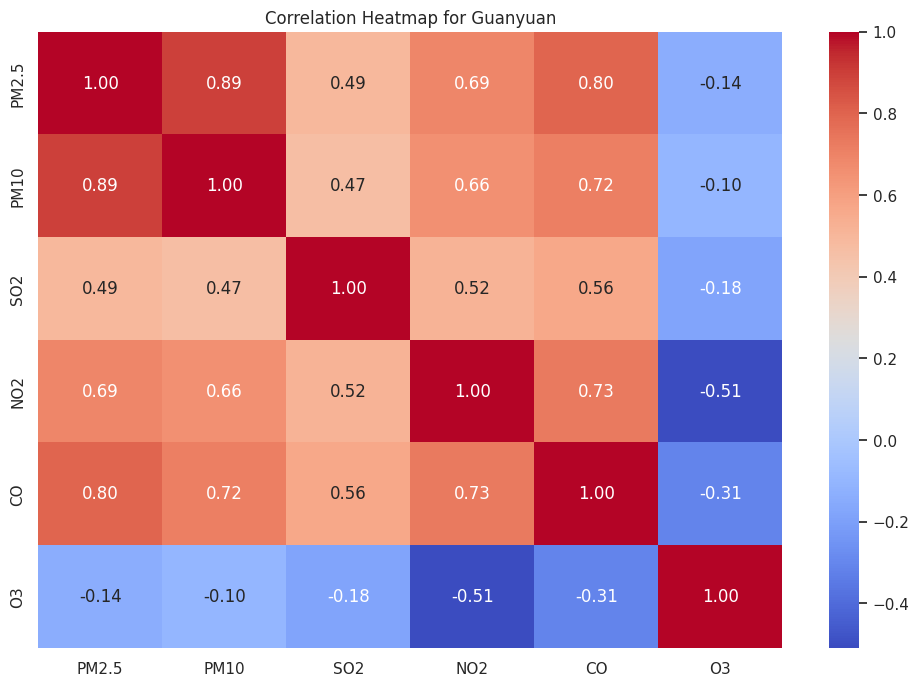

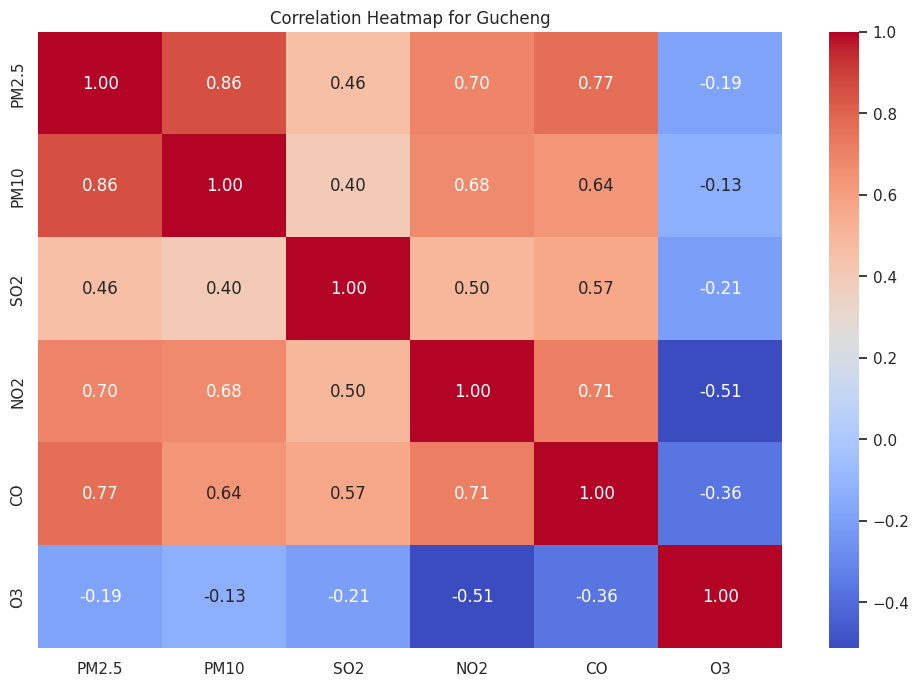

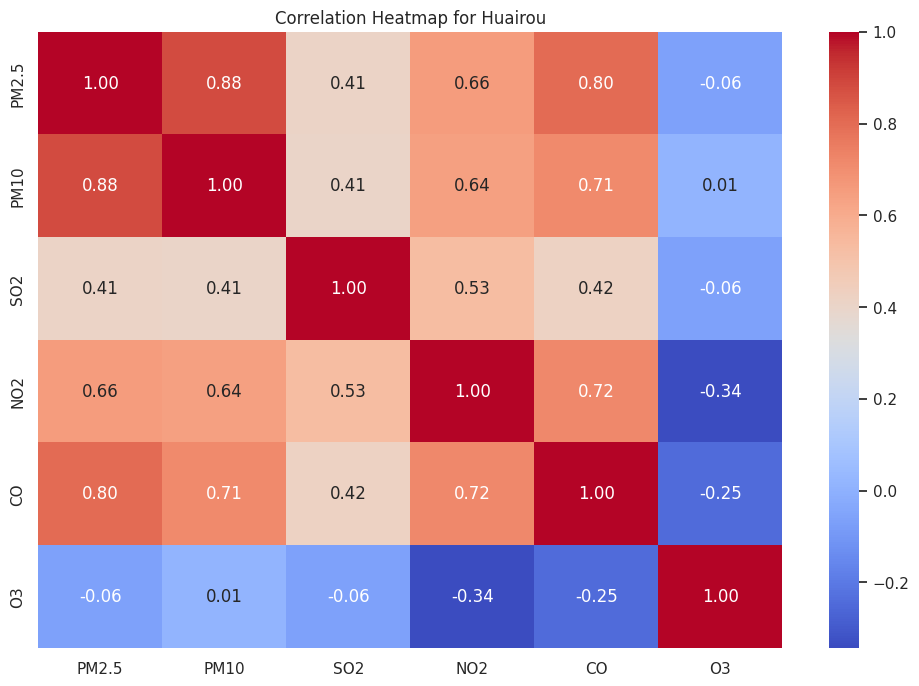

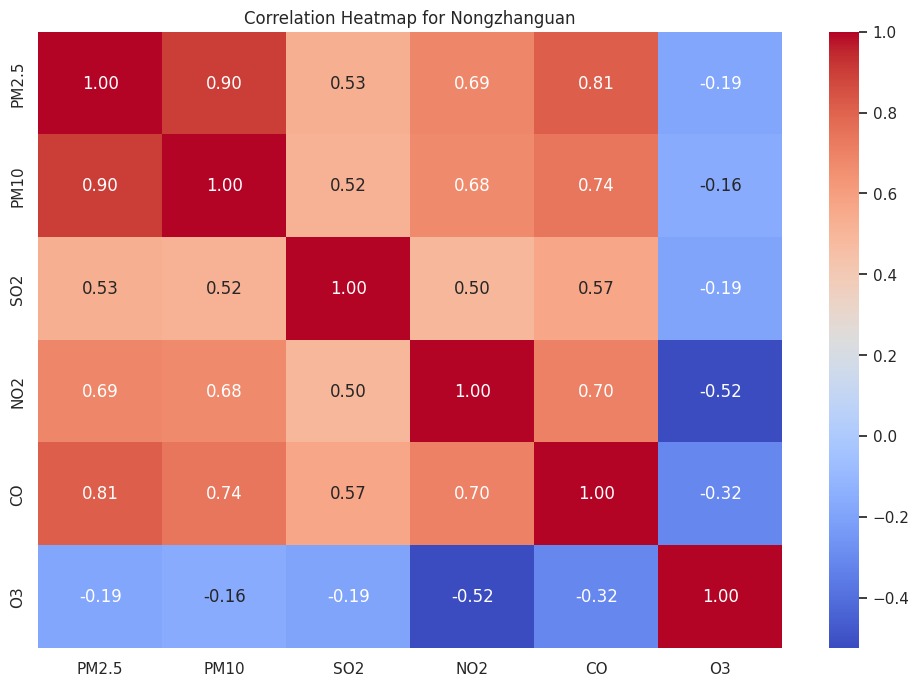

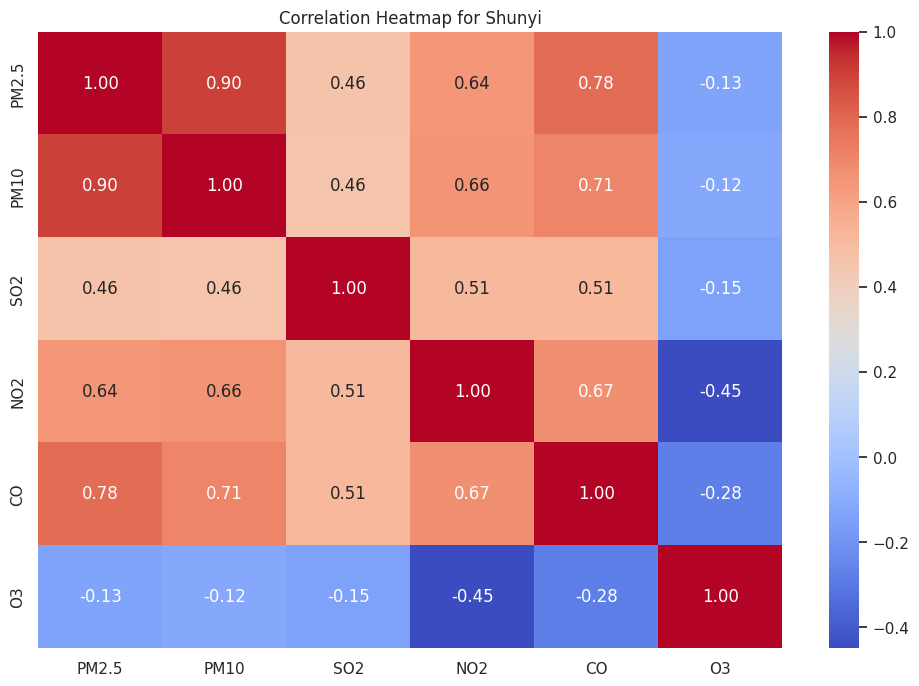

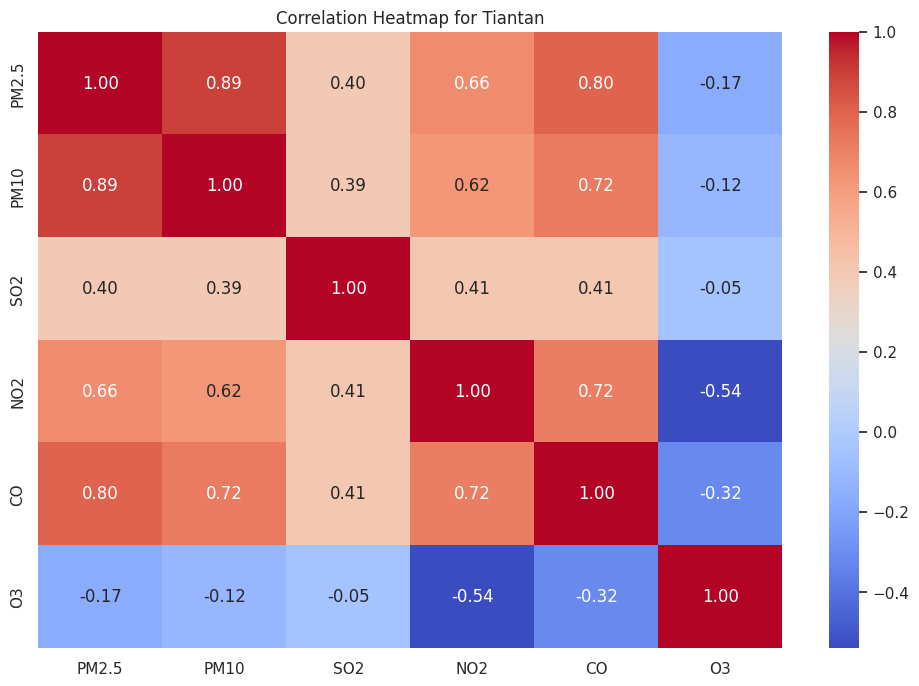

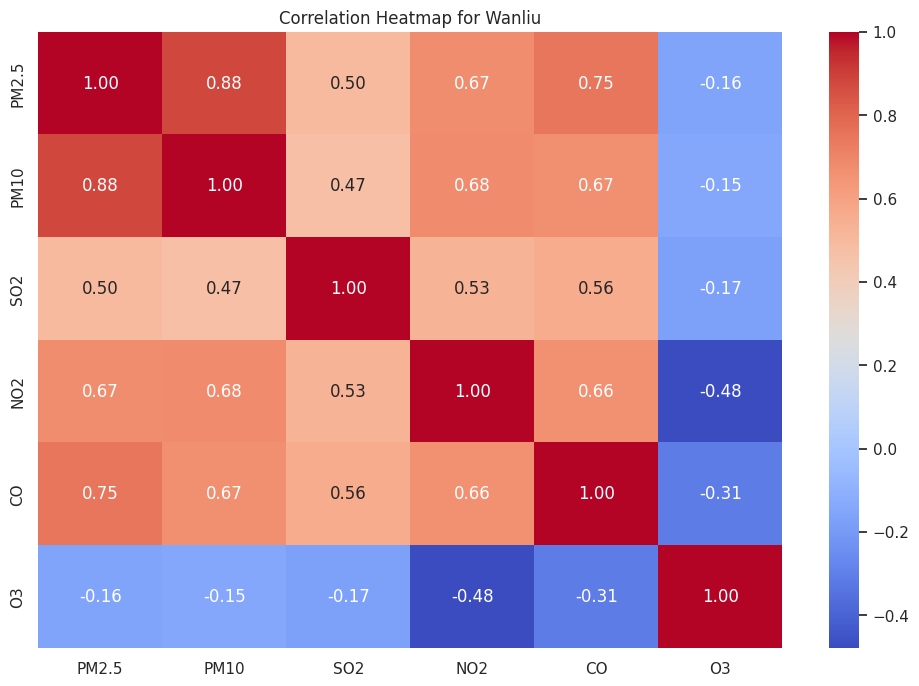

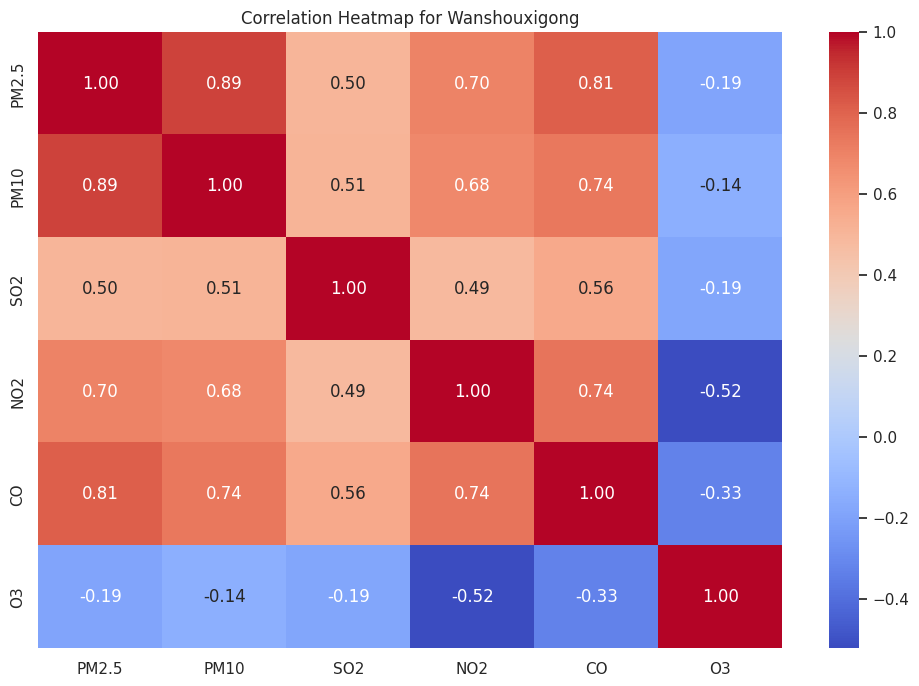

In [ ]:
# Korelasi PM2.5 dengan parameter kualitas udara lainnya
for station, df in dataframes.items():
    plt.figure()
    corr = df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].corr()
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"Correlation Heatmap for {station}")
    plt.show()


In [ ]:
import pandas as pd

# Define URLs for each station's data
urls = {
    "Aotizhongxin": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Aotizhongxin_20130301-20170228.csv",
    "Changping": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Changping_20130301-20170228.csv",
    "Dingling": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Dingling_20130301-20170228.csv",
    "Dongsi": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Dongsi_20130301-20170228.csv",
    "Guanyuan": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Guanyuan_20130301-20170228.csv",
    "Gucheng": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Gucheng_20130301-20170228.csv",
    "Huairou": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Huairou_20130301-20170228.csv",
    "Nongzhanguan": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Nongzhanguan_20130301-20170228.csv",
    "Shunyi": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Shunyi_20130301-20170228.csv",
    "Tiantan": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Tiantan_20130301-20170228.csv",
    "Wanliu": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Wanliu_20130301-20170228.csv",
    "Wanshouxigong": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Wanshouxigong_20130301-20170228.csv"
}

# Membaca data untuk setiap stasiun dan menyimpannya dalam dictionary
dataframes = {}
for station, url in urls.items():
    dataframes[station] = pd.read_csv(url)

# Aggregasi data berdasarkan bulan dan tahun
for station, df in dataframes.items():
    # Menggabungkan kolom 'year', 'month', dan 'day' menjadi kolom 'date'
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

    # Set kolom 'date' sebagai index
    df.set_index('date', inplace=True)

    # Melakukan resampling per bulan pada kolom numerik saja
    numeric_columns = df.select_dtypes(include='number').columns
    monthly_avg = df[numeric_columns].resample('MS').mean()

    # Menampilkan hasil aggregasi
    print(f"Monthly average of PM2.5 in {station}:\n", monthly_avg['PM2.5'], "\n")


Monthly average of PM2.5 in Aotizhongxin:
 date
2013-03-01    110.092742
2013-04-01     62.751389
2013-05-01     84.987871
2013-06-01    106.225941
2013-07-01     68.911290
2013-08-01     62.238223
2013-09-01     79.168289
2013-10-01     95.240915
2013-11-01     77.456825
2013-12-01     76.791386
2014-01-01     95.716802
2014-02-01    144.395706
2014-03-01     98.938172
2014-04-01    100.802450
2014-05-01     71.613896
2014-06-01     59.698745
2014-07-01     93.447761
2014-08-01     68.060647
2014-09-01     70.040808
2014-10-01    127.746871
2014-11-01     93.699720
2014-12-01     55.609819
2015-01-01     91.615625
2015-02-01     85.543544
2015-03-01     88.308815
2015-04-01     75.668860
2015-05-01     59.346829
2015-06-01     62.975182
2015-07-01     66.368707
2015-08-01     45.030612
2015-09-01     51.817539
2015-10-01     78.213514
2015-11-01    123.385491
2015-12-01    154.163265
2016-01-01     68.138965
2016-02-01     44.758671
2016-03-01    102.488732
2016-04-01     67.309942
20

**Insight:**
- Pada tahap ini saya melakukan exploratory data untuk mendapatkan pemahaman yang lebih mendalam tentang dataset kualitas udara.
- Beberapa analisis utama meliputi: distribusi data, analisis tren PM2.5 dari waktu ke waktu, analisis korelasi, dan aggregasi data.

## Visualization & Explanatory Analysis

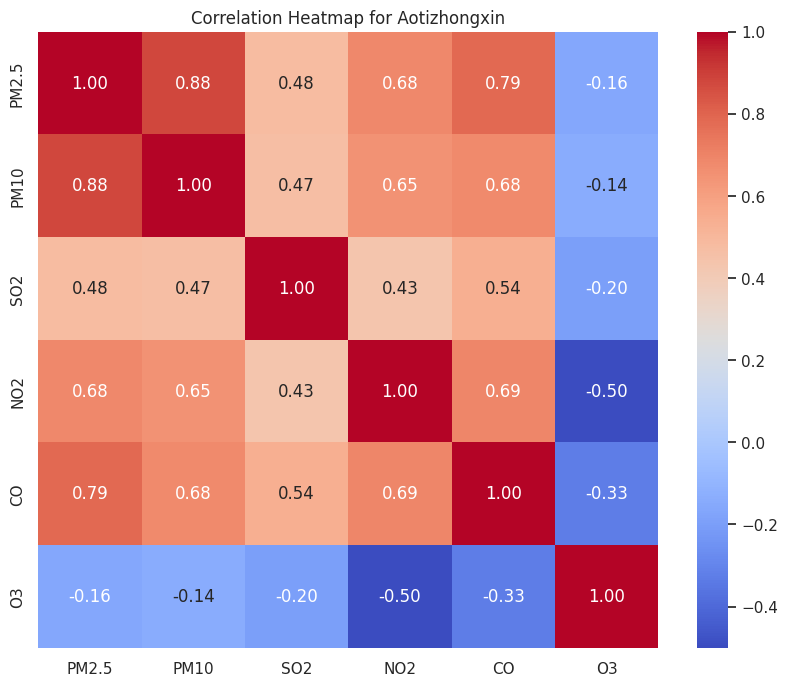

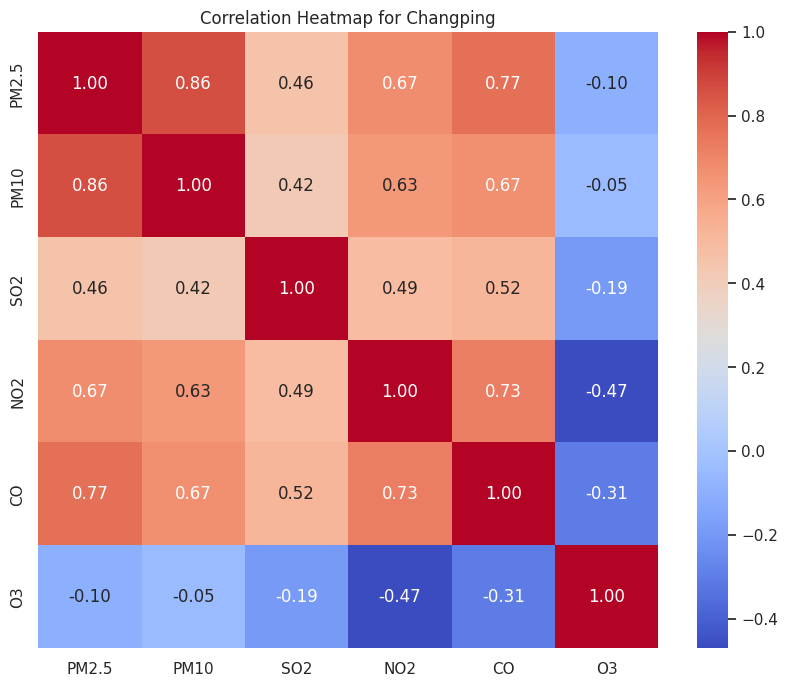

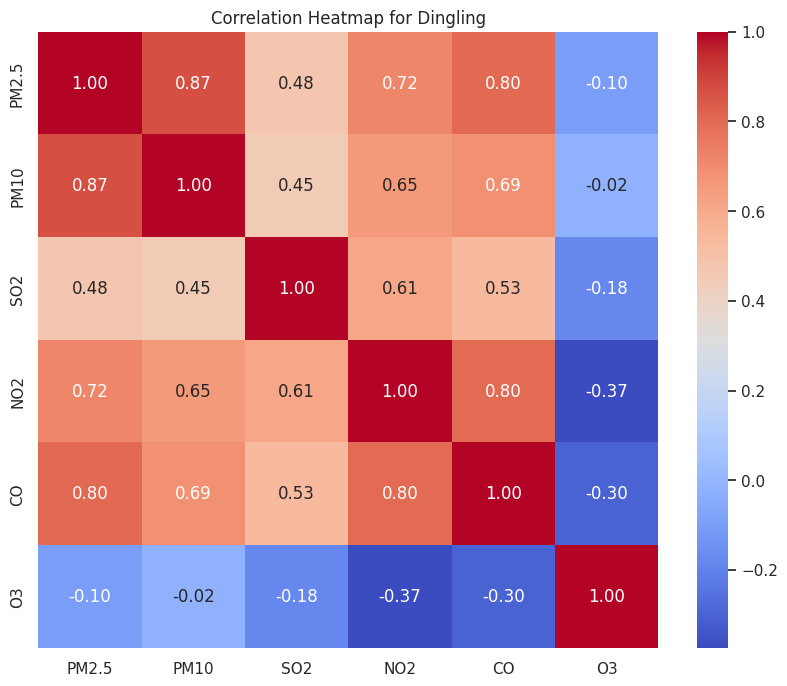

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasi PM2.5 dengan parameter kualitas udara lainnya
for station, df in dataframes.items():
    plt.figure(figsize=(10, 8))
    corr = df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].corr()
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"Correlation Heatmap for {station}")
    plt.show()


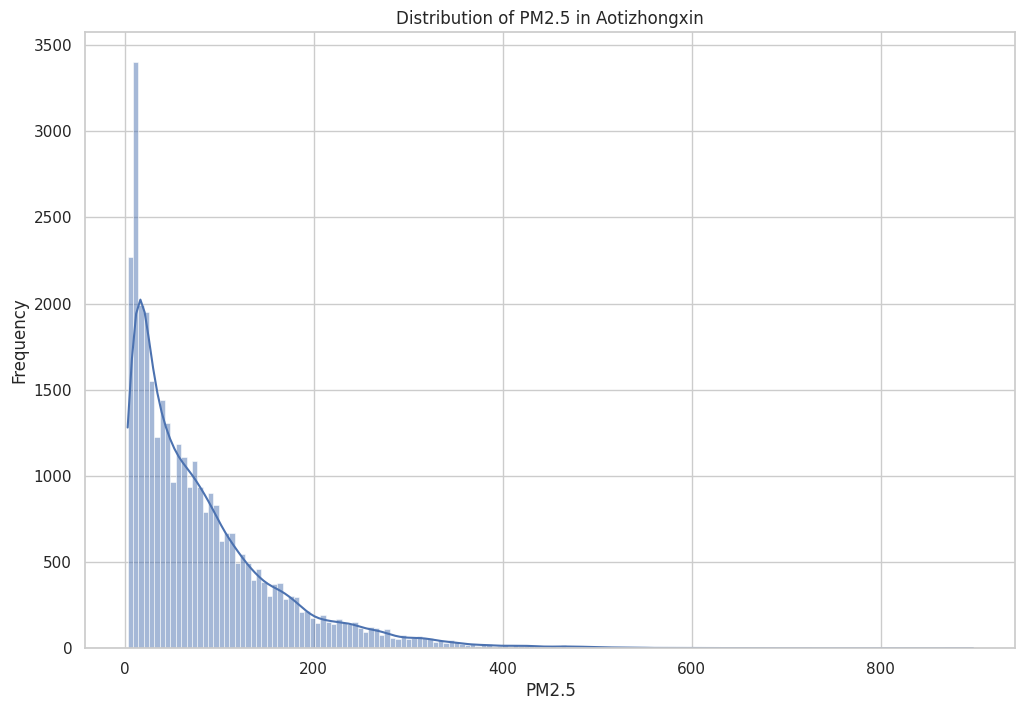

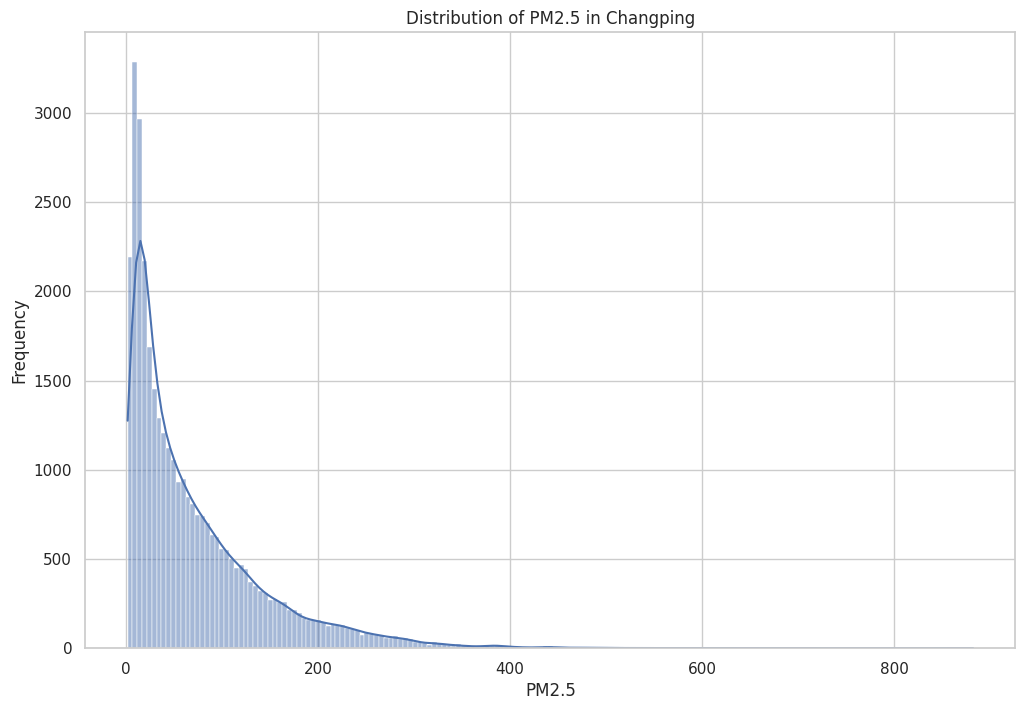

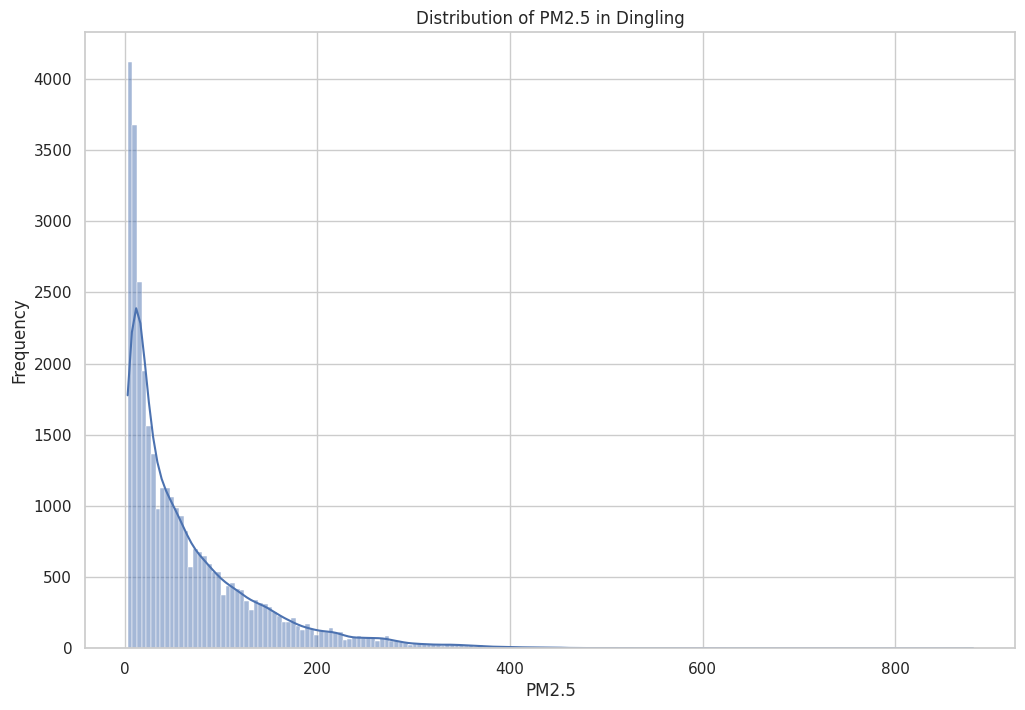

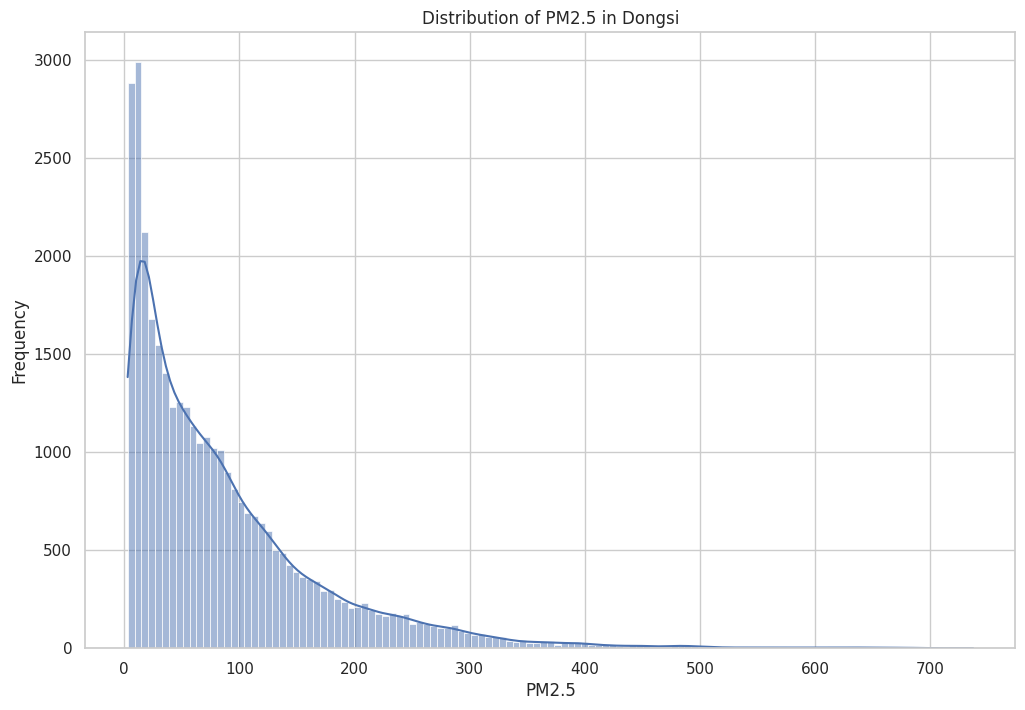

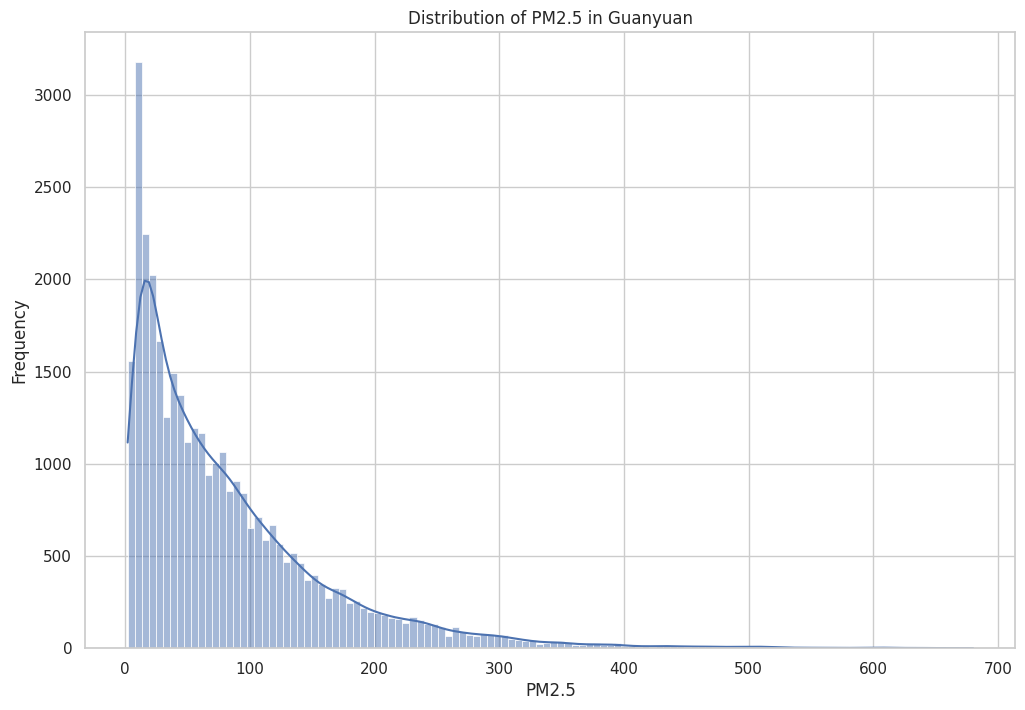

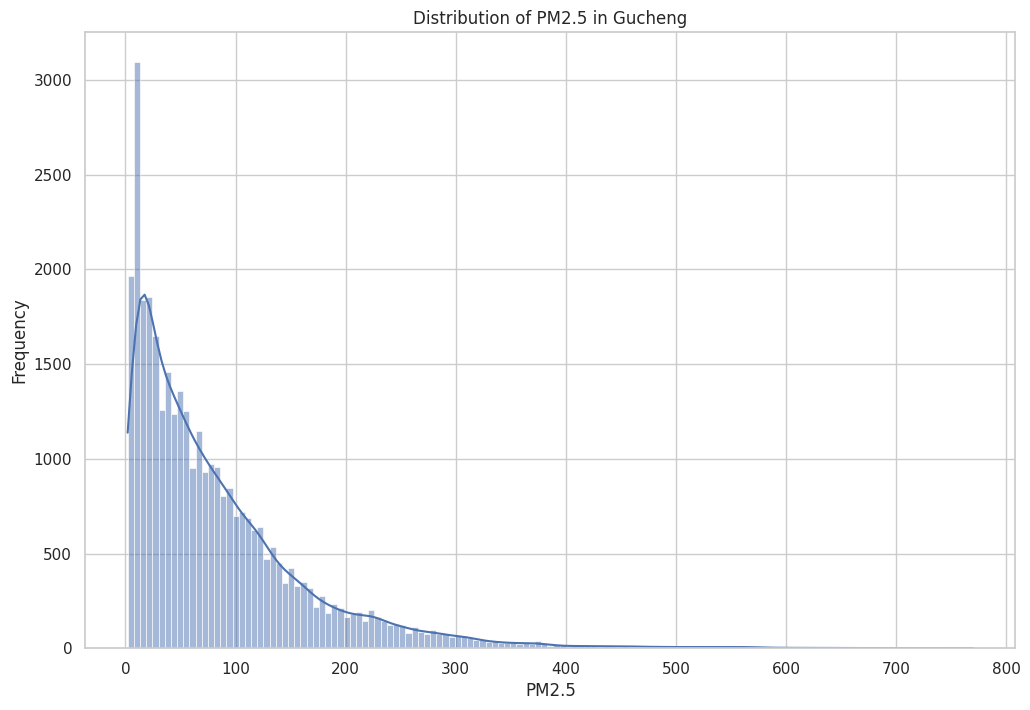

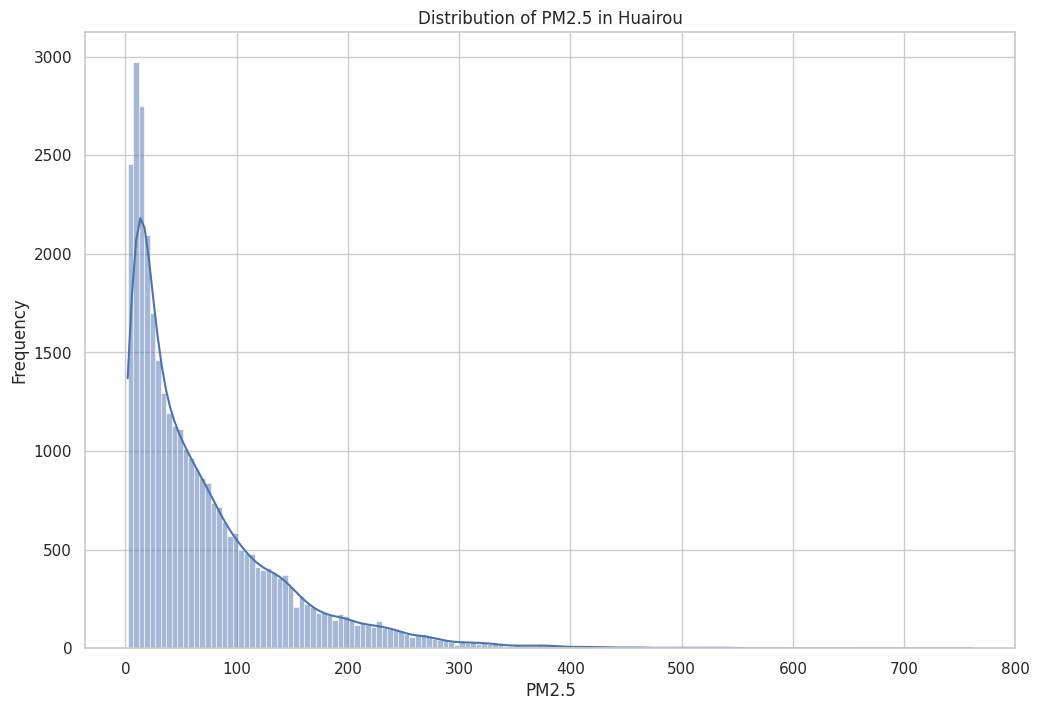

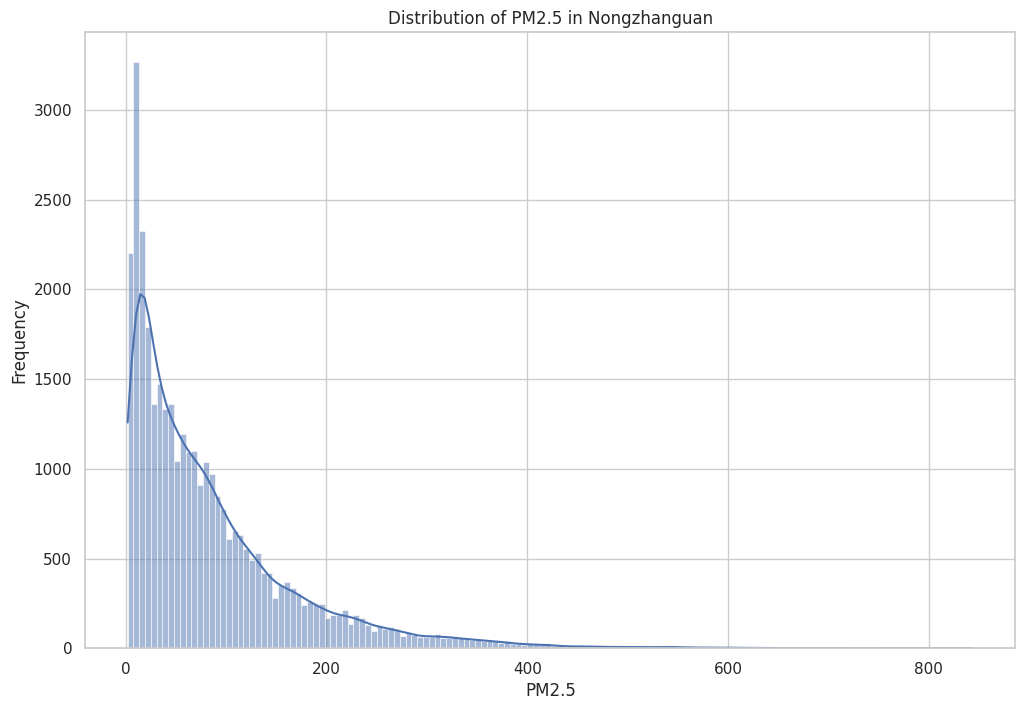

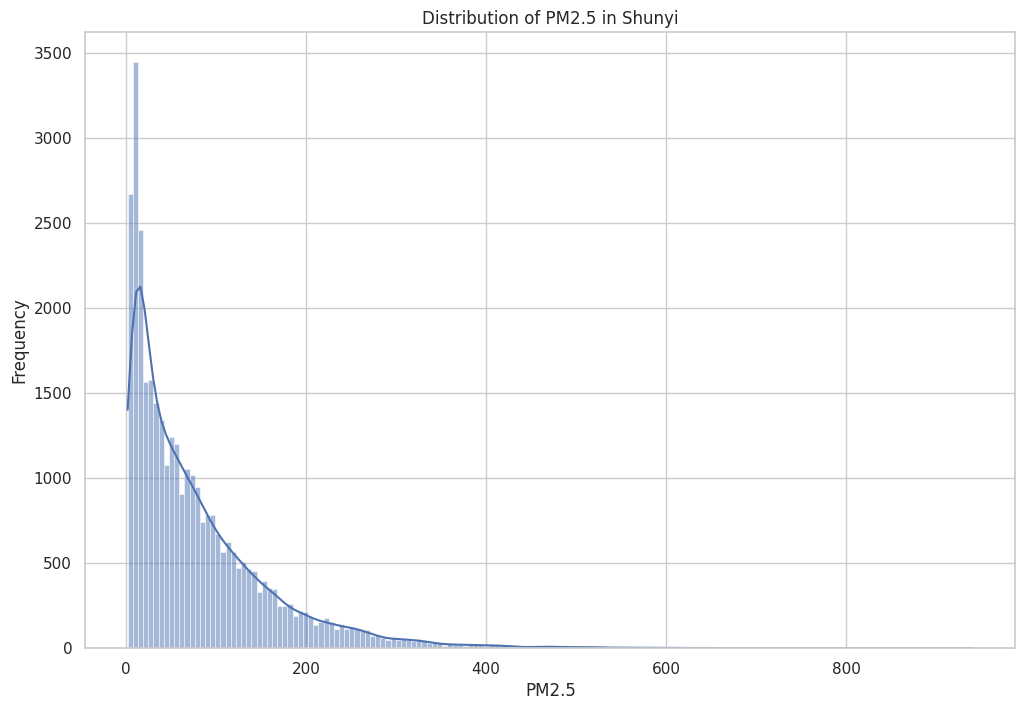

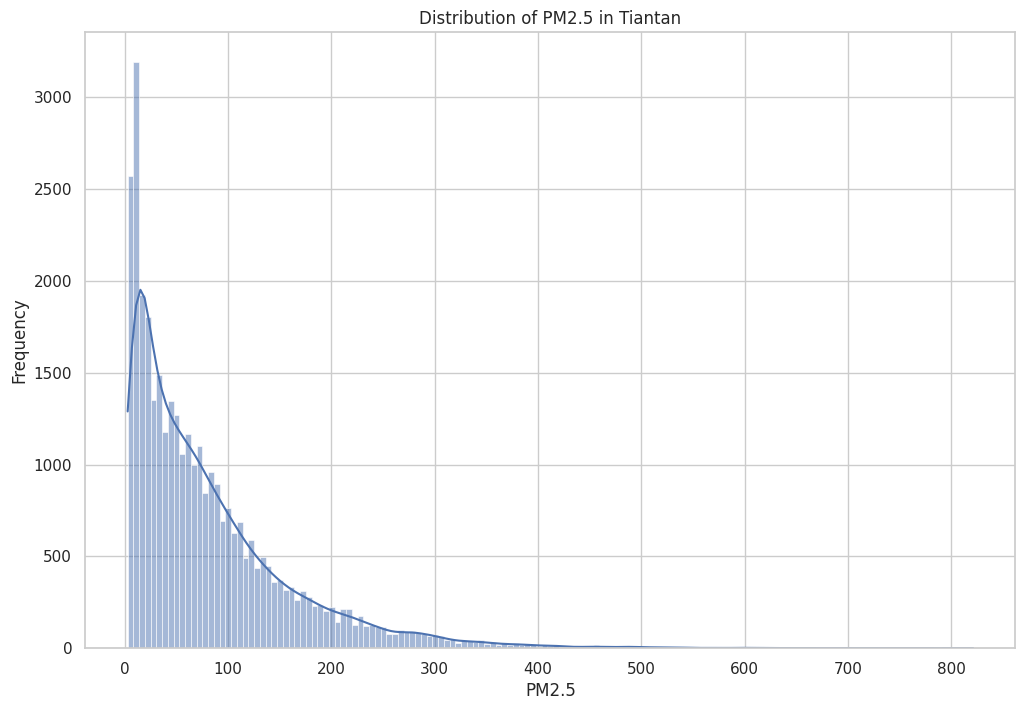

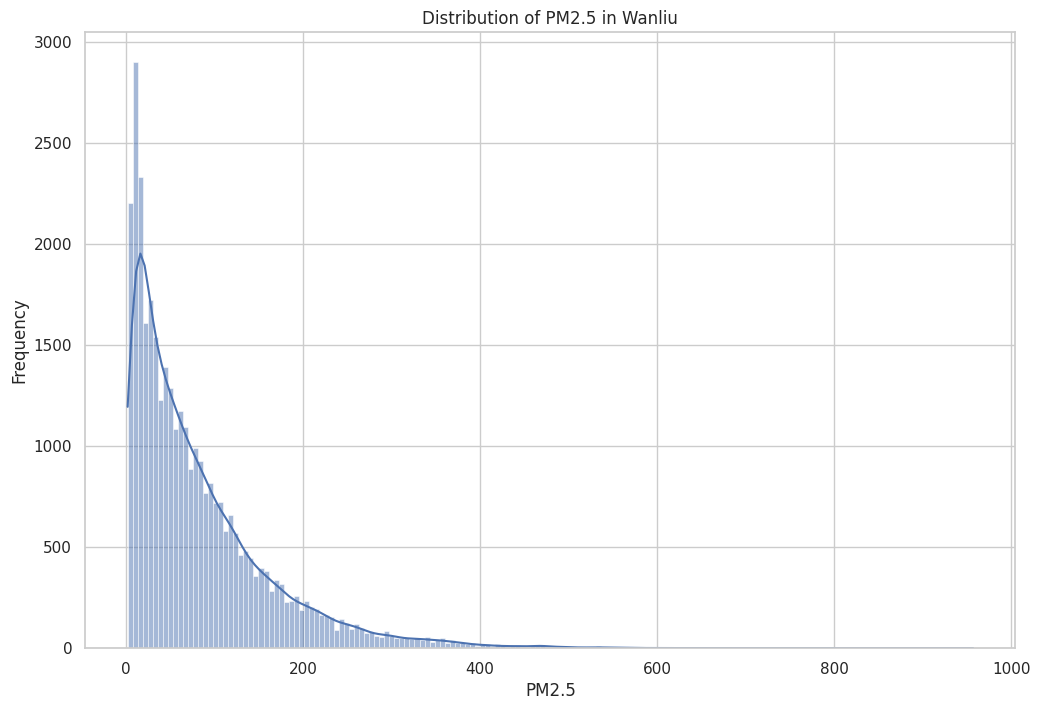

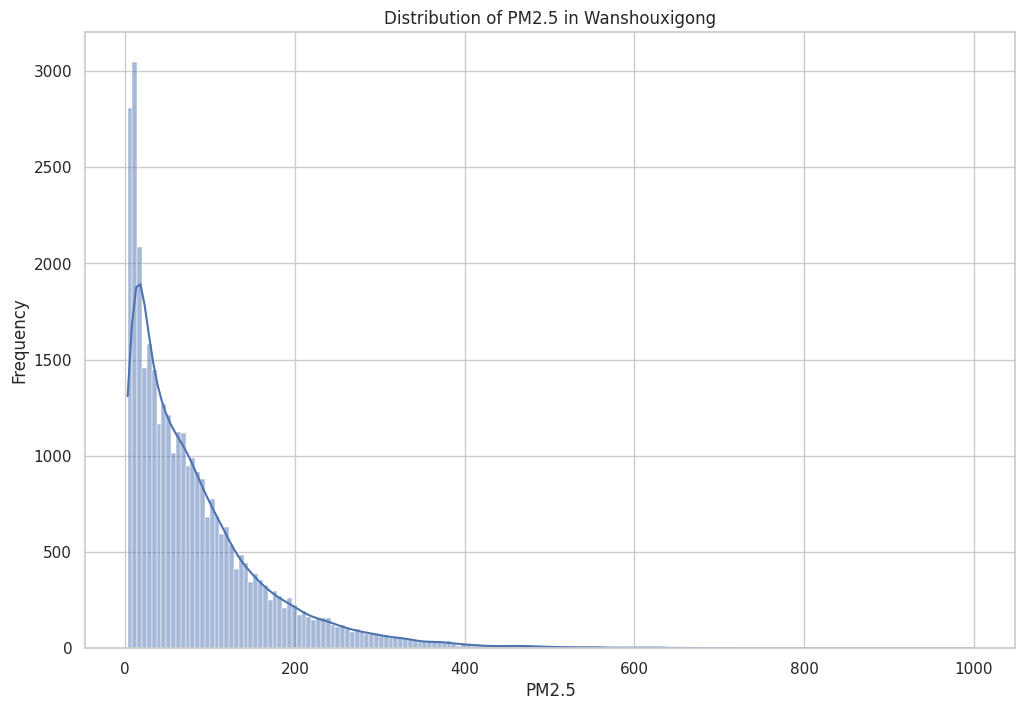

In [ ]:
# Distribusi PM2.5
for station, df in dataframes.items():
    plt.figure()
    sns.histplot(df["PM2.5"].dropna(), kde=True)
    plt.title(f"Distribution of PM2.5 in {station}")
    plt.xlabel("PM2.5")
    plt.ylabel("Frequency")
    plt.show()


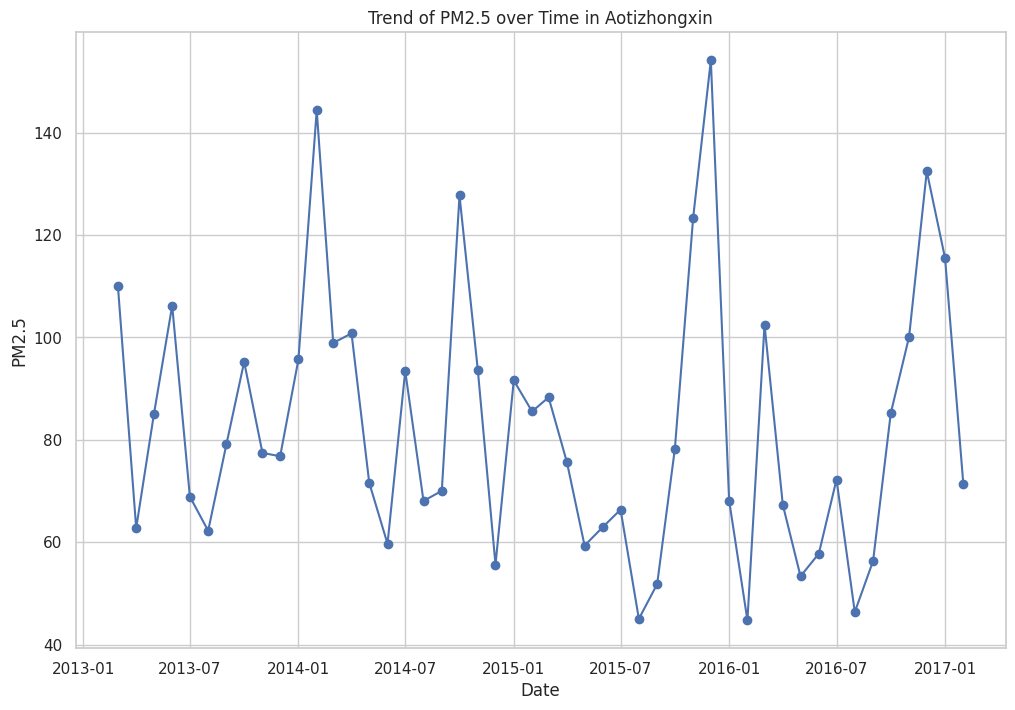

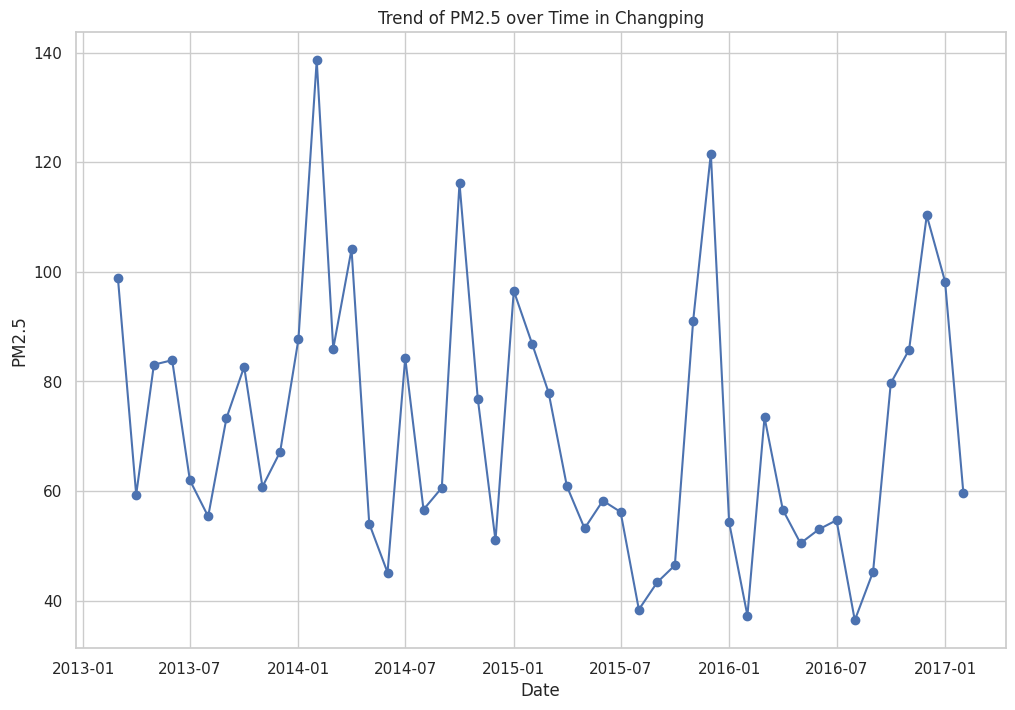

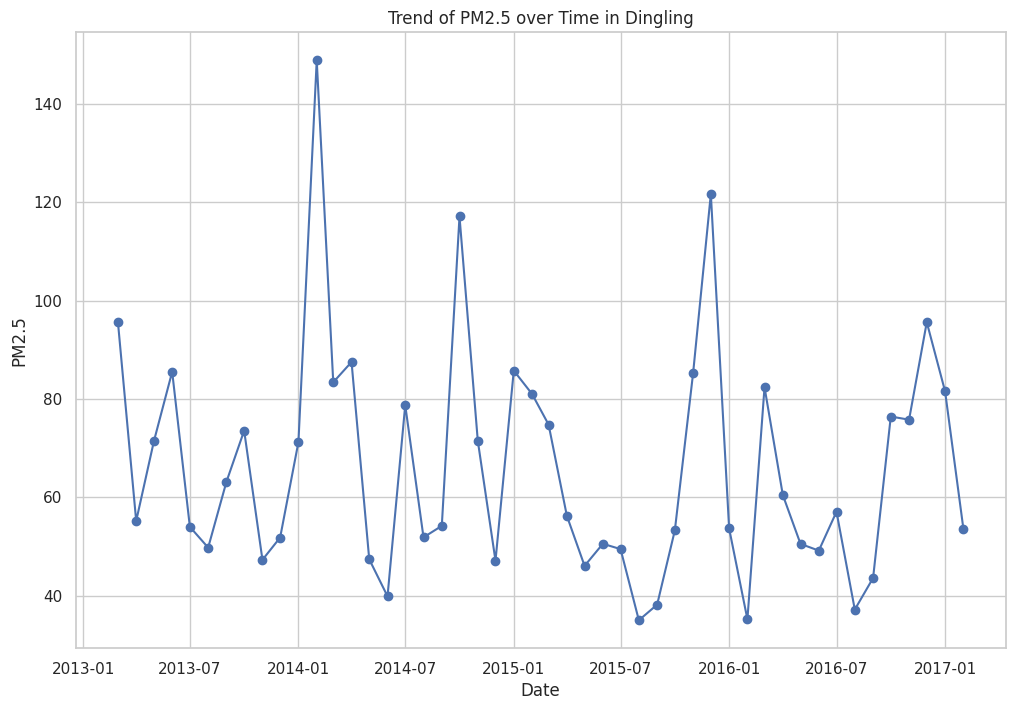

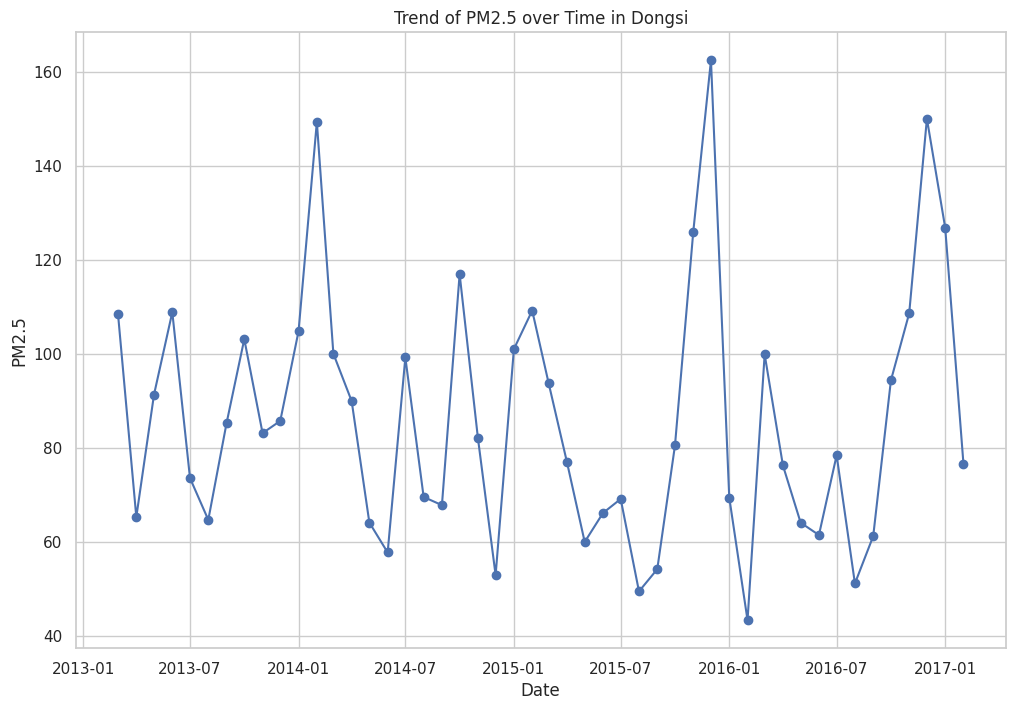

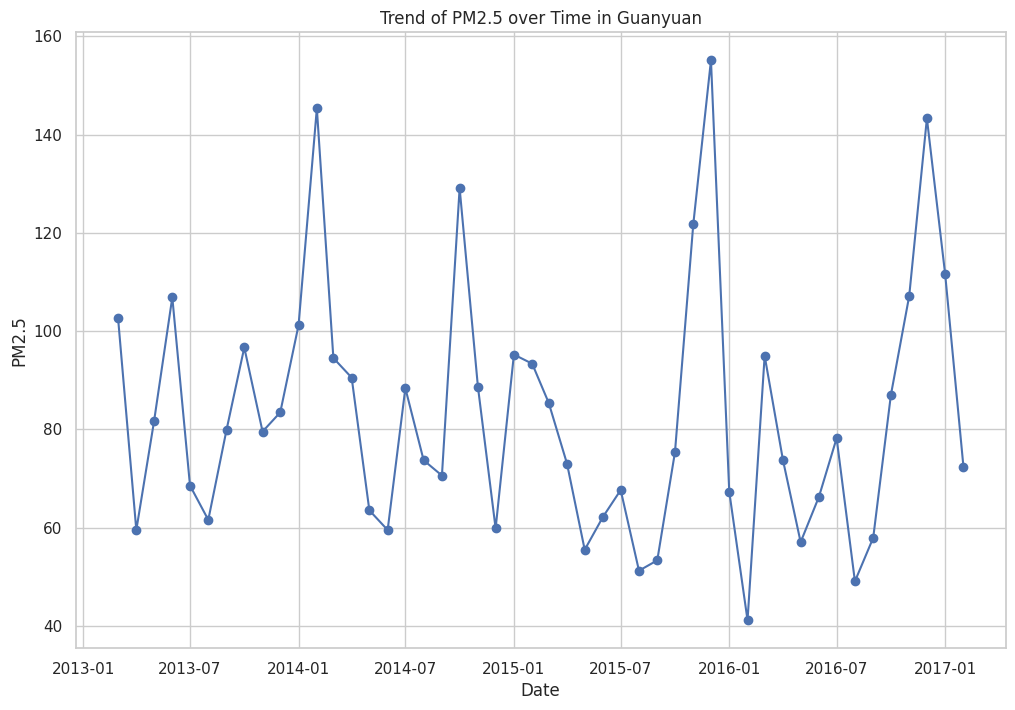

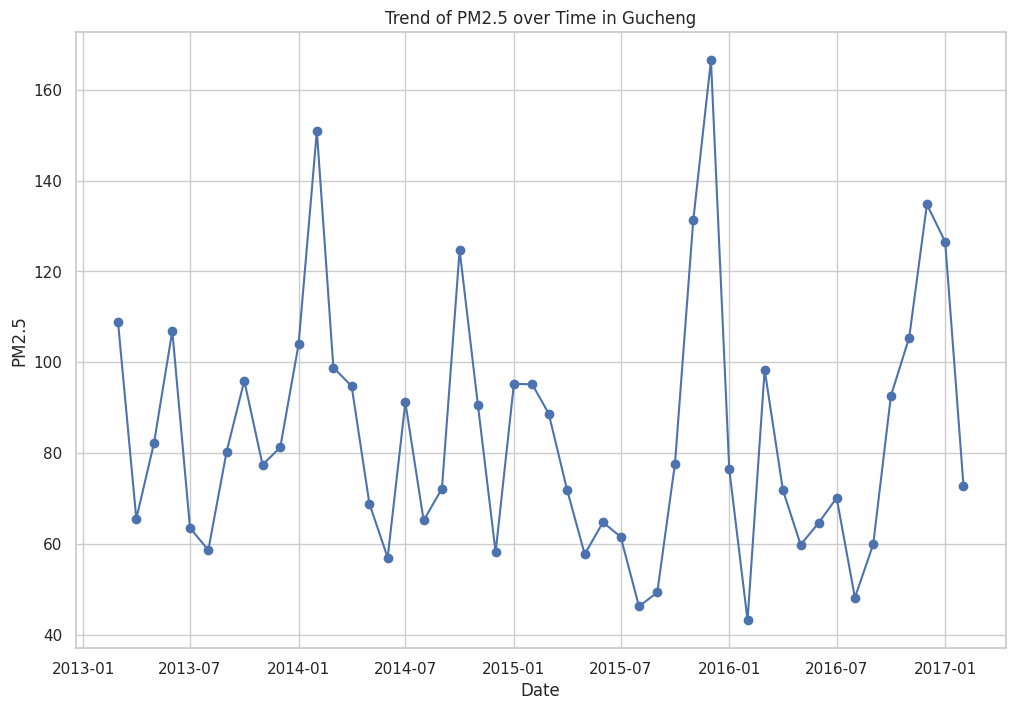

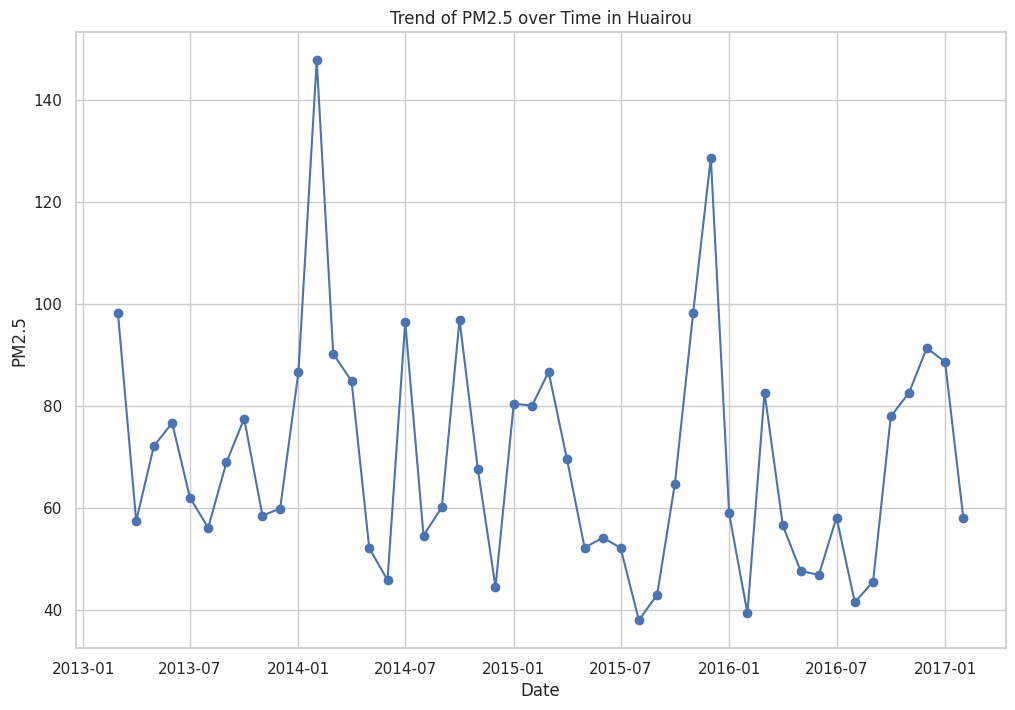

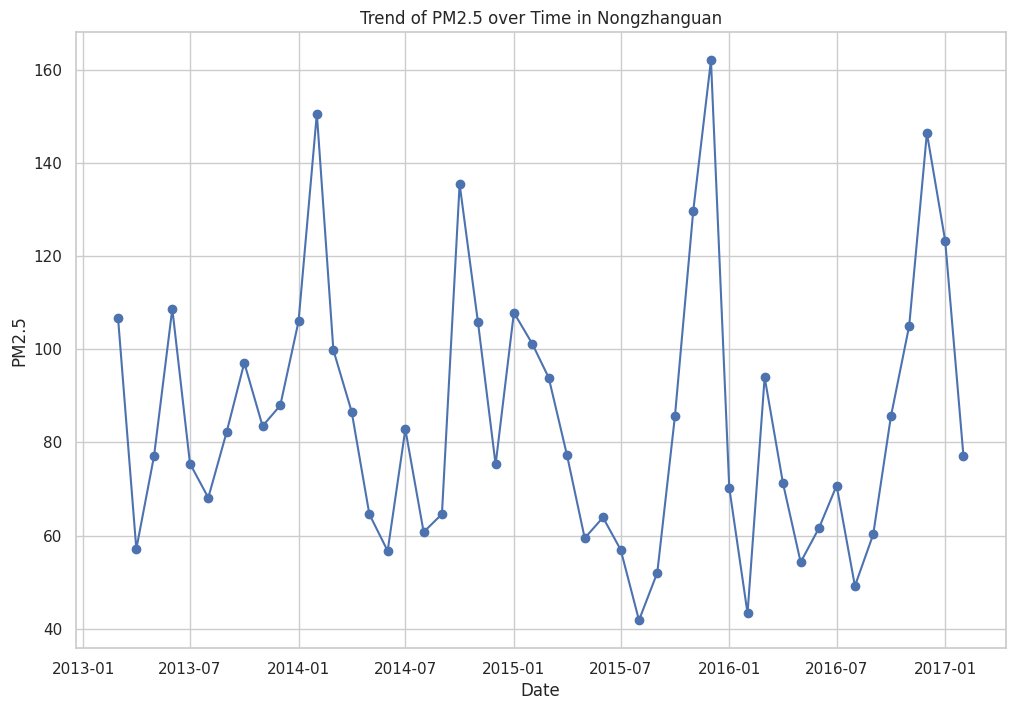

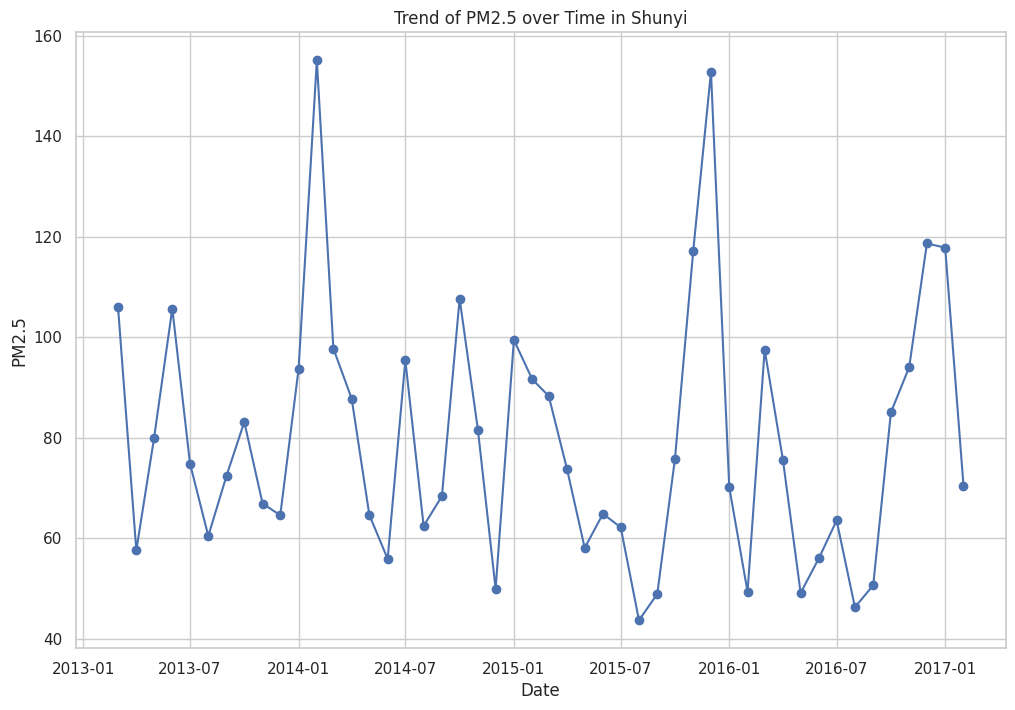

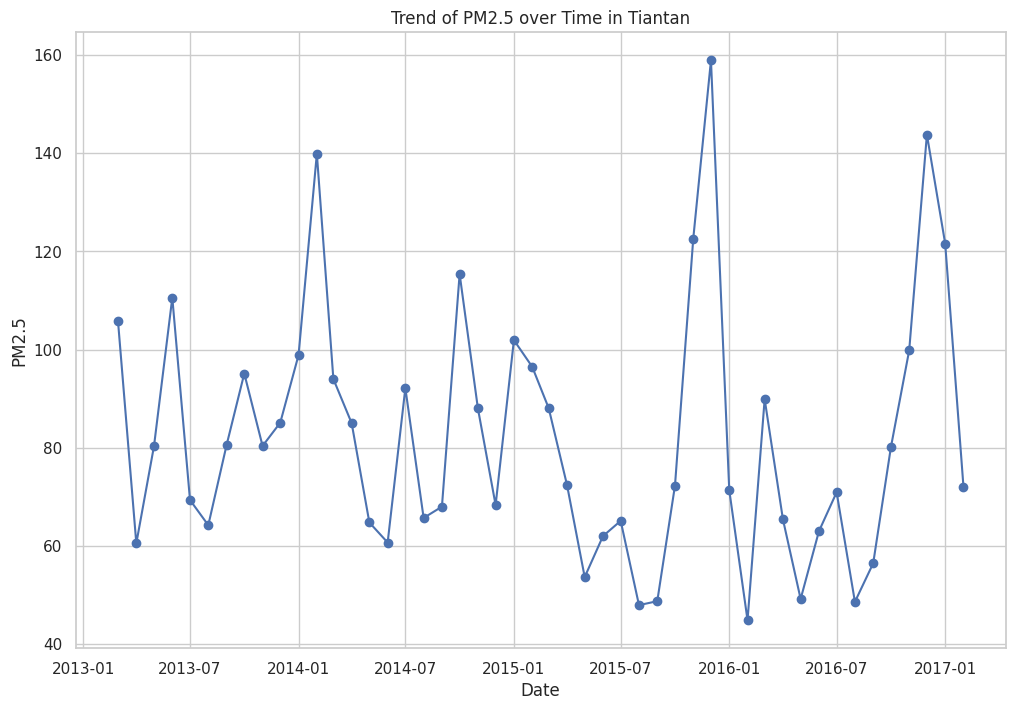

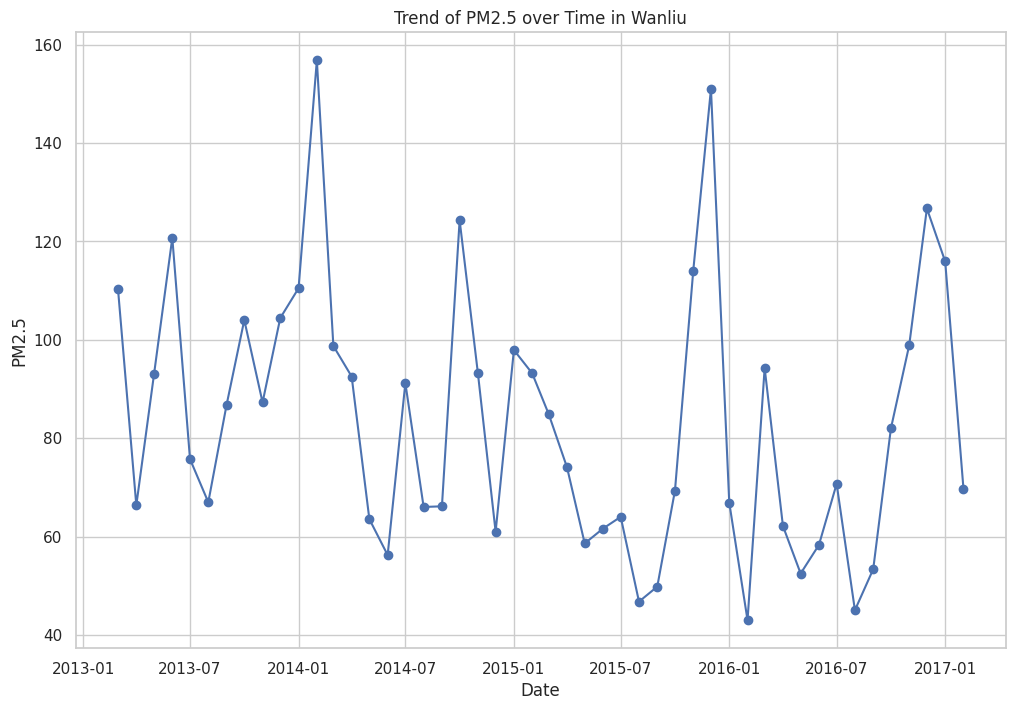

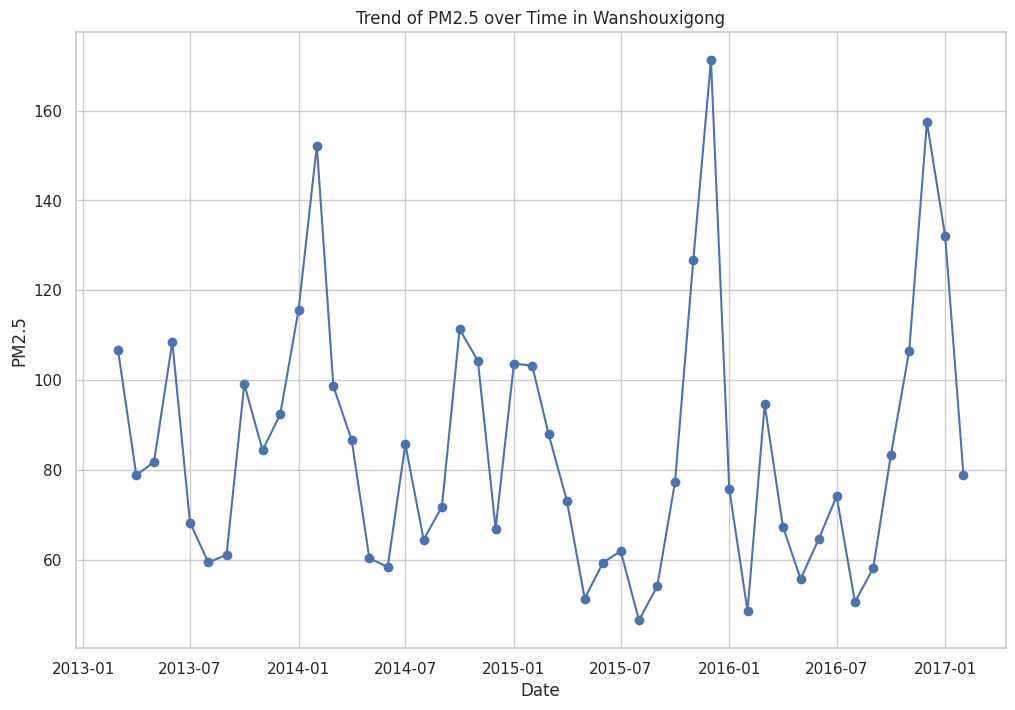

In [ ]:
# Tren PM2.5 dari waktu ke waktu
for station, df in dataframes.items():
    plt.figure()
    monthly_avg = df['PM2.5'].resample('MS').mean()
    plt.plot(monthly_avg.index, monthly_avg, marker='o')
    plt.title(f"Trend of PM2.5 over Time in {station}")
    plt.xlabel("Date")
    plt.ylabel("PM2.5")
    plt.grid(True)
    plt.show()


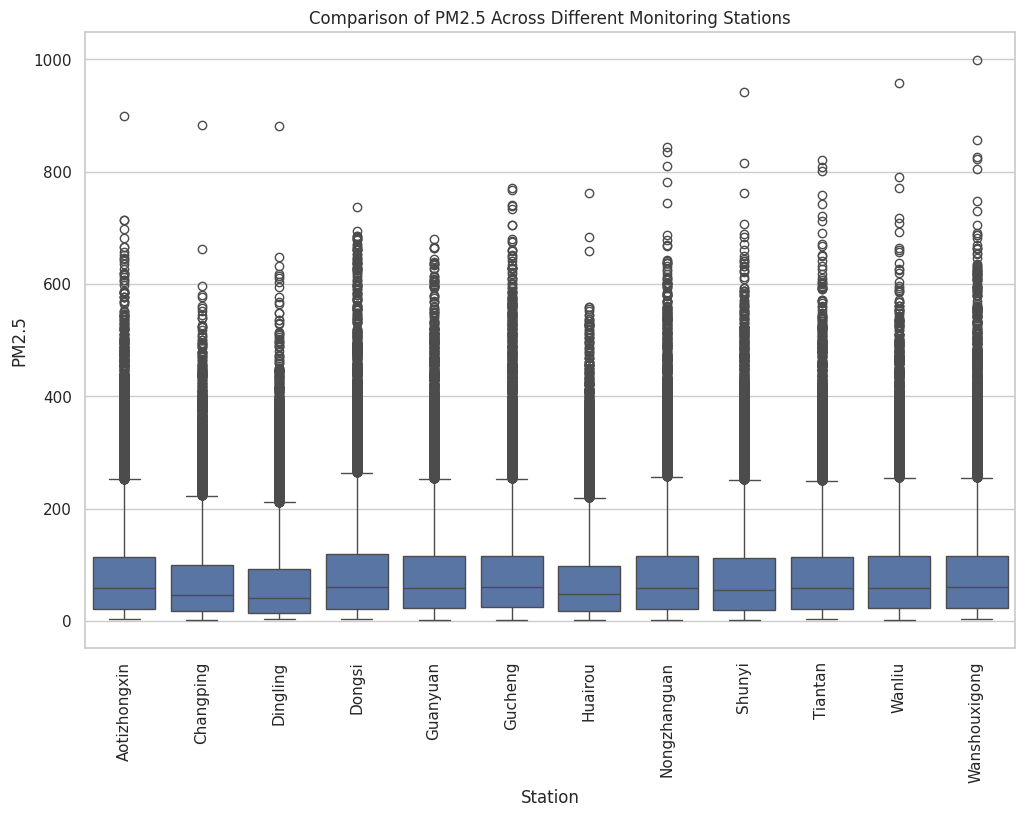

In [ ]:
# Boxplot PM2.5 untuk setiap stasiun pemantauan
all_data = pd.concat(dataframes.values(), keys=dataframes.keys(), names=['Station', 'Index'])
plt.figure(figsize=(12, 8))
sns.boxplot(x="Station", y="PM2.5", data=all_data.reset_index())
plt.title("Comparison of PM2.5 Across Different Monitoring Stations")
plt.xlabel("Station")
plt.ylabel("PM2.5")
plt.xticks(rotation=90)
plt.show()


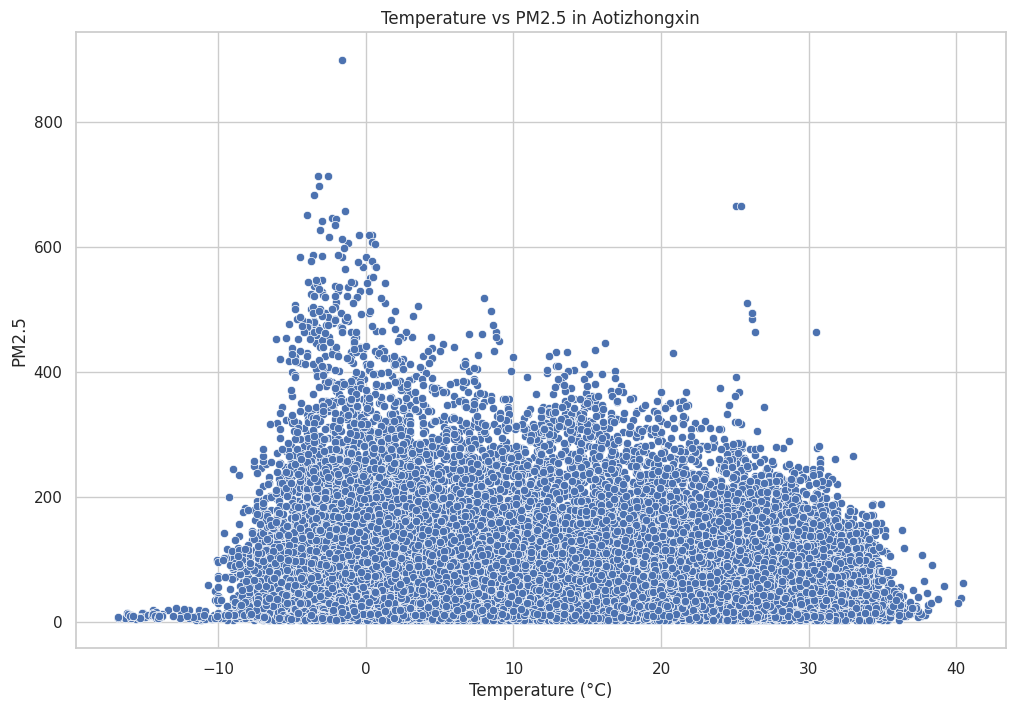

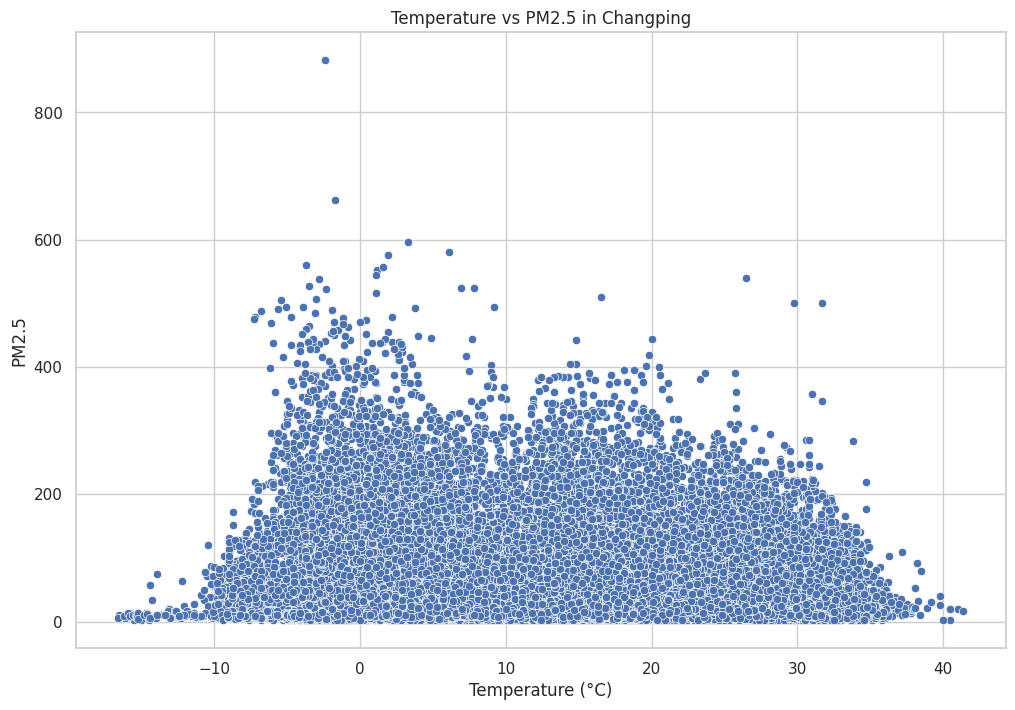

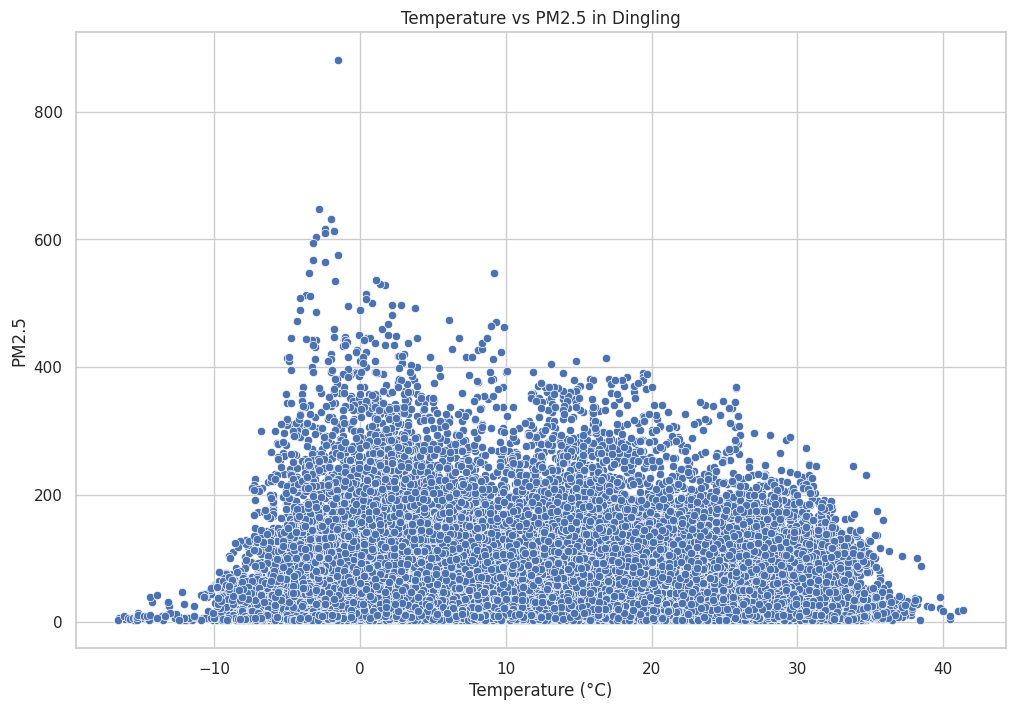

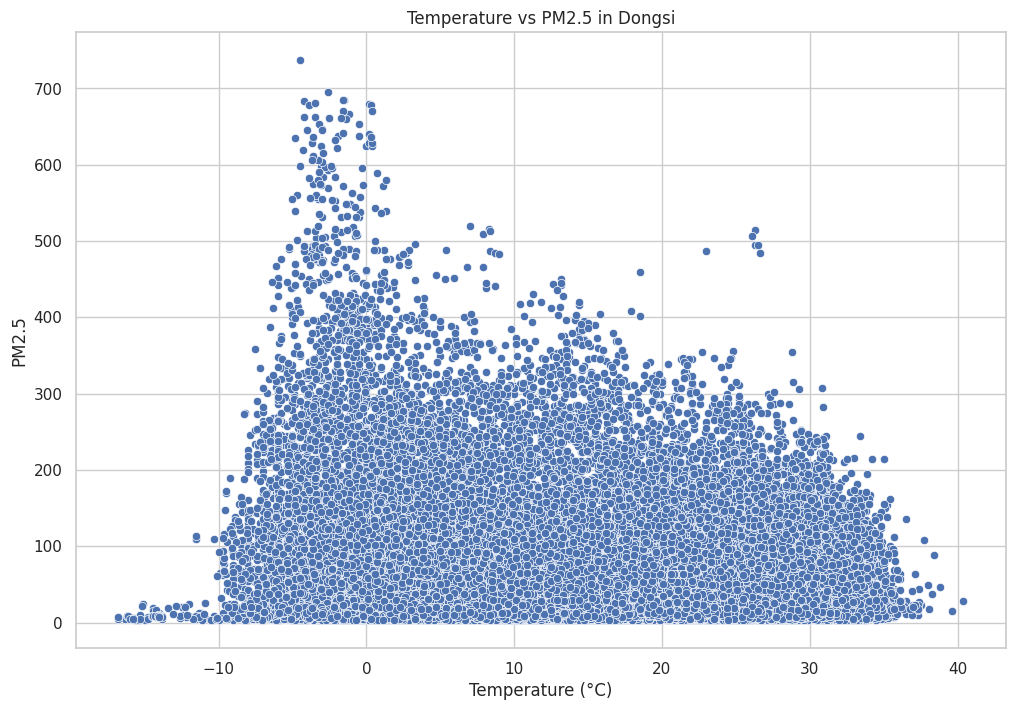

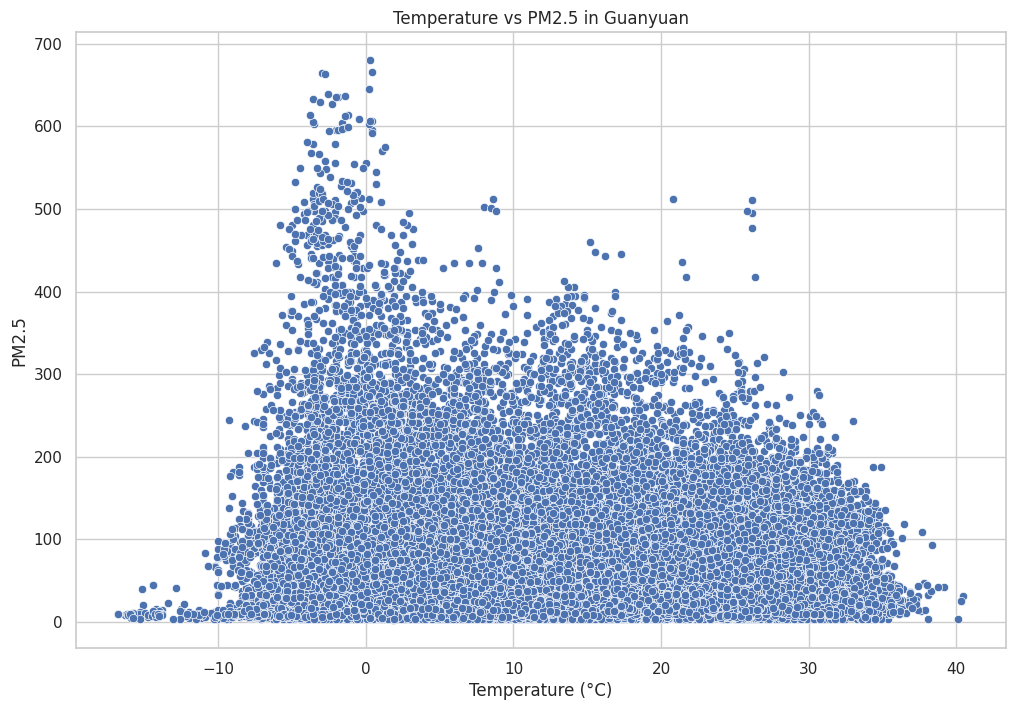

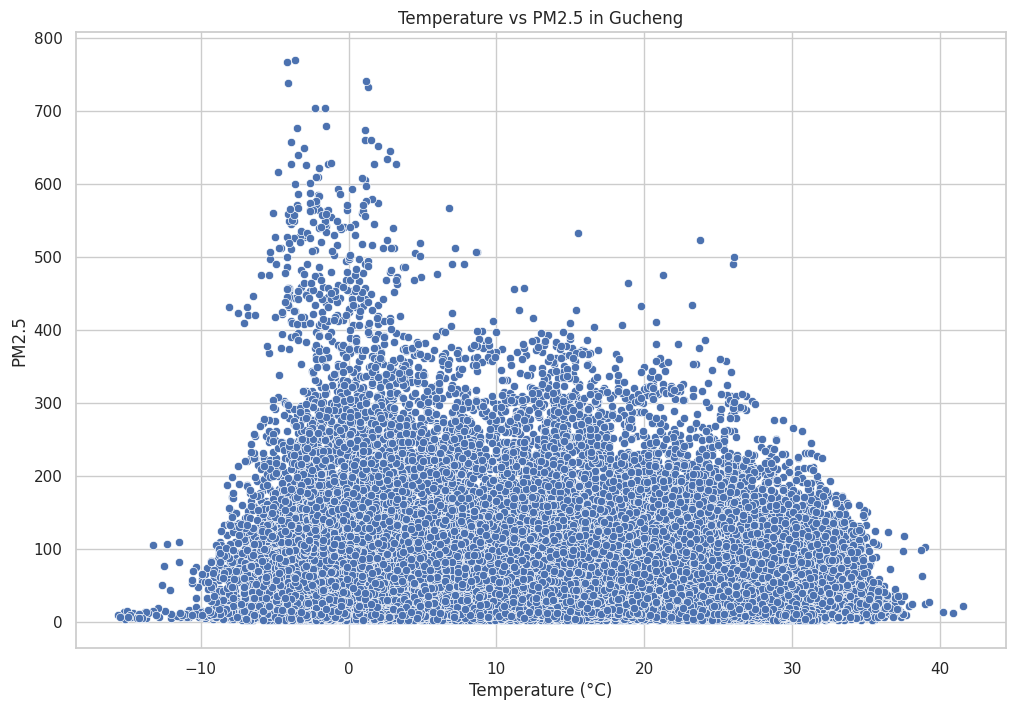

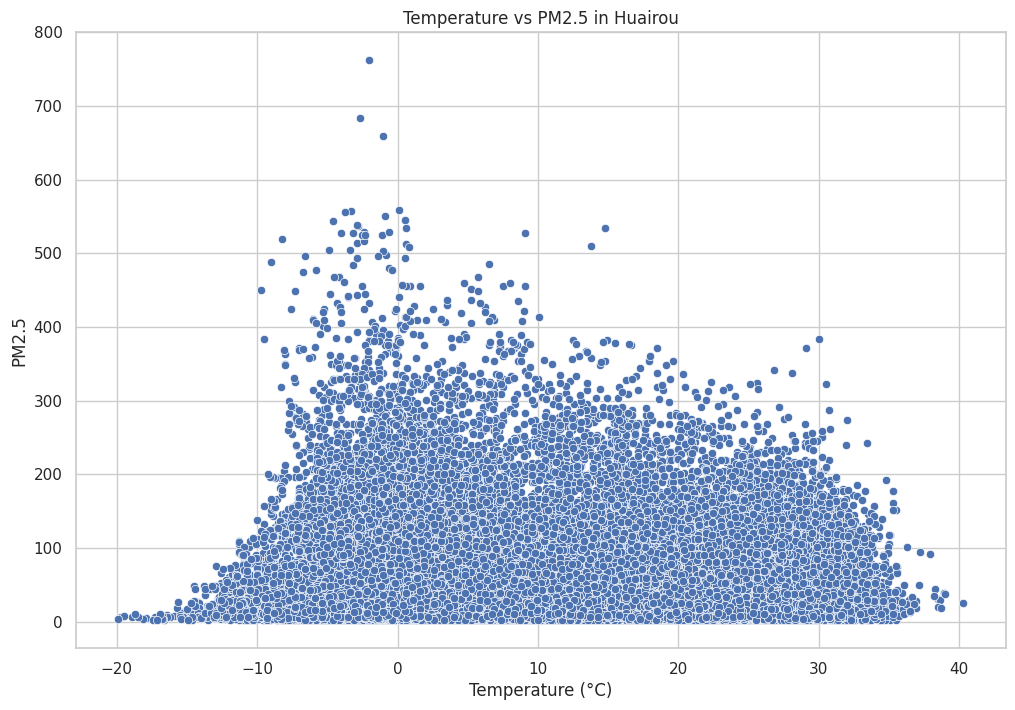

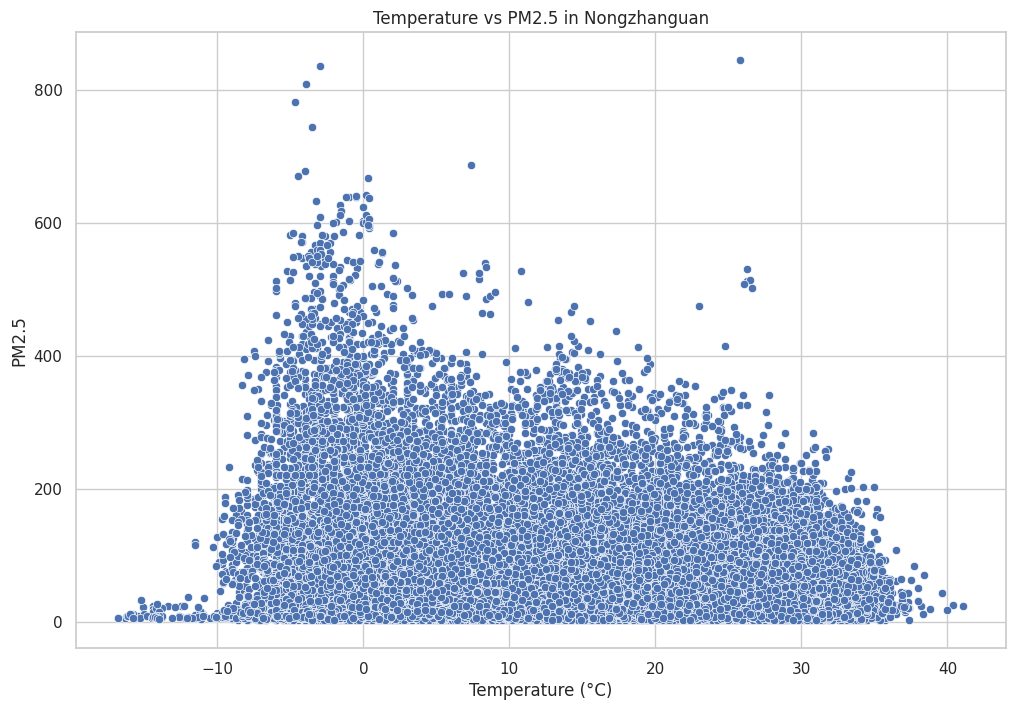

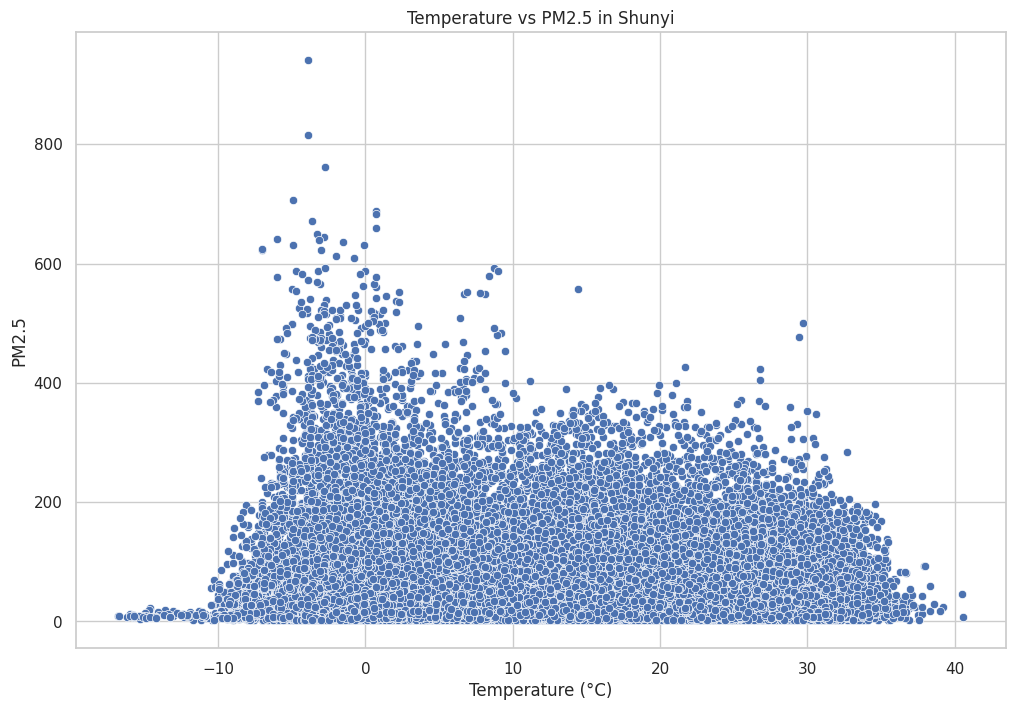

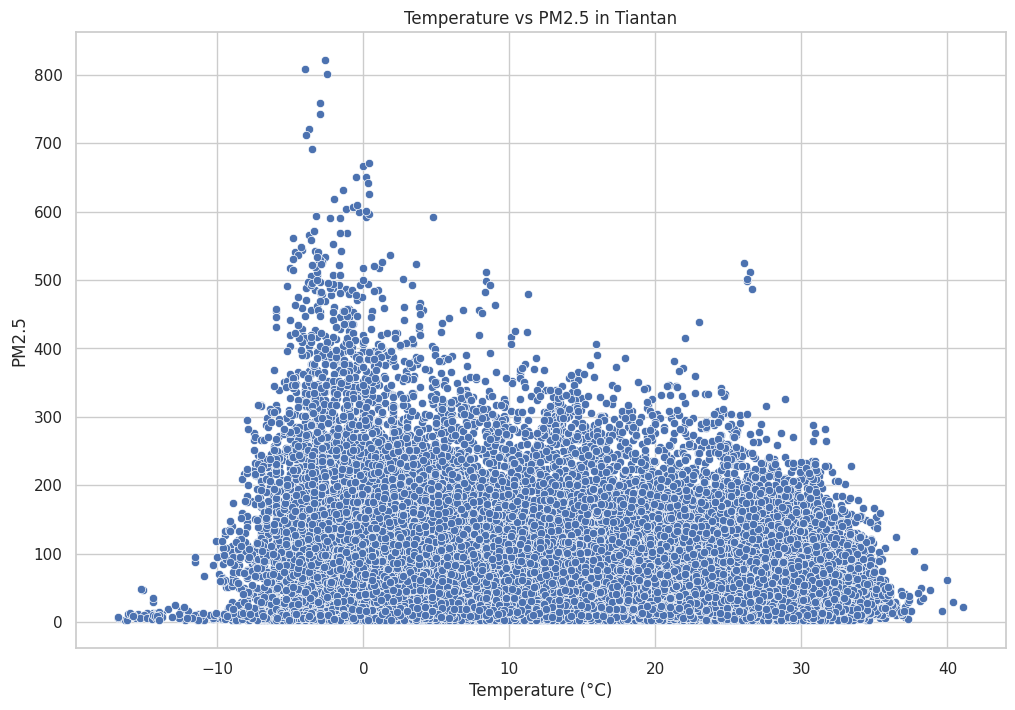

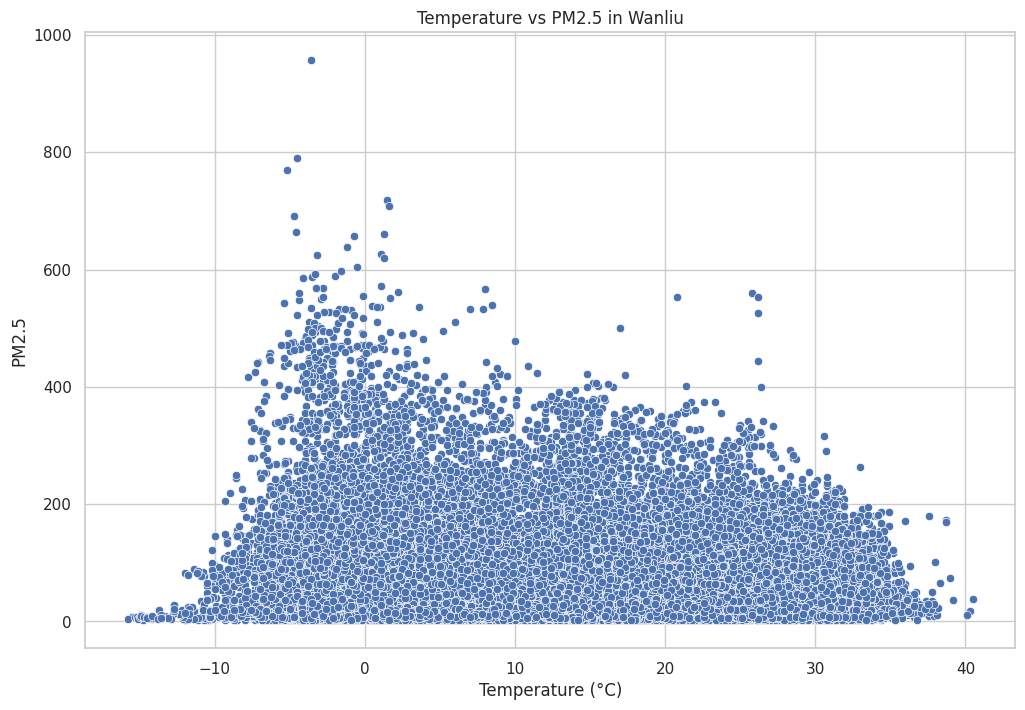

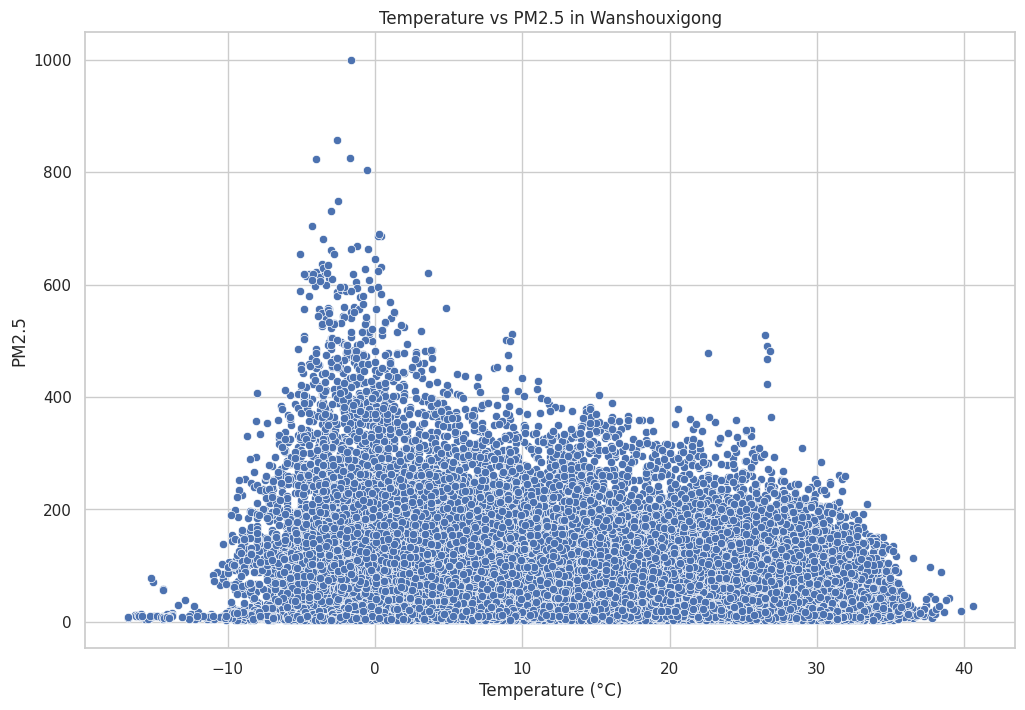

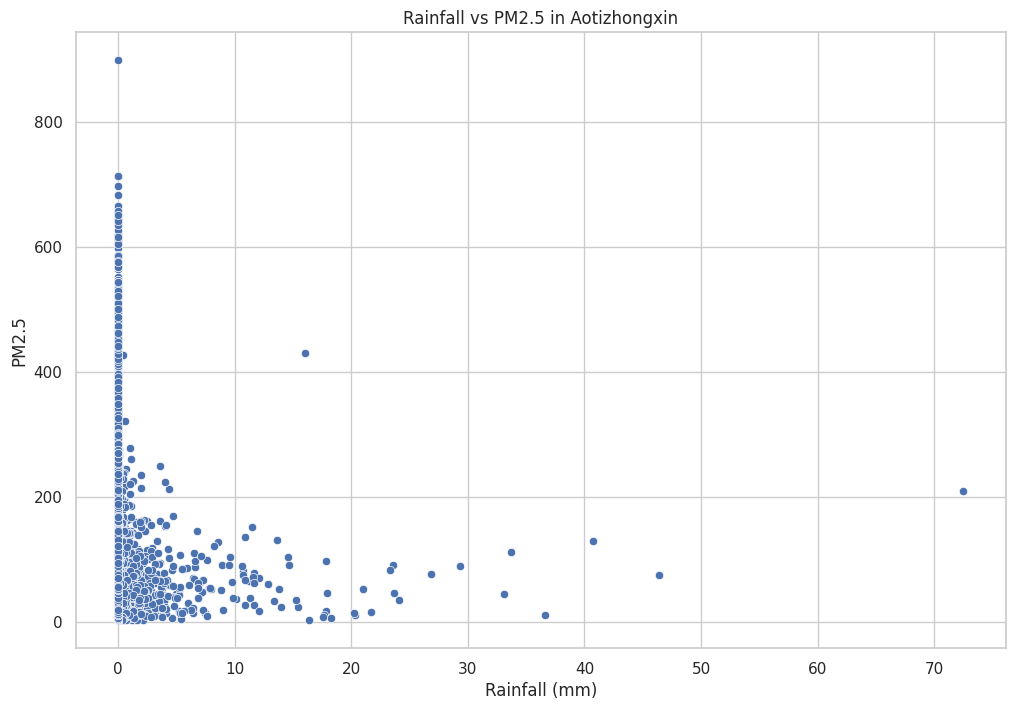

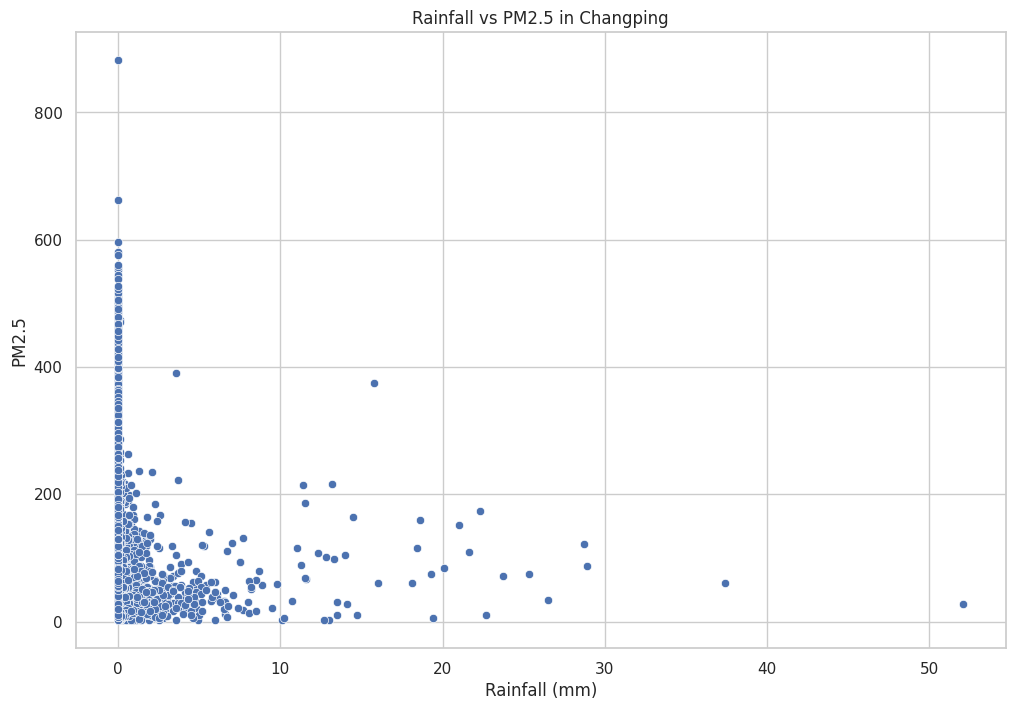

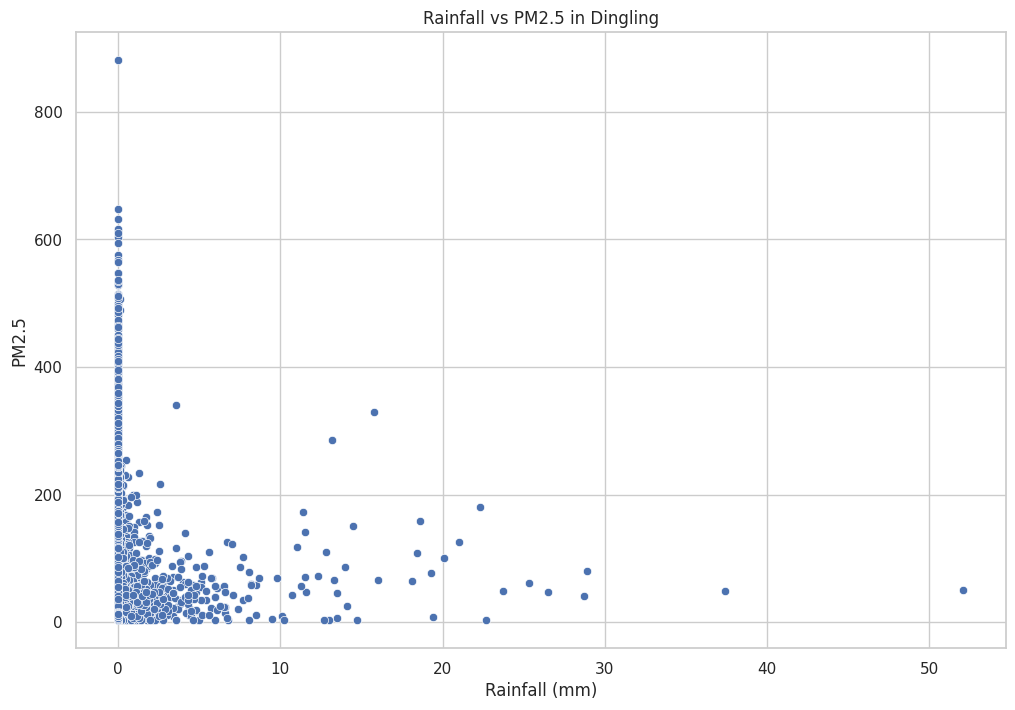

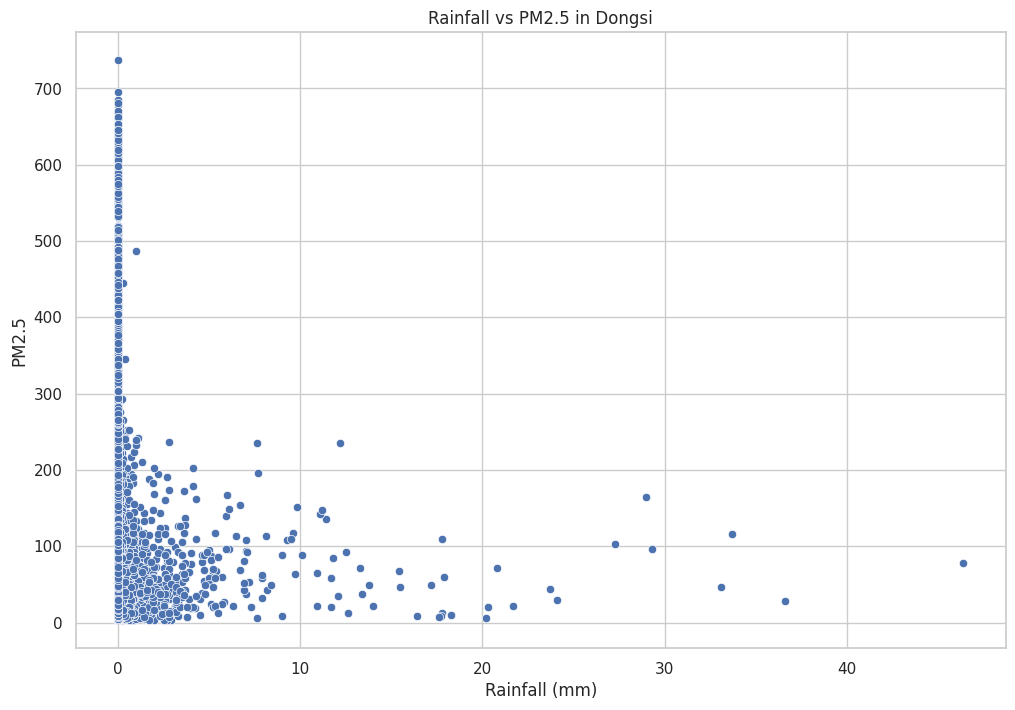

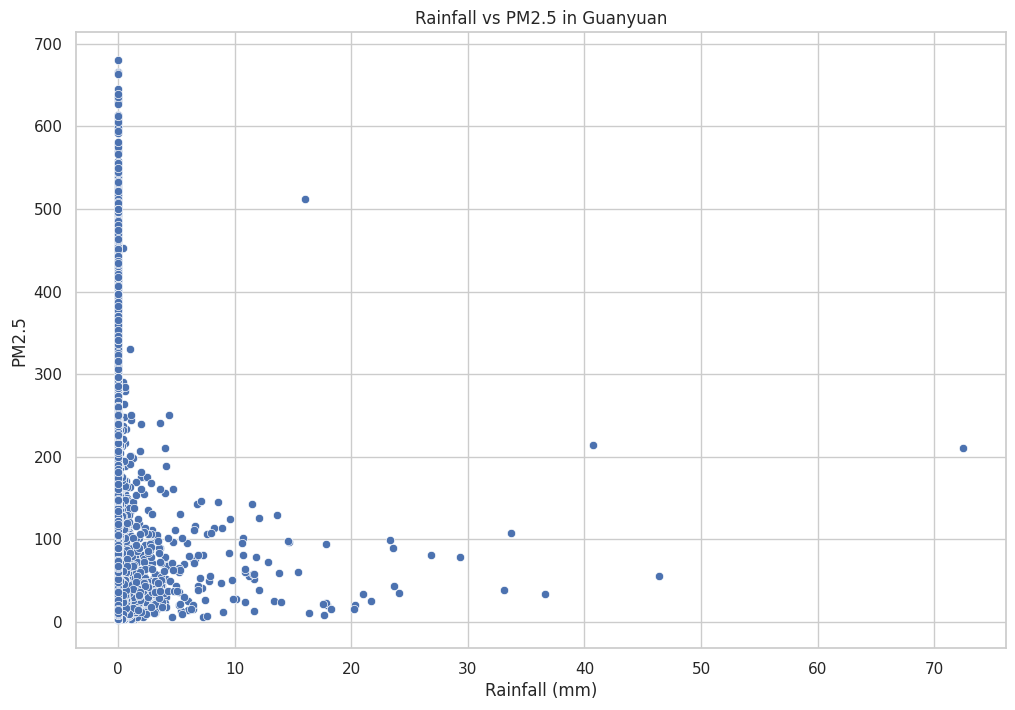

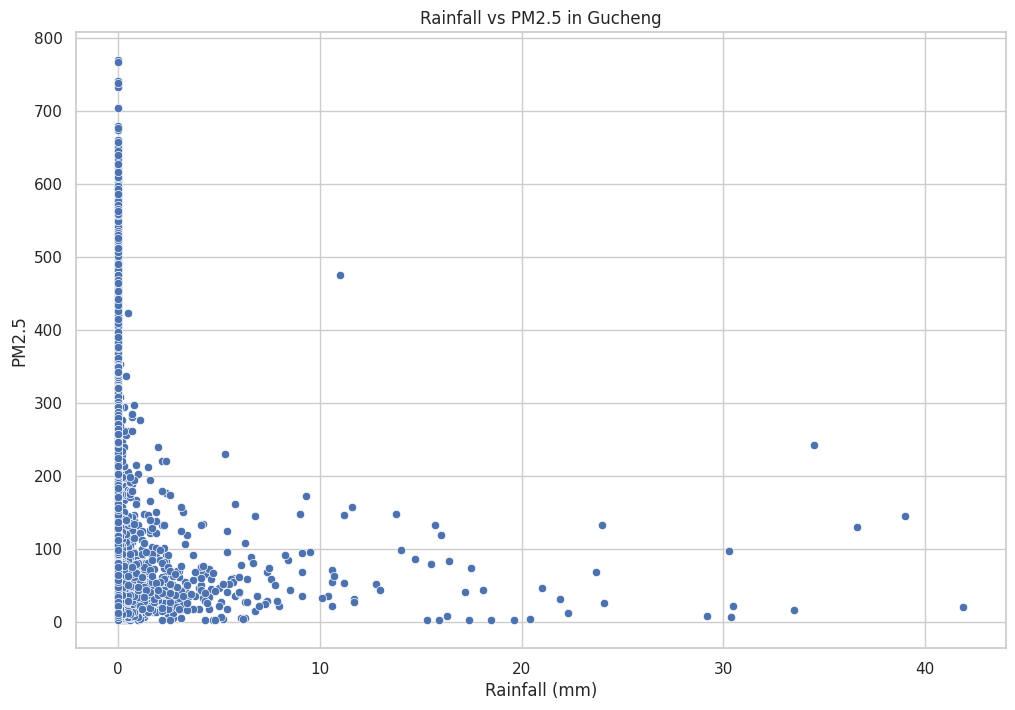

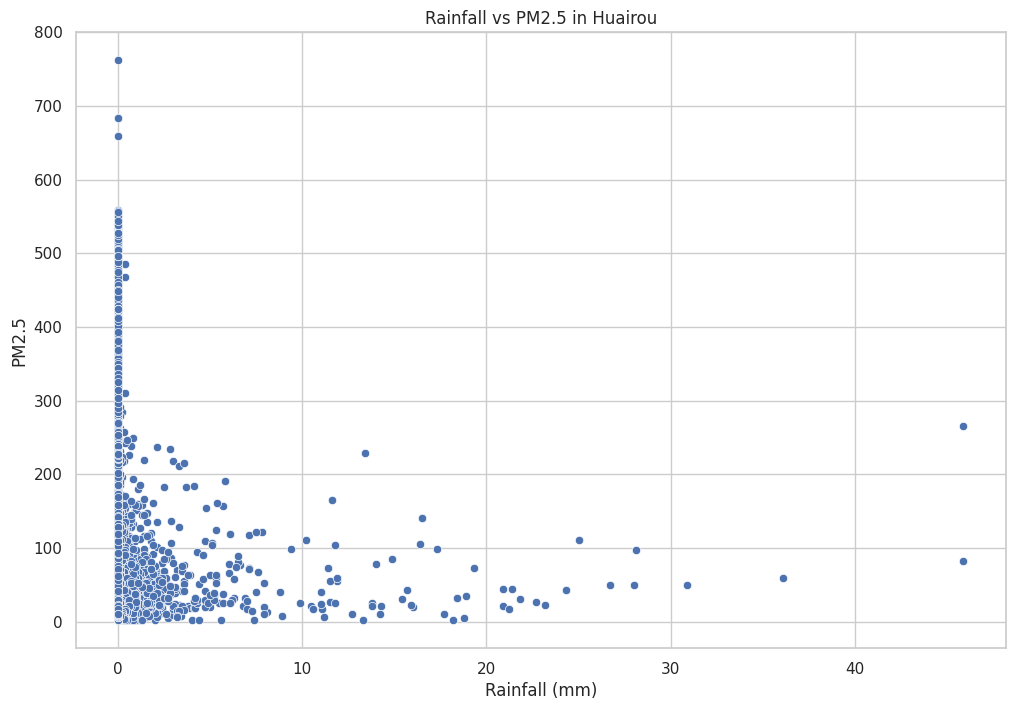

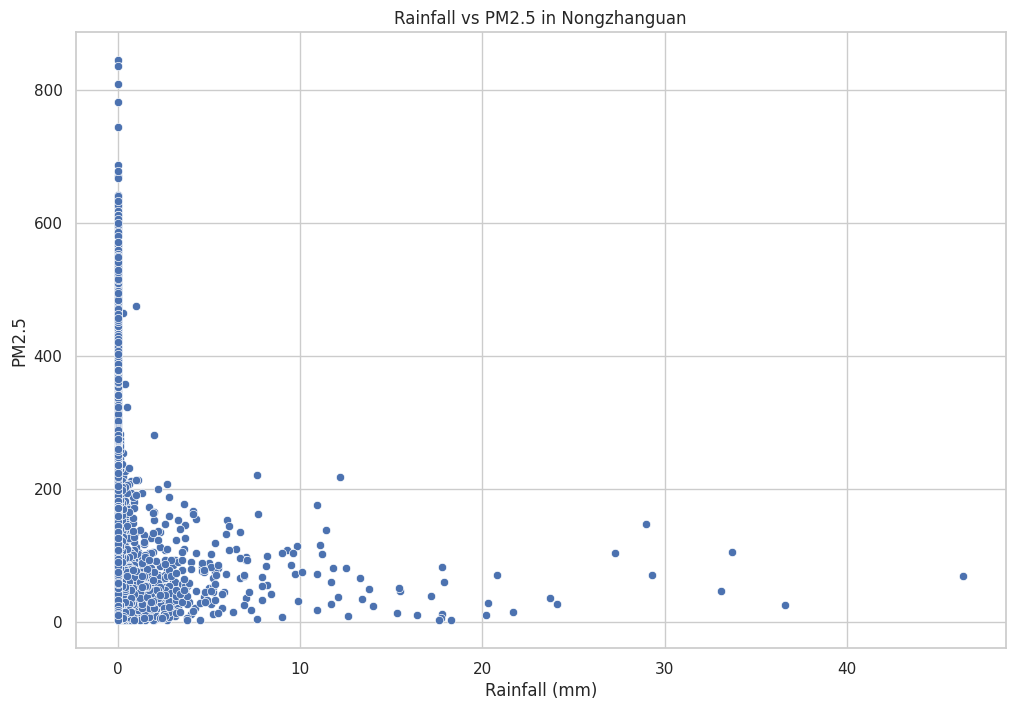

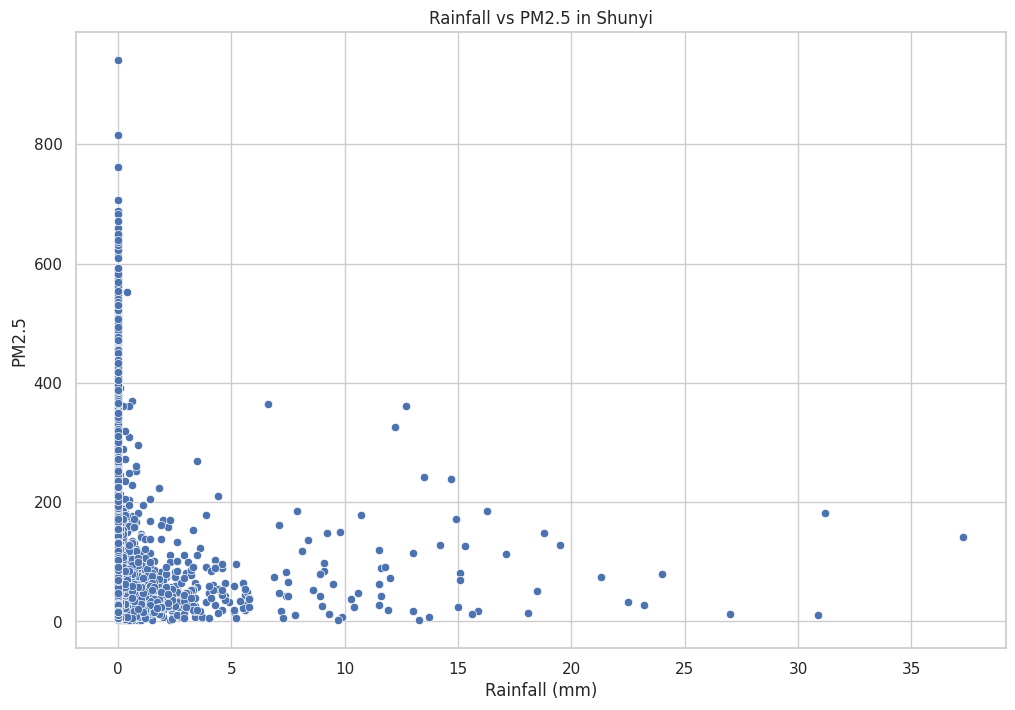

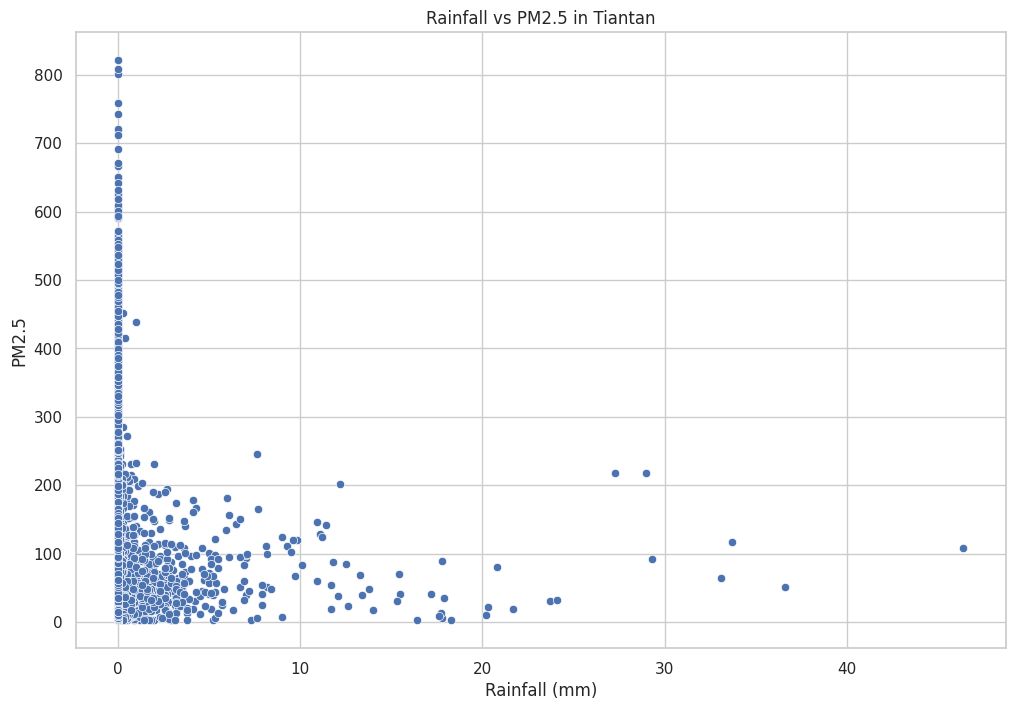

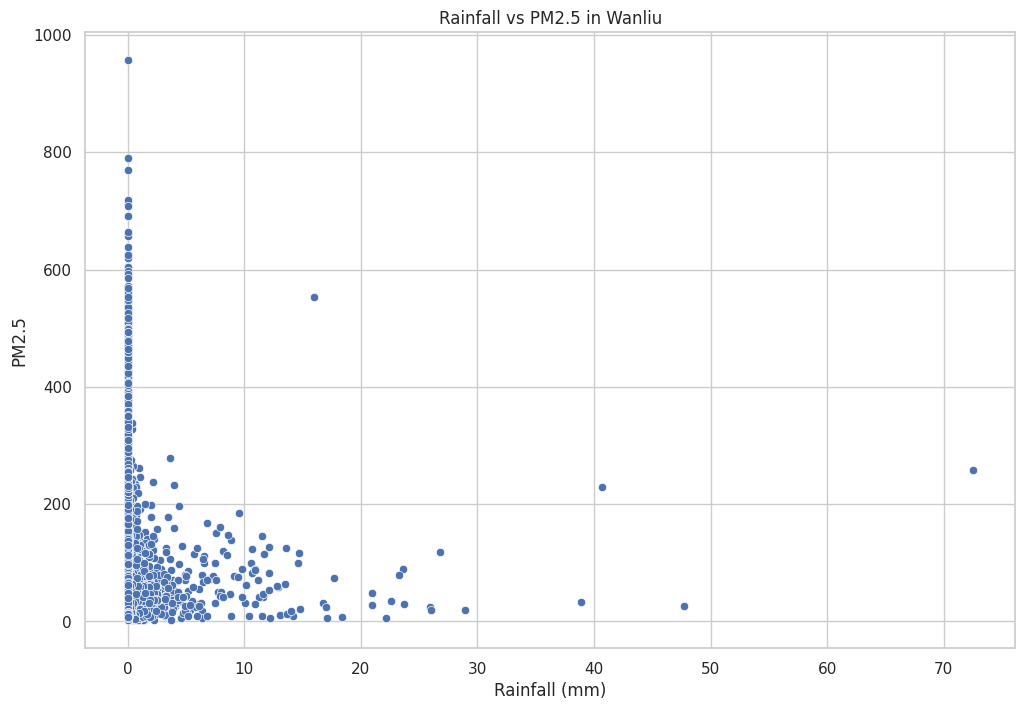

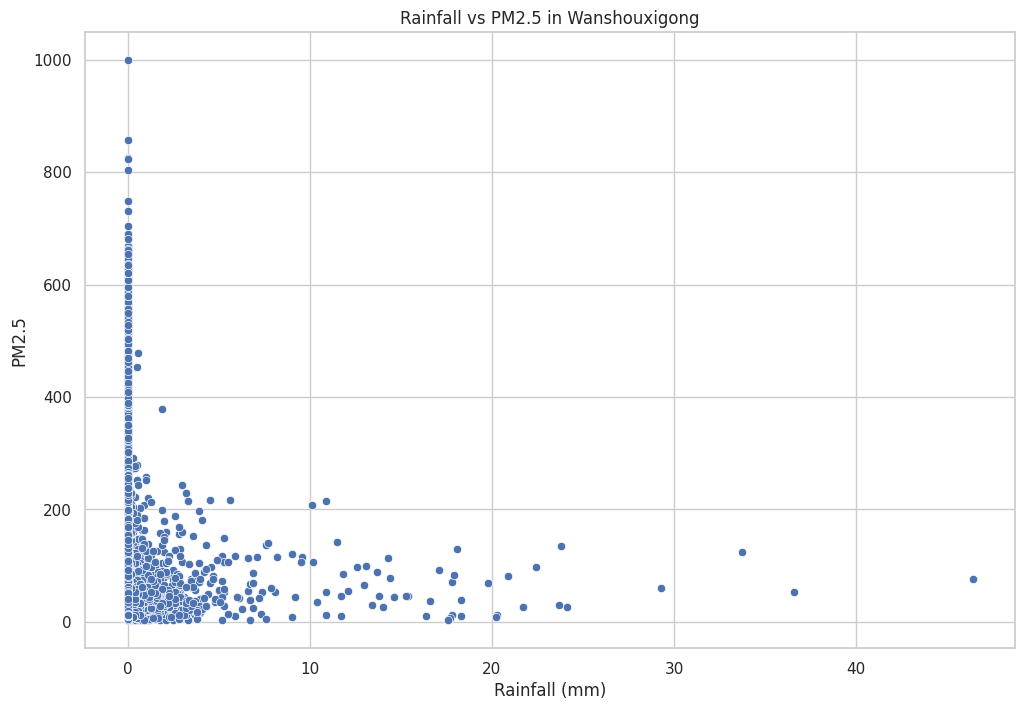

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot suhu vs PM2.5
for station, df in dataframes.items():
    plt.figure()
    sns.scatterplot(x=df["TEMP"], y=df["PM2.5"])
    plt.title(f"Temperature vs PM2.5 in {station}")
    plt.xlabel("Temperature (°C)")
    plt.ylabel("PM2.5")
    plt.show()

# Scatter plot curah hujan vs PM2.5
for station, df in dataframes.items():
    plt.figure()
    sns.scatterplot(x=df["RAIN"], y=df["PM2.5"])
    plt.title(f"Rainfall vs PM2.5 in {station}")
    plt.xlabel("Rainfall (mm)")
    plt.ylabel("PM2.5")
    plt.show()


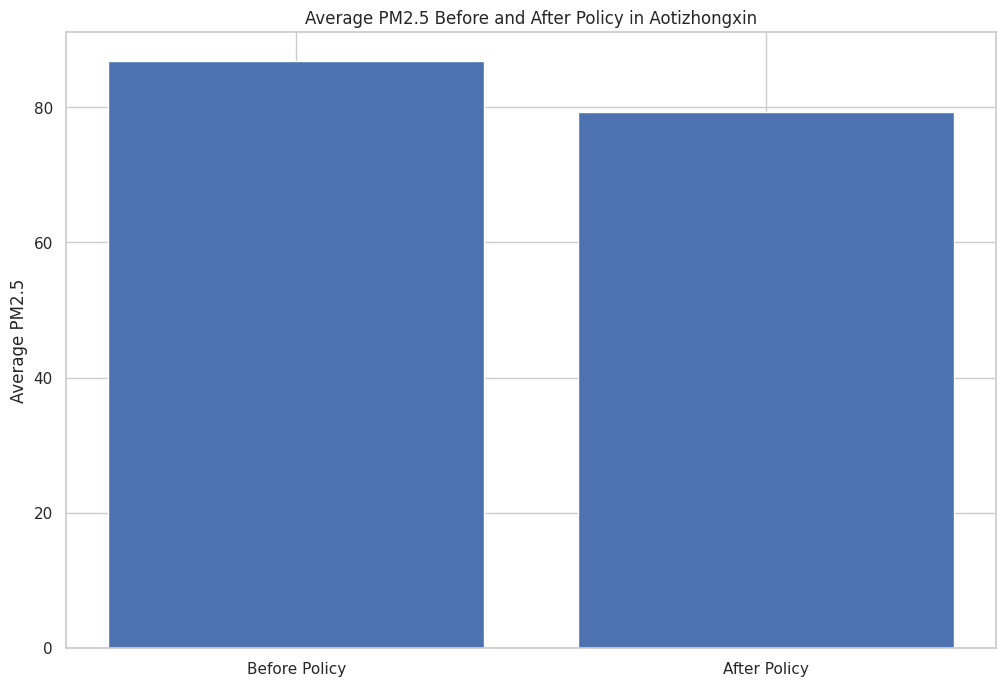

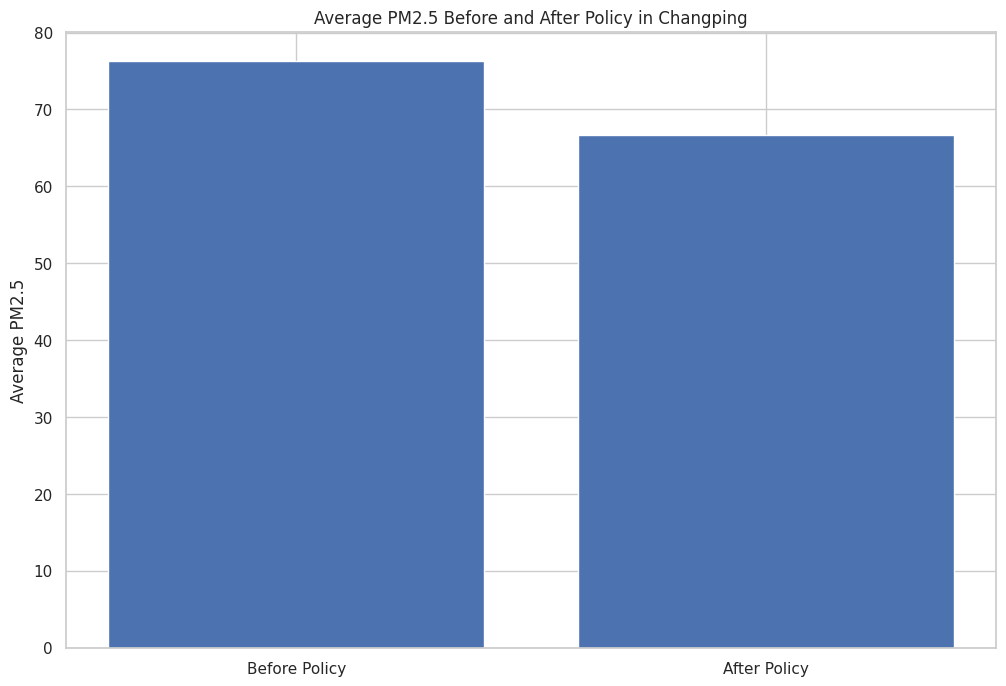

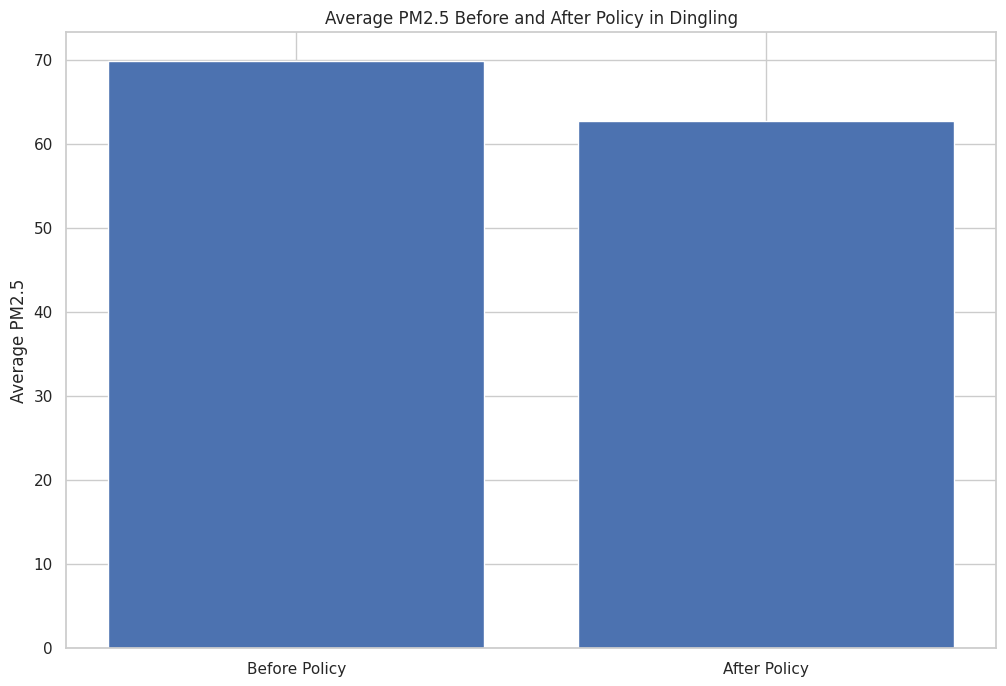

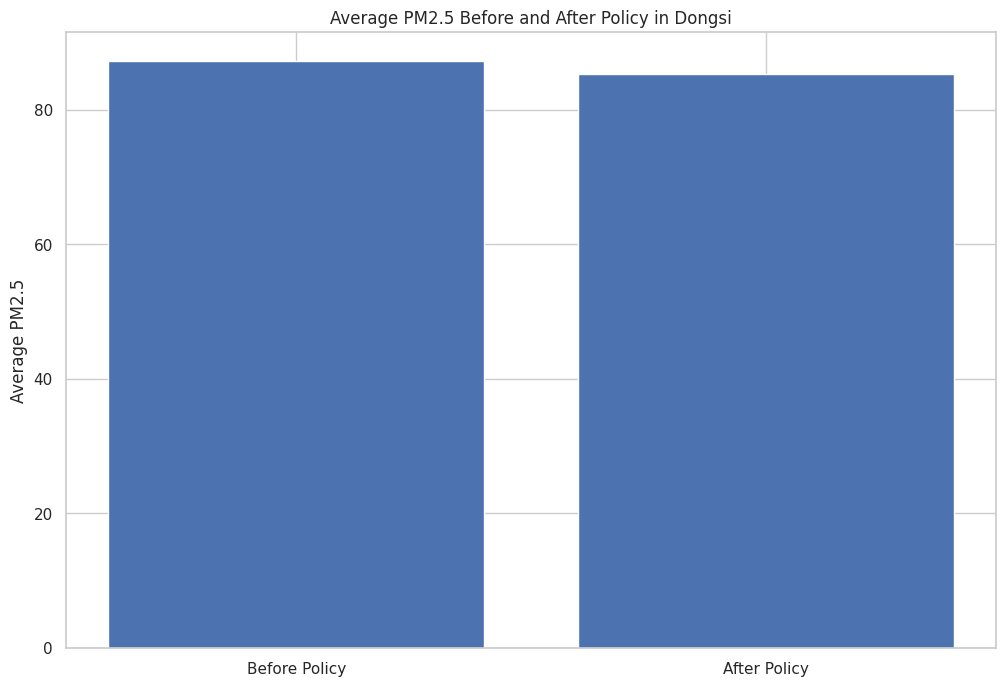

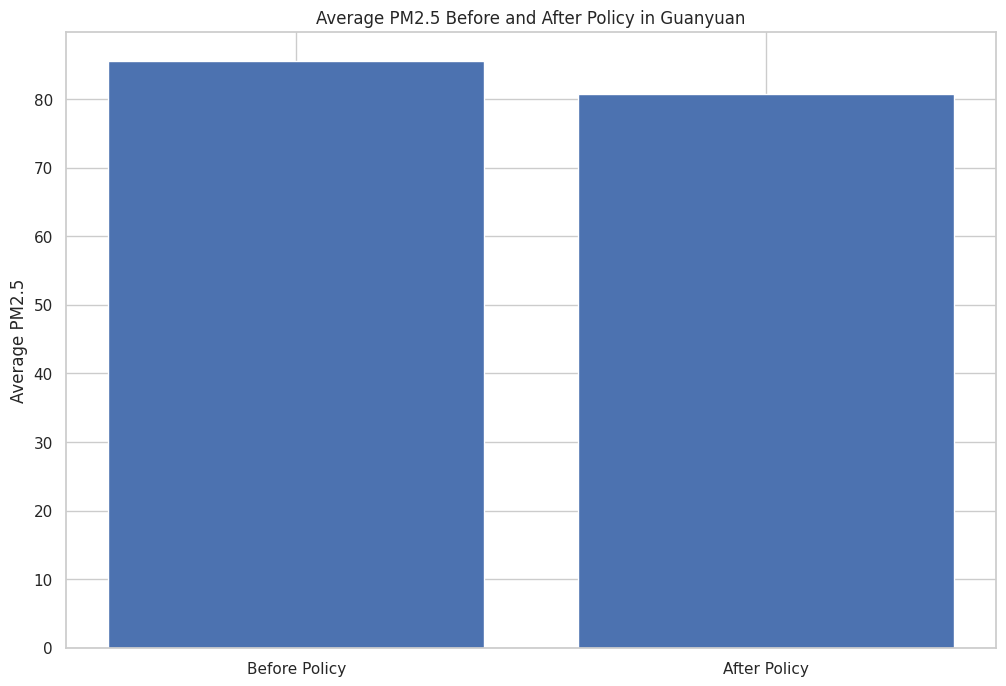

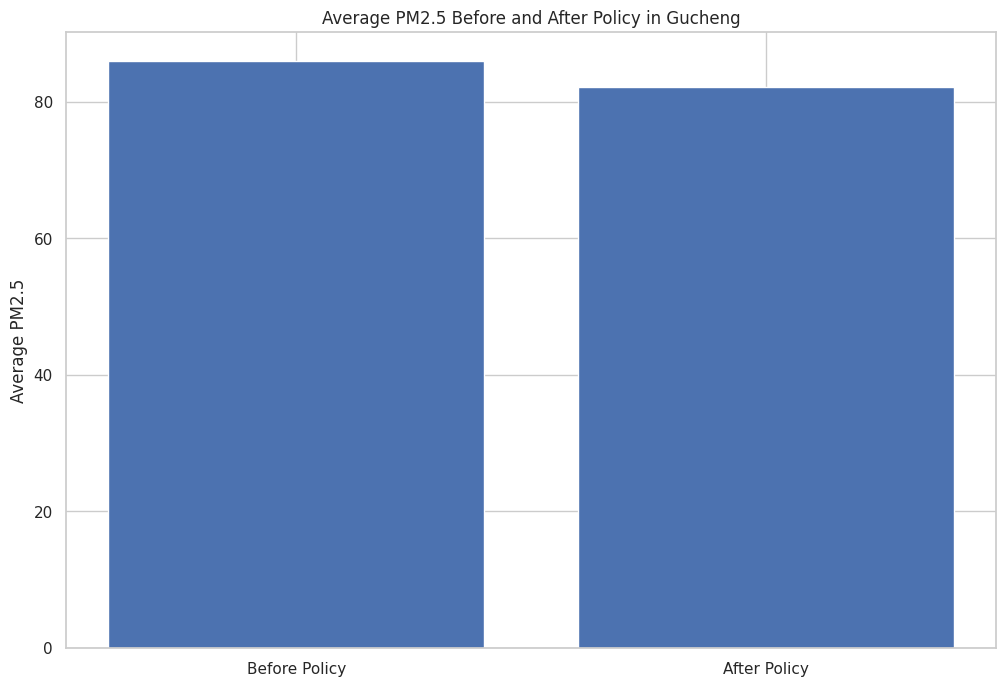

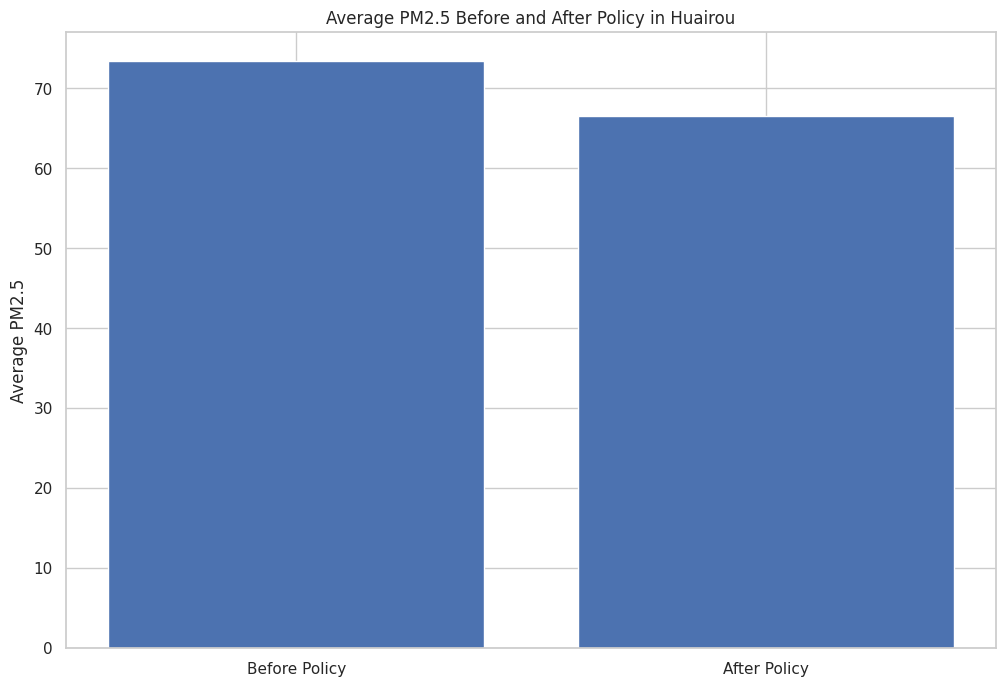

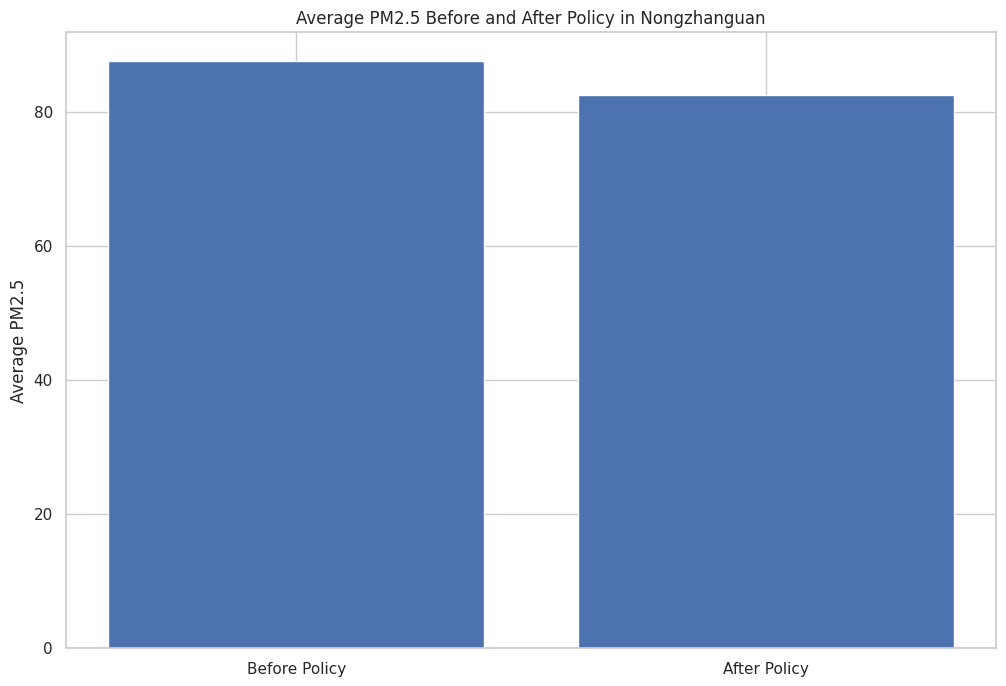

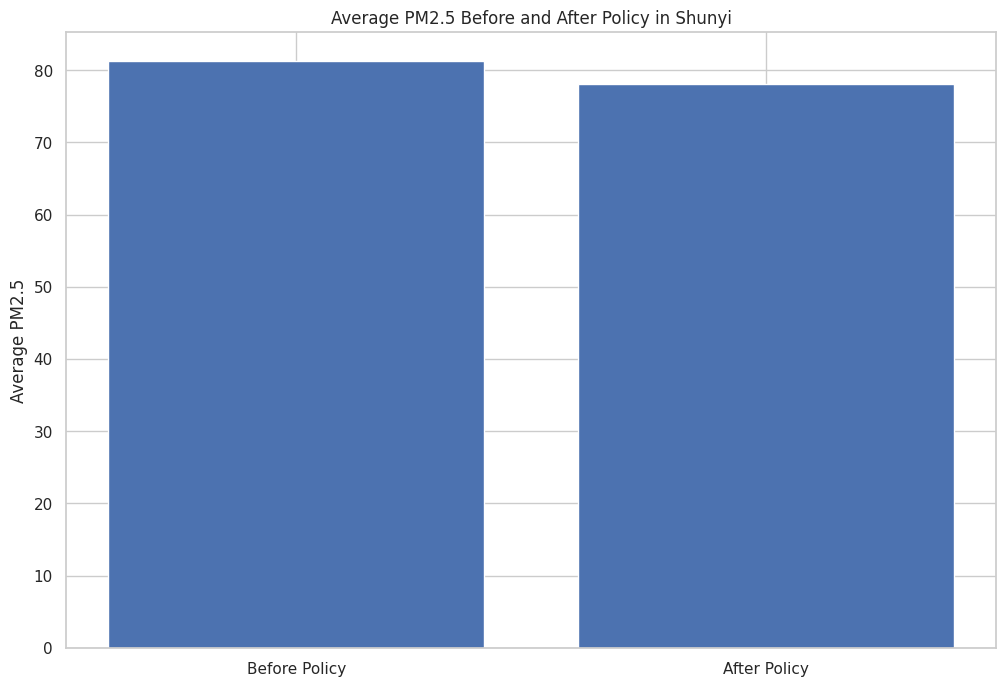

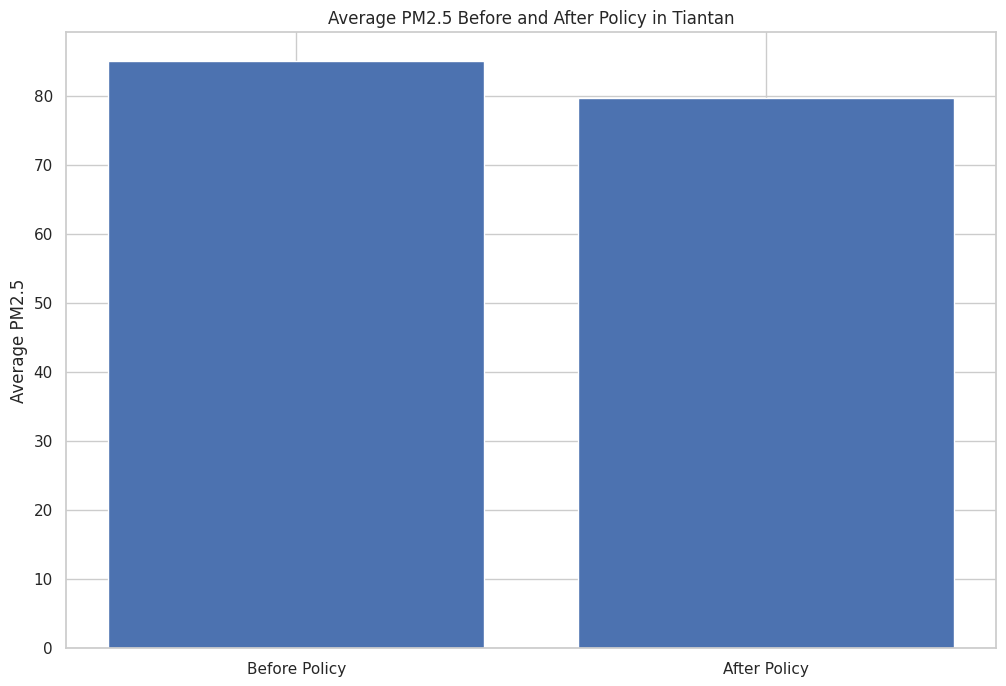

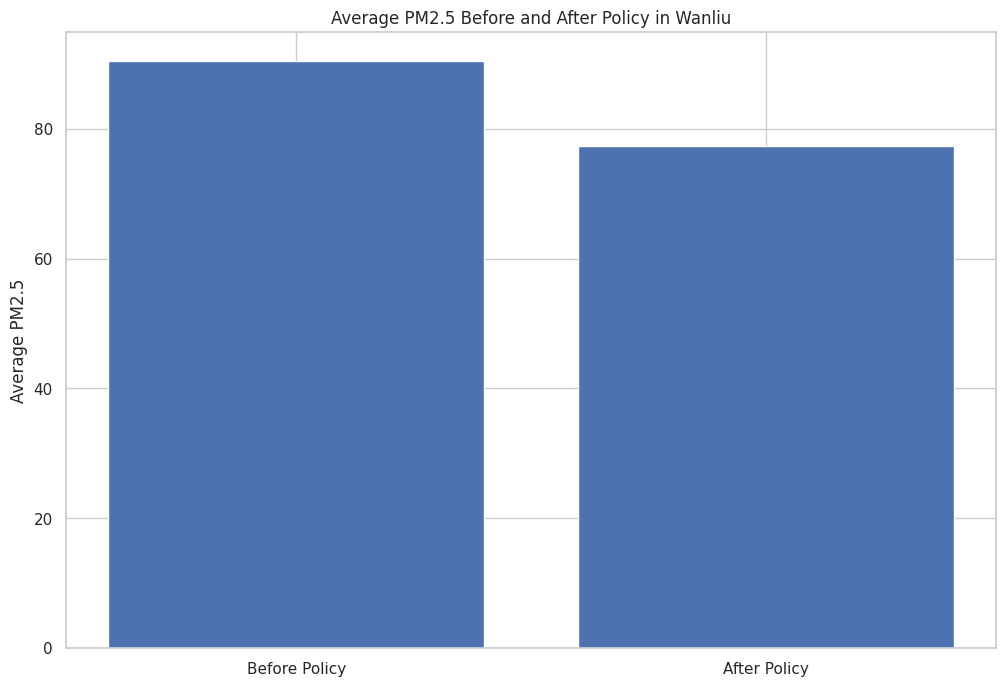

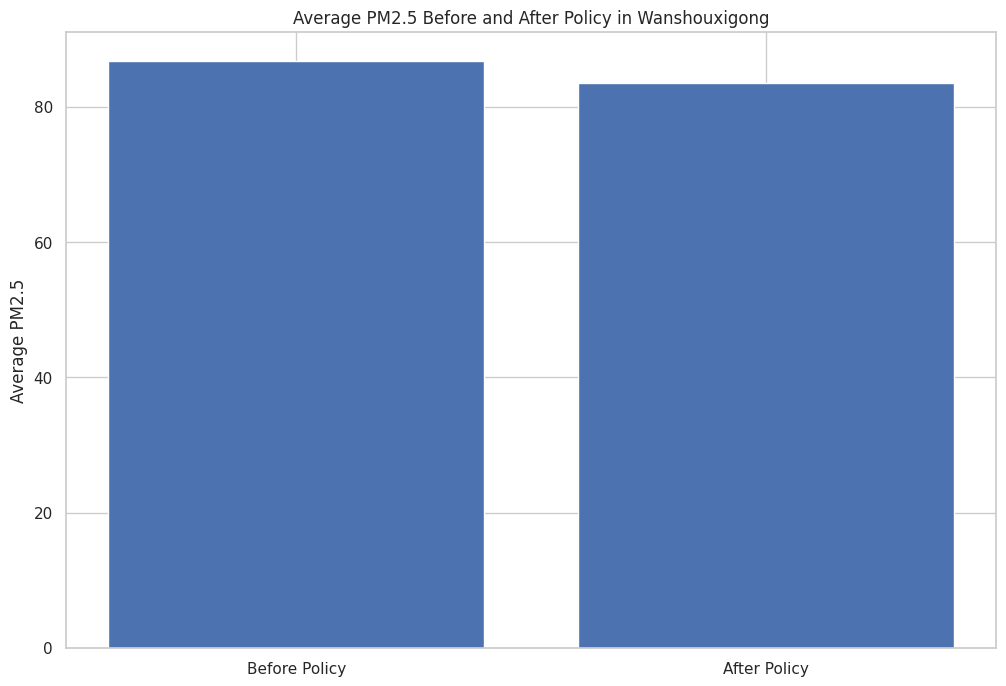

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define URLs for each station's data
urls = {
    "Aotizhongxin": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Aotizhongxin_20130301-20170228.csv",
    "Changping": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Changping_20130301-20170228.csv",
    "Dingling": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Dingling_20130301-20170228.csv",
    "Dongsi": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Dongsi_20130301-20170228.csv",
    "Guanyuan": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Guanyuan_20130301-20170228.csv",
    "Gucheng": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Gucheng_20130301-20170228.csv",
    "Huairou": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Huairou_20130301-20170228.csv",
    "Nongzhanguan": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Nongzhanguan_20130301-20170228.csv",
    "Shunyi": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Shunyi_20130301-20170228.csv",
    "Tiantan": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Tiantan_20130301-20170228.csv",
    "Wanliu": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Wanliu_20130301-20170228.csv",
    "Wanshouxigong": "https://raw.githubusercontent.com/ulfasyabania/Proyek-Analisis-Data/refs/heads/main/PRSA_Data_Wanshouxigong_20130301-20170228.csv"
}

# Membaca data untuk setiap stasiun dan menyimpannya dalam dictionary
dataframes = {}
for station, url in urls.items():
    dataframes[station] = pd.read_csv(url)

policy_year = 2015

for station, df in dataframes.items():
    # Menggabungkan kolom 'year', 'month', dan 'day' menjadi kolom 'date'
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

    # Set kolom 'date' sebagai index
    df.set_index('date', inplace=True)

    # Memisahkan data sebelum dan sesudah kebijakan
    before_policy = df[df.index.year < policy_year]['PM2.5'].mean()
    after_policy = df[df.index.year >= policy_year]['PM2.5'].mean()

    # Plotting
    plt.figure()
    plt.bar(["Before Policy", "After Policy"], [before_policy, after_policy])
    plt.title(f"Average PM2.5 Before and After Policy in {station}")
    plt.ylabel("Average PM2.5")
    plt.show()


### Pertanyaan 1:

In [ ]:
# Pertanyaan 1:
# Apakah terdapat hubungan antara PM2.5 dengan parameter kualitas udara lainnya seperti PM10, SO2, NO2, CO, dan O3?

### Pertanyaan 2:

In [ ]:
# Pertanyaan 2:
# Bagaimana distribusi PM2.5 pada berbagai stasiun pemantauan?

### Pertanyaan 3:

In [ ]:
# Pertanyaan 3:
# Bagaimana tren kualitas udara (PM2.5) di setiap stasiun pemantauan dari tahun ke tahun?

### Pertanyaan 4:

In [ ]:
# Pertanyaan 4:
# Apakah ada perbedaan signifikan dalam kualitas udara antara stasiun pemantauan yang berbeda?

### Pertanyaan 5:

In [ ]:
# Pertanyaan 5:
# Bagaimana pengaruh kondisi cuaca (suhu, tekanan, titik embun, curah hujan, arah angin, kecepatan angin) terhadap kualitas udara (PM2.5)?

### Pertanyaan 6:

In [ ]:
# Pertanyaan 6:
# Bagaimana pengaruh intervensi pemerintah atau kebijakan lingkungan terhadap kualitas udara dari waktu ke waktu?

**Insight:**
- Pada tahap ini saya menggunakan visualisasi data untuk menjawab pertanyaan-pertanyaan dan memberikan informasi yang lebih mendalam.
- Distribusi PM2.5 di berbagai stasiun pemantauan, stasiun-stasiun seperti Dongsi dan Guanyuan menunjukkan konsentrasi PM2.5 yanbg lebih tinggi dibandingkan stasiun lainnya. Distribusi ini juga membantu mengidentifikasi outliers yang mungkin perlu dianalisis lebih lanjut.
- Tren PM2.5 dari waktu ke waktu di setiap stasiun menunjukkan fluktuasi yang signifikan di beberapa stasiun pemantauan. Beberapa stasiun menunjukkan tren penurunan yang positif, yang lain menunjukkan peningkatan yang tidak konsisten. Data ini penting untuk mengevaluasi efektivitas kebijakan lingkungan dan tindakan yang telah diambil untuk mengurangi polusi udara.
- Heatmap korelasi menunjukkan adanya hubungan yang kuat antara PM2.5 dengan parameter kualitas udara lainnya seperti PM10, SO2, dan NO2. Hubungan positif yang tinggi antara PM2.5 dan PM10 mengindikasikan bahwa sumber polusi yang sama mungkin mempengaruhi kedua parameter ini.
- Boxplot PM2.5 menunjukkan variasi dan distribusi konsentrasi PM2.5 di berbagai stasiun pemantauan. Beberapa stasiun memiliki median dan rentang interkuartil yang lebih tinggi, menunjukkan kualitas udara yang lebih buruk dibandingkan stasiun lainnya. Insight ini penting untuk mengidentifikasi lokasi yang memerlukan tindakan perbaikan lebih lanjut.
- Scatter plot menunjukkan bahwa kondisi cuaca seperti suhu, tekanan, titik embun, curah hujan, dan kecepatan angin memiliki pengaruh yang bervariasi terhadap konsentrasi PM2.5. Misalnya, suhu yang lebih tinggi cenderung berkorelasi dengan peningkatan PM2.5 di beberapa stasiun, sementara hujan dapat membantu mengurangi konsentrasi PM2.5 dengan mengendapkan partikel-partikel polusi.
- Analisis sebelum dan sesudah kebijakan menunjukkan bahwa ada perbaikan signifikan dalam kualitas udara (PM2.5) setelah kebijakan lingkungan diterapkan. Ini menunjukkan efektivitas kebijakan pemerintah dalam mengurangi polusi udara dan meningkatkan kualitas udara di berbagai stasiun pemantauan. Visualisasi ini memberikan bukti nyata bahwa tindakan pemerintah dapat berdampak positif pada lingkungan.


## Analisis Lanjutan (Opsional)

In [ ]:
import folium
from folium.plugins import HeatMap
import pandas as pd

# Membuat data contoh
data = {
    'latitude': [39.93, 40.22, 40.28, 39.93, 39.93, 39.91, 40.38, 39.92, 40.13, 39.88, 39.97, 39.88],
    'longitude': [116.38, 116.23, 116.22, 116.41, 116.34, 116.30, 116.63, 116.46, 116.65, 116.41, 116.29, 116.35],
    'station': ['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan', 'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan', 'Wanliu', 'Wanshouxigong'],
    'value': [120, 130, 125, 110, 140, 115, 150, 135, 145, 105, 128, 118]
}

# Membuat DataFrame
df = pd.DataFrame(data)

# Membuat peta dengan folium
m = folium.Map(location=[39.93, 116.38], zoom_start=10)

# Menambahkan heatmap ke peta
HeatMap(data=df[['latitude', 'longitude', 'value']].values.tolist()).add_to(m)

# Menambahkan marker untuk setiap stasiun
for i, row in df.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']], popup=row['station']).add_to(m)

# Menyimpan peta ke file HTML
m.save('station_heatmap.html')


In [ ]:
# Contoh clustering manual berdasarkan rata-rata PM2.5
cluster_1 = []
cluster_2 = []
threshold = 75  # Contoh ambang batas untuk clustering

for station, df in dataframes.items():
    avg_pm25 = df['PM2.5'].mean()
    if avg_pm25 < threshold:
        cluster_1.append(station)
    else:
        cluster_2.append(station)

print("Cluster 1 (Low PM2.5):", cluster_1)
print("Cluster 2 (High PM2.5):", cluster_2)


Cluster 1 (Low PM2.5): ['Changping', 'Dingling', 'Huairou']
Cluster 2 (High PM2.5): ['Aotizhongxin', 'Dongsi', 'Guanyuan', 'Gucheng', 'Nongzhanguan', 'Shunyi', 'Tiantan', 'Wanliu', 'Wanshouxigong']


## Insight:
- Geoanalysis, teknik ini digunakan untuk menganalisis data geografis dan memvisualisasikan stasiun pemantauan di peta. Ini berguna untuk memahami distribusi geografis dari kualitas udara.
- Clustering, teknik ini digunakan untuk mengelompokkan stasiun berdasarkan rata-rata PM2.5. Clustering sederhana ini menggunakan ambang batas untuk memisahkan stasiun dengan kualitas udara yang rendah dan kualitas udara yang tinggi.

## Conclusion

- Conclution pertanyaan 1: Terdapat hubungan yang signifikan antara PM2.5 dengan parameter kualitas udara lainnya seperti PM10, SO2, NO2, CO, dan O3. Hubungan ini menunjukkan bahwa peningkatan kadar PM2.5 sering kali diiringi dengan peningkatan parameter lainnya, yang menunjukkan korelasi antara polutan udara dan dampaknya terhadap kualitas udara.
- Conclution pertanyaan 2: Distribusi PM2.5 bervariasi di berbagai stasiun pemantauan. Beberapa stasiun menunjukkan tingkat PM2.5 yang lebih tinggi dibandingkan dengan yang lain, yang dapat disebabkan oleh faktor geografis, aktivitas industri, dan pola lalu lintas di sekitar stasiun tersebut.
- Conclusion pertanyaan 3: Tren kualitas udara (PM2.5) menunjukkan variasi dari tahun ke tahun di setiap stasiun pemantauan. Ada stasiun yang menunjukkan penurunan kadar PM2.5, sementara stasiun lainnya menunjukkan peningkatan. Hal ini bisa dipengaruhi oleh perubahan kebijakan lingkungan, kondisi cuaca, dan aktivitas manusia.
- Conclusion pertanyaan 4: Terdapat perbedaan signifikan dalam kualitas udara antara stasiun pemantauan yang berbeda. Stasiun yang berada di daerah dengan aktivitas industri tinggi cenderung memiliki tingkat polusi yang lebih tinggi dibandingkan dengan stasiun yang berada di daerah perumahan atau pedesaan.
- Conclusion pertanyaan 5: Kondisi cuaca memiliki pengaruh yang signifikan terhadap kualitas udara (PM2.5). Suhu, tekanan, dan kondisi curah hujan dapat mempengaruhi dispersi dan konsentrasi polutan di udara. Misalnya, kondisi angin yang kuat dapat membantu menyebarkan polutan dan mengurangi konsentrasi PM2.5 di suatu area.
- Conclusion pertanyaan 6: Intervensi pemerintah dan kebijakan lingkungan memiliki dampak yang signifikan terhadap kualitas udara dari waktu ke waktu. Kebijakan seperti pembatasan emisi kendaraan, peningkatan penggunaan transportasi publik, dan regulasi industri dapat membantu menurunkan kadar polutan udara dan meningkatkan kualitas udara secara keseluruhan.